In [2]:
# source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
from tqdm import tqdm


# Módulos de interesse

- Modulo A, B e D: Contêm informações sociodemográficas 
- Modulo L: Crianças com menos de 2 anos 
- Módulo R: Saúde da Mulher 
- Modulo S: Pré-natal 
- Modulo W: Antropometria


# Importando os dados

In [3]:
modulo_identificacao = [
    # Módulo de Identificacao
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    "V0025A", # Seleção do morador de 15 anos ou mais para responder o questionário individual
    "V0025B", # Seleção do morador de 15 anos ou mais para ter medida antropométrica aferida
    "V00291", # Peso amostral do morador com calibração
    "V00282", #		Projeção da população
    "V00283", #	Domínio de projeção para domicílio e moradores
    "V00293", # Domínio de projeção para morador selecionado
    "V00303", # Domínio de projeção para morador selecionado para antropometria
    ]
modulo_C = [
    # Módulo C - Caracteristicas gerais dos moradores
    "C001", # Quantidade de pessoas no domicilio
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
]
modulo_D = [
    # Módulo D - Cartacterisiticas de Educação dos Moradores
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
]
modulo_G = [
    # Módulo G - Deficiecias maiores de 2 anos
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
]

modulo_J =  [
    # Utilização de Serviços de saude
    "J00402", #  Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas 
    
]
modulo_L = [
    # Módulo L - Crianças com menos de dois anos
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
]
modulo_P = [
    # Módulo P - Estilos de Vida
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
]
modulo_Q = [
    # Módulo Q - Doenças crônicas
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06306", # um médico já lhe deu o diagnóstico de uma doença do coração, tal como infarto, angina, insuficiência cardíaca ou outra?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11006", #Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? 
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
    "Q128", # Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)? 
]
modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R011", # Segundo o médico, qual o motivo da retirada do útero? 
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]
modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06703",  # Em que data foi o último parto? ANO
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
]

modulo_T = [
    # Módulo de DST
    "T004", #Nos últimos 12 meses, algum médico lhe deu diagnóstico de doença/infecção sexualmente transmissível?

]
modulo_W = [
    # Módulo W - Antropometria
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

In [4]:
# colunas_interesse = modulo_identificacao + modulo_C + modulo_D + modulo_G + modulo_L + modulo_P + modulo_Q + modulo_R + modulo_S + modulo_W

In [5]:
df_criancas = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/df_criancas.csv")
df_maes = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/df_maes.csv")

In [6]:
df_aux = pd.merge(df_criancas, df_maes, on="chave_domicio", how="inner")

In [7]:
df_maes.V00283.value_counts(dropna=False)

V00283
214.0    515
234.0    317
154.0    311
531.0    248
264.0    236
        ... 
272.0     36
223.0     26
313.0     21
213.0     16
422.0     13
Name: count, Length: 77, dtype: int64

In [8]:
df_criancas.shape, df_maes.shape, df_aux.shape

((25353, 66), (9794, 199), (9986, 264))

## Fazer o cruzamento dos Datasets para criar os CLusters de interesse

In [9]:
df_aux = df_aux[['chave_domicio']].drop_duplicates().reset_index(drop=True)
df_aux['filho'] = 1
df_aux.shape

(7843, 2)

In [10]:
df_grupo_maes = pd.merge(df_maes, df_aux, on="chave_domicio", how="inner" )
df_grupo_maes['filho'] = df_grupo_maes['filho'].fillna(0)
df_grupo_maes.shape

(7843, 200)

In [11]:
df_grupo_maes.parto_idade_avançada.value_counts()

parto_idade_avançada
0    6311
1    1532
Name: count, dtype: int64

In [12]:
df_grupo_maes['idade_ultimo_parto'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99])

count    7843.000000
mean       28.270177
std         6.636233
min        15.000000
1%         16.000000
10%        20.000000
20%        22.000000
30%        24.000000
40%        26.000000
50%        28.000000
60%        30.000000
70%        32.000000
80%        34.000000
90%        37.000000
92%        38.000000
94%        39.000000
96%        40.000000
98%        42.000000
99%        43.000000
max        52.000000
Name: idade_ultimo_parto, dtype: float64

In [13]:
# Criar um grupo de filhos com maes em idade avançada
df_grupo_criancas = pd.merge(df_criancas, df_grupo_maes[['chave_domicio', 'idade_ultimo_parto', 'parto_idade_avançada']], on="chave_domicio", how="inner" )
df_grupo_criancas.shape

(9986, 68)

In [14]:
df_grupo_criancas.chave_domicio.value_counts(dropna=False)

chave_domicio
13_1352010_130029186_11    9
14_1410012_140008008_1     6
13_1310212_130057601_14    5
16_1650010_160002602_13    5
13_1352022_130078631_4     5
                          ..
53_5310213_530002352_4     1
53_5310213_530009140_2     1
53_5310213_530014488_4     1
53_5310213_530014488_10    1
53_5310213_530014488_13    1
Name: count, Length: 7843, dtype: int64

# Trasformar variaveis em categoricas para facilitar os plots

In [15]:
def transformar_categorica(df):
    df = df.copy()
    # Verificar número de valores únicos por coluna
    unique_counts = df.nunique()

    # Identificar colunas com poucos valores únicos
    categorical_candidates = unique_counts[unique_counts < 20].index
    print("Colunas que podem ser categorizadas:", categorical_candidates)

    # Converter automaticamente as candidatas para categorias
    df[categorical_candidates] = df[categorical_candidates].astype('category')

    return df

df_grupo_maes = transformar_categorica(df_grupo_maes)
df_grupo_criancas = transformar_categorica(df_grupo_criancas)

Colunas que podem ser categorizadas: Index(['V0006_PNS', 'V0015', 'V0022', 'V0026', 'V0031', 'V0025A', 'V0025B',
       'C001', 'C00301', 'C006',
       ...
       'imc_grau_obesidade', 'escolaridade', 'peso_ao_nascer',
       'Classificação Idade Gestacional', 'Risco de Insulto Perinatal',
       'Complicações Perinatais', 'comorbidade', 'comorbidade_score',
       'parto_idade_avançada', 'filho'],
      dtype='object', length=138)
Colunas que podem ser categorizadas: Index(['V0006_PNS', 'V0015', 'V0022', 'V0026', 'V0031', 'V0025A', 'V0025B',
       'V00291', 'V00293', 'V00303', 'Quantidade_moradores',
       'regiao_brasileira', 'regiao_metropolitana', 'sexo', 'mes_nascimento',
       'ano_nascimento', 'idade', 'peso', 'altura', 'peso_morador_selec',
       'C001', 'C006', 'C00702', 'C00703', 'C008', 'D00201', 'D00901', 'G046',
       'G049', 'G051', 'G053', 'G059', 'G060', 'G062', 'G064', 'G066', 'G070',
       'G072', 'G073', 'G079', 'G083', 'G084', 'L021', 'L033', 'L037', 'L038',


# Compara Grupo de Mães de Idade Avançada e Idade Não Avançada

In [16]:
def plot_with_hue(df, x_col, hue_col):
    df = df.copy()
    """
    Plota gráficos com base no tipo de dado da coluna `x_col` e inclui uma coluna `hue_col`.
    - Se `x_col` for categórica, usa um countplot.
    - Se `x_col` for numérica, usa um histplot.

    :param df: DataFrame contendo os dados.
    :param x_col: Nome da coluna a ser usada no eixo X.
    :param hue_col: Nome da coluna a ser usada como hue.
    """
    if x_col not in df.columns or hue_col not in df.columns:
        raise ValueError(f"As colunas {x_col} ou {hue_col} não estão presentes no DataFrame.")

    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(df[x_col]):
        # Gráfico para variáveis numéricas
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=x_col, hue=hue_col, weights=df['peso_morador_selec'], bins=20, multiple='dodge', palette='Set2', kde=False)
        plt.title(f"Distribuição de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Frequência", fontsize=12)
        plt.tight_layout()
        plt.show()
    elif isinstance(df[x_col].dtype, pd.CategoricalDtype) or df[x_col].dtype == 'object':
        df[x_col] = df[x_col].dropna().astype(str)
         # Gráfico para variáveis categóricas
        print('discreta')
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(data=df, x=x_col, hue=hue_col, weights=df['peso_morador_selec'], multiple='dodge', palette='Set2', kde=False, discrete=True)
        plt.title(f"Distribuição de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Frequência", fontsize=12)
        plt.xticks(rotation=90)

         # Adicionar valores em cima de cada coluna
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
            

        plt.tight_layout()
        plt.show()
    else:
        raise ValueError(f"O tipo de dado da coluna {x_col} não é suportado para este gráfico.")

discreta


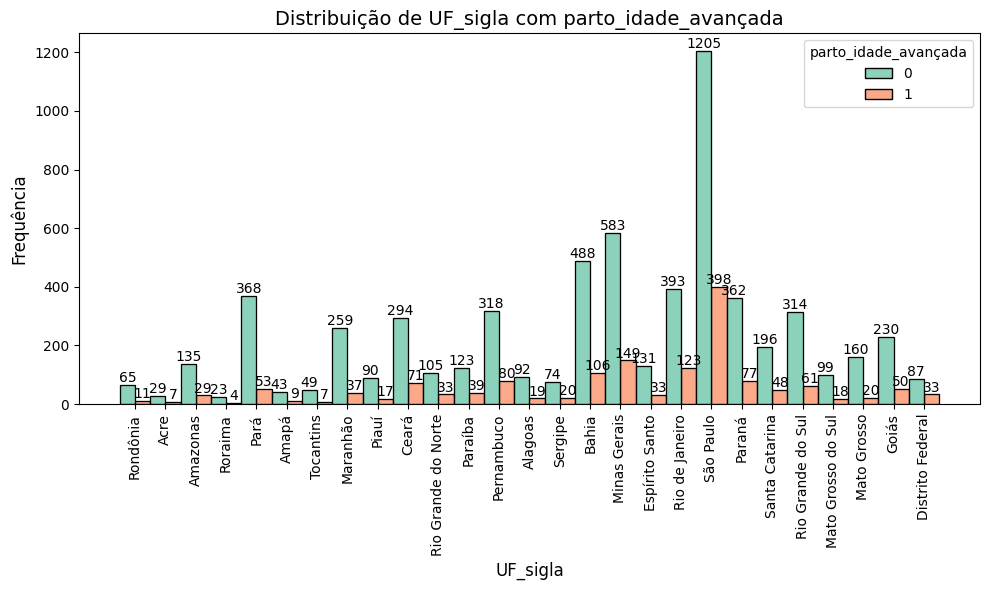

In [20]:
plot_with_hue(df_grupo_maes, 'UF_sigla', 'parto_idade_avançada')

In [21]:
modulo_C = [
    # Módulo C - Caracteristicas gerais dos moradores
    # "C006",  # Sexo
    "C008",  # Idade do morador na data de referência
]

modulo_G = [
    # Módulo G - Deficiecias maiores de 2 anos
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
]

modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]

modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S115",  # Qual foi o tipo de parto?
    "S125",  # Teve alguma complicação durante o parto?
]
 
modulo_criado = [
 'regiao_metropolitana',
 'capital_metropolitana',
#  'idade',
 'idade_ultimo_parto',
 'UF_sigla',
 'regiao_brasileira',
 'imc_classificacao',
 'imc_grau_obesidade',
 'escolaridade',
 'peso_ao_nascer',
 'Classificação Idade Gestacional',
 'Risco de Insulto Perinatal',
 'Complicações Perinatais',
 'comorbidade',
 'comorbidade_score',
 ]

colunas_interesse = modulo_C + modulo_G + modulo_R + modulo_S + modulo_criado

dicionario_variaveis = {
    "C006": "Sexo",
    "C008":  "Idade do morador na data de referência",
    "G046": " ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?",
    "G072": "___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?",
    "G073":" ____________ faz uso de prótese para os membros superiores?",
    "G079":"  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)",
    "G083":" Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)",
    "G084":"Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)",
    "R037": "A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?",
    "R038": "Há quanto tempo a sra está tentando engravidar?",
    "S065": "Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?",
    "S066":"Quantos partos a Sra já teve?",
    "S115":"Qual foi o tipo de parto?",
    "S125":"Teve alguma complicação durante o parto?",
}   


dicionario_valores = {
    "C006": {
        1: "Homem",
        2: "Mulher"
    },
    "C008": "Numerico",
    "G046":{
        1: "Não, nenhuma dificuldade",
        2: "Sim, alguma dificuldade",
        3: "Sim, muita dificuldade",
        4: "Sim, não consegue de modo algum",
        9: "Ignorado"
    },
    "G072":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "G073": {
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "G079":{
        1: "Não, nenhuma dificuldade",
        2: "Sim, alguma dificuldade",
        3: "Sim, muita dificuldade",
        4: "Sim, não consegue de modo algum",
        9: "Ignorado"
    },
    "G083":{
        1: "Não, nenhuma dificuldade",
        2: "Sim, alguma dificuldade",
        3: "Sim, muita dificuldade",
        4: "Sim, não consegue de modo algum",
        9: "Ignorado"
    },
    "G084":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "R037":{
        1: "Sim, fazem atualmente",
        2: "Sim, já fizeram",
        3: "Nunca fizeram",
        9: "Ignorado"
    },
    "R038":{
        1: "Há menos de 6 meses",
        2: "De 6 meses a menos de 1 ano",
        3: "Há 1 ano ou mais",
        9: "Ignorado"
    },
    "S065":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "S066":"Numerico",
    "S115":{
        1: "Parto normal/vaginal",
        2: "Cesariana",
        9: "Ignorado"
    },
    "S125":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
}

## Grafico

In [22]:
df_grupo_maes['peso_morador_selec'].sum()

np.float64(7867.703341799763)

In [23]:
df_grupo_maes['peso_morador_selec'].shape

(7843,)

 Idade do morador na data de referência
Numerico


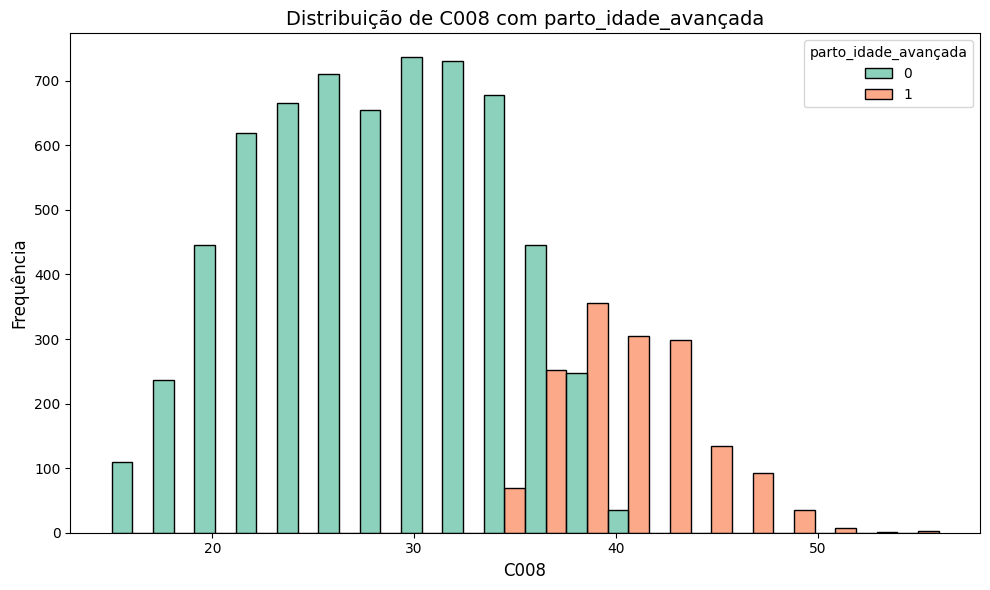

****************************************************************************************************
  ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
{1: 'Não, nenhuma dificuldade', 2: 'Sim, alguma dificuldade', 3: 'Sim, muita dificuldade', 4: 'Sim, não consegue de modo algum', 9: 'Ignorado'}
discreta


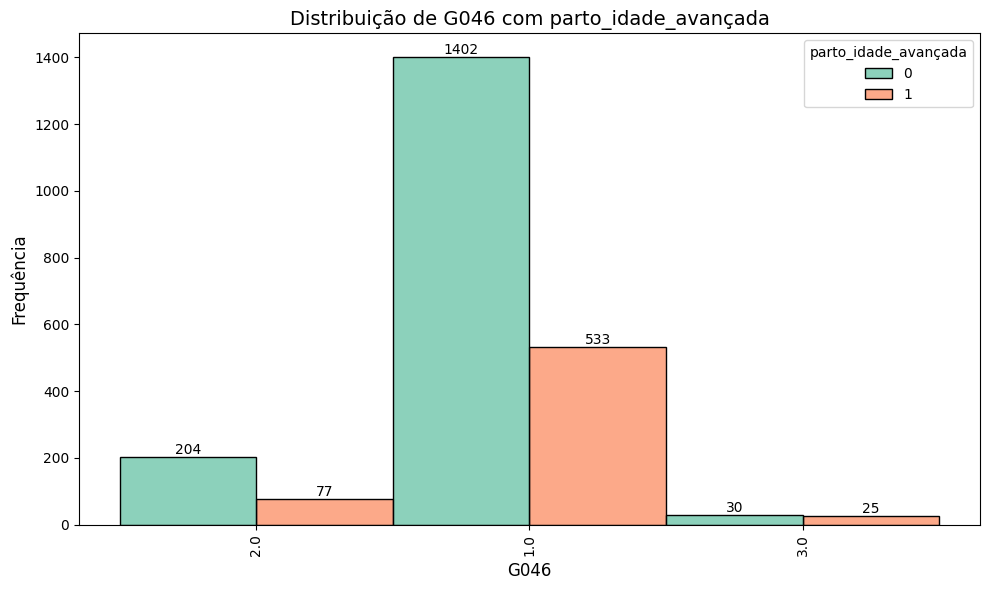

****************************************************************************************************
 ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}
discreta


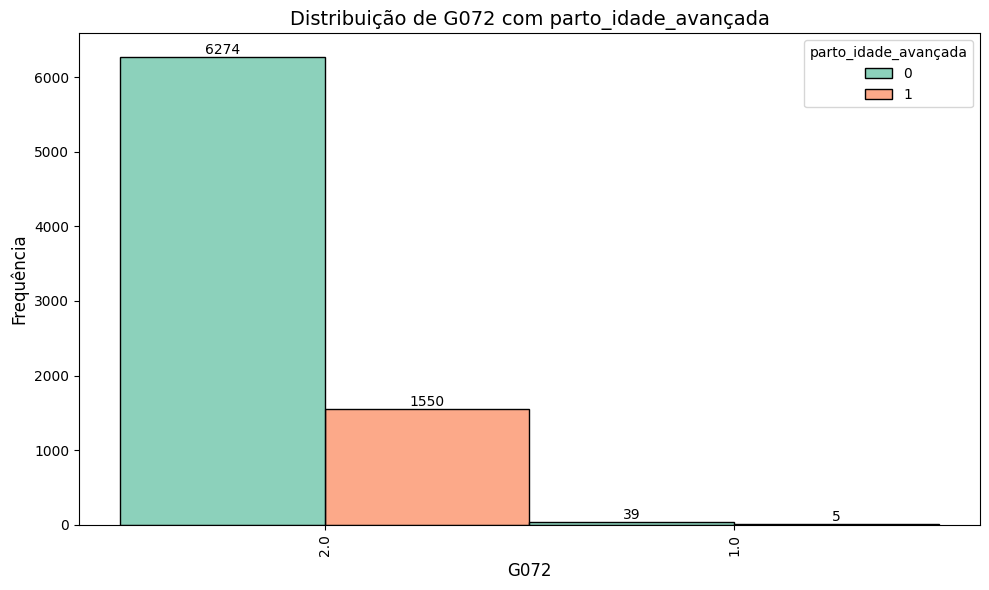

****************************************************************************************************
  ____________ faz uso de prótese para os membros superiores?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}
discreta


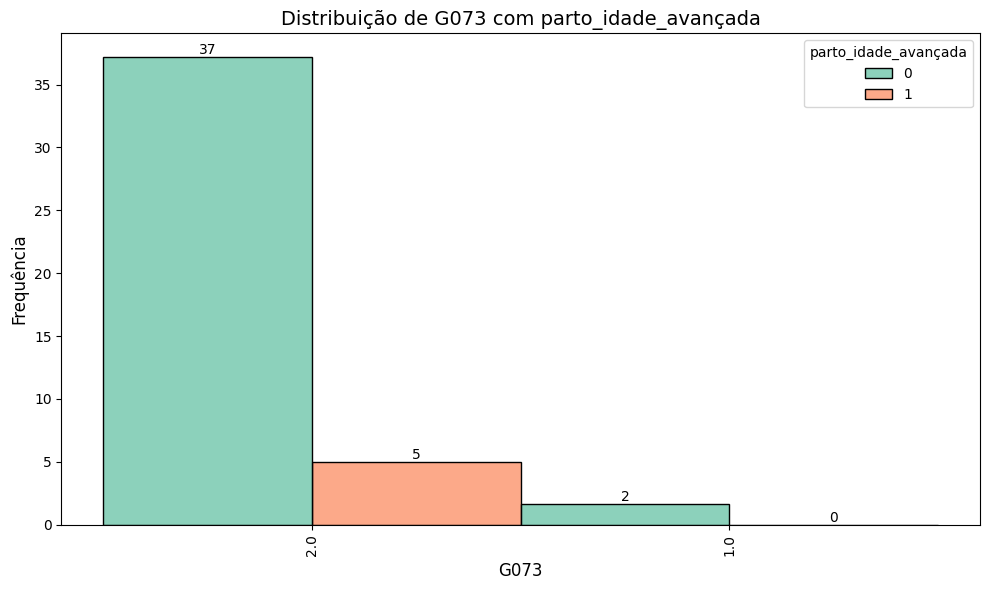

****************************************************************************************************
   ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
{1: 'Não, nenhuma dificuldade', 2: 'Sim, alguma dificuldade', 3: 'Sim, muita dificuldade', 4: 'Sim, não consegue de modo algum', 9: 'Ignorado'}
discreta


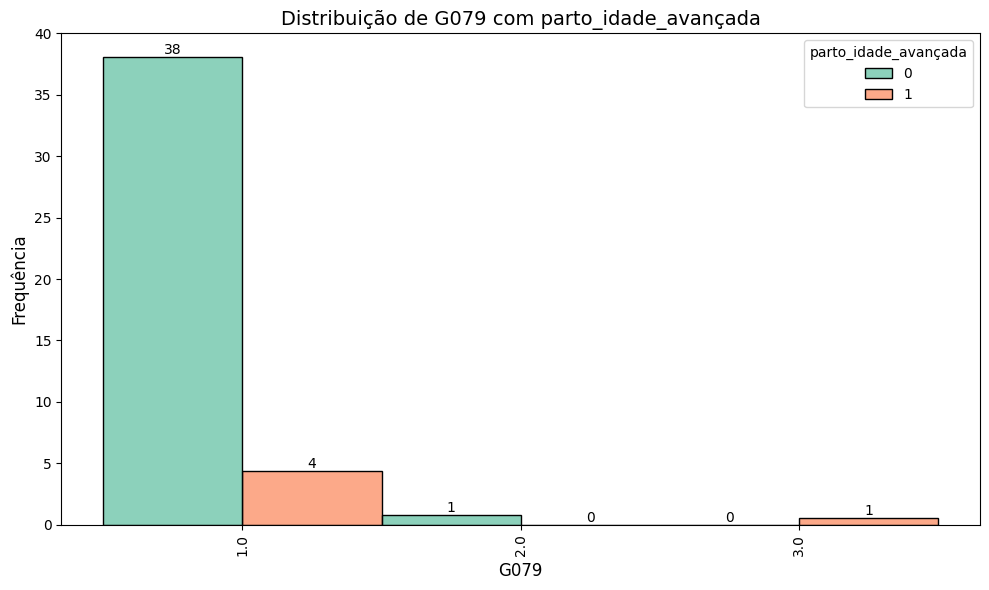

****************************************************************************************************
  Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
{1: 'Não, nenhuma dificuldade', 2: 'Sim, alguma dificuldade', 3: 'Sim, muita dificuldade', 4: 'Sim, não consegue de modo algum', 9: 'Ignorado'}
discreta


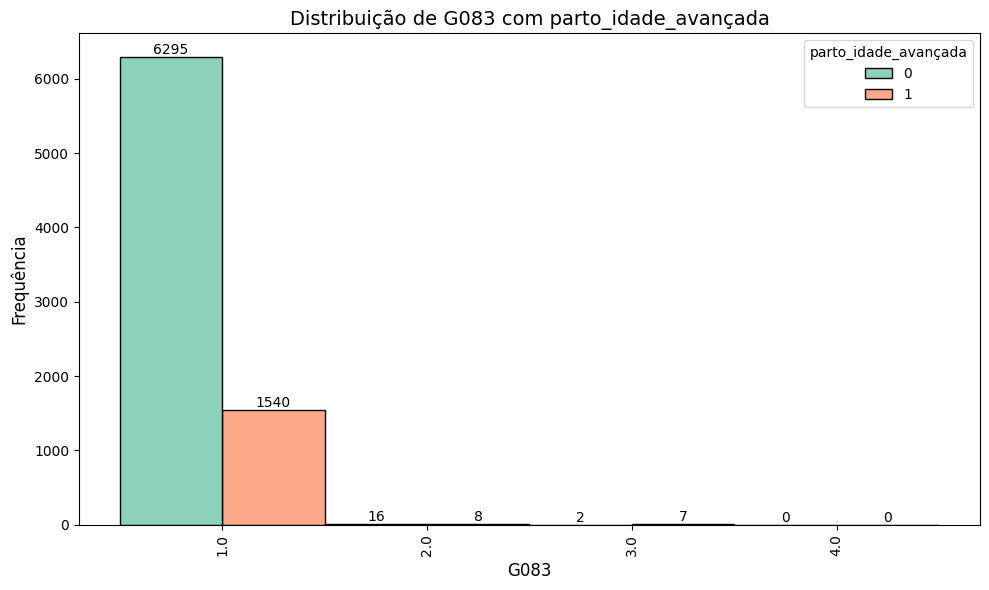

****************************************************************************************************
 Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}
discreta


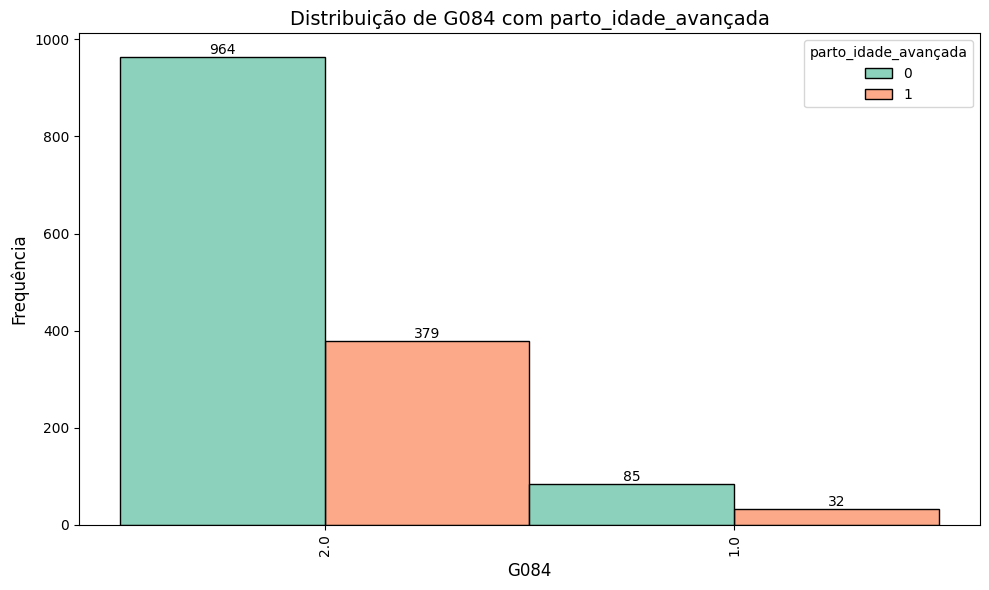

****************************************************************************************************
 A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
{1: 'Sim, fazem atualmente', 2: 'Sim, já fizeram', 3: 'Nunca fizeram', 9: 'Ignorado'}
discreta


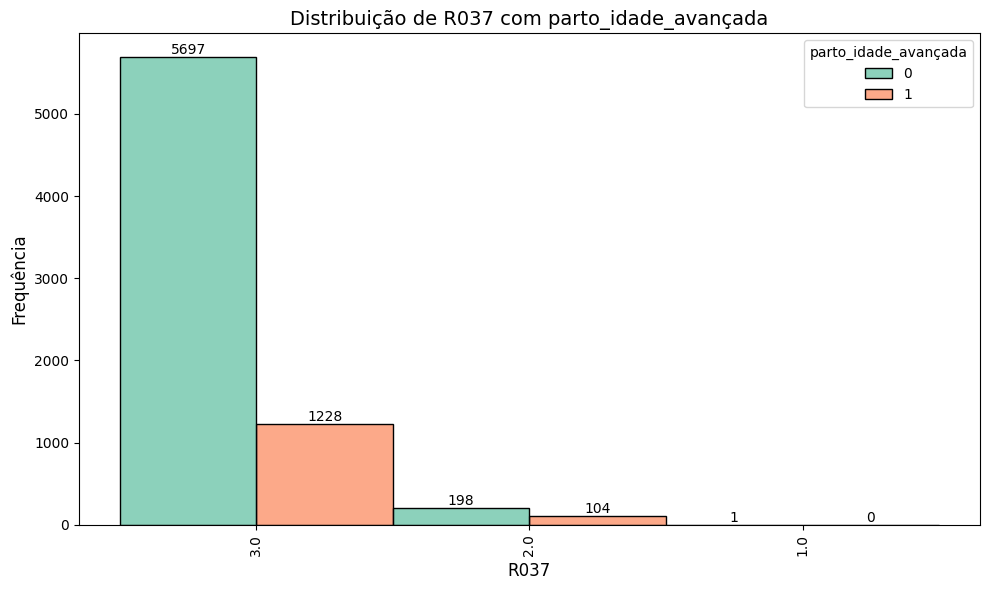

****************************************************************************************************
 Há quanto tempo a sra está tentando engravidar?
{1: 'Há menos de 6 meses', 2: 'De 6 meses a menos de 1 ano', 3: 'Há 1 ano ou mais', 9: 'Ignorado'}
discreta


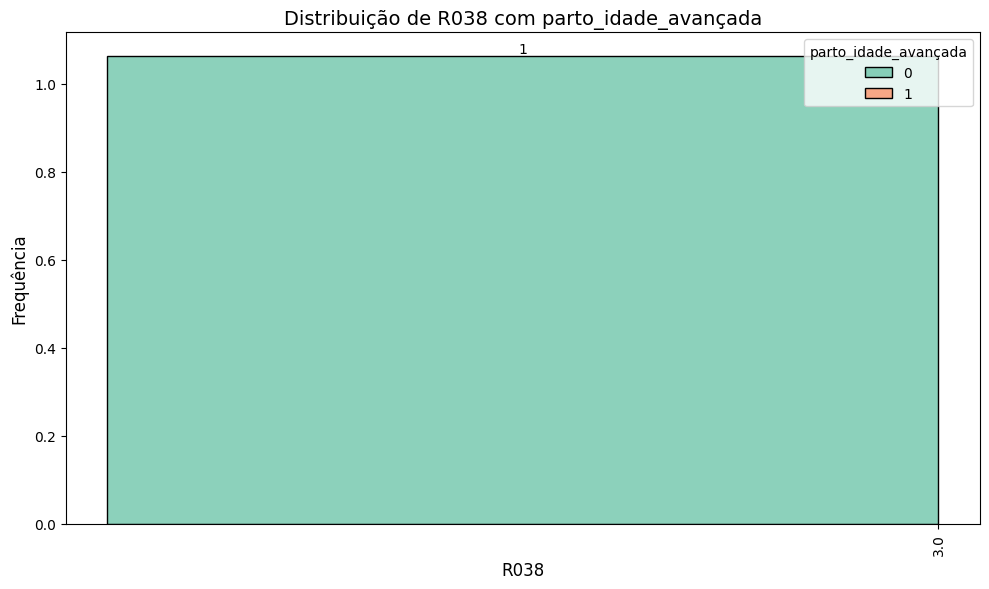

****************************************************************************************************
 Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}
discreta


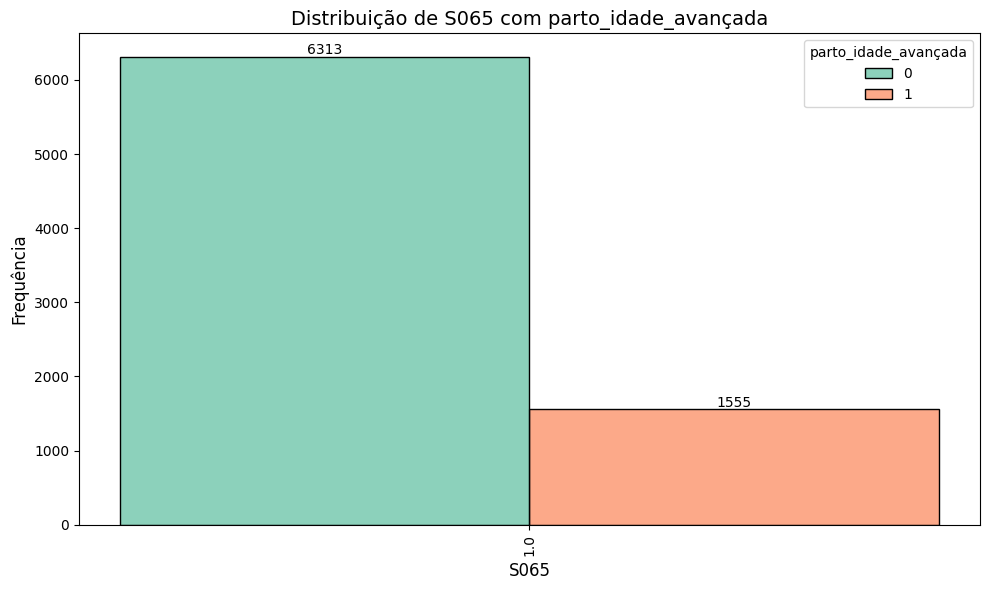

****************************************************************************************************
 Quantos partos a Sra já teve?
Numerico
discreta


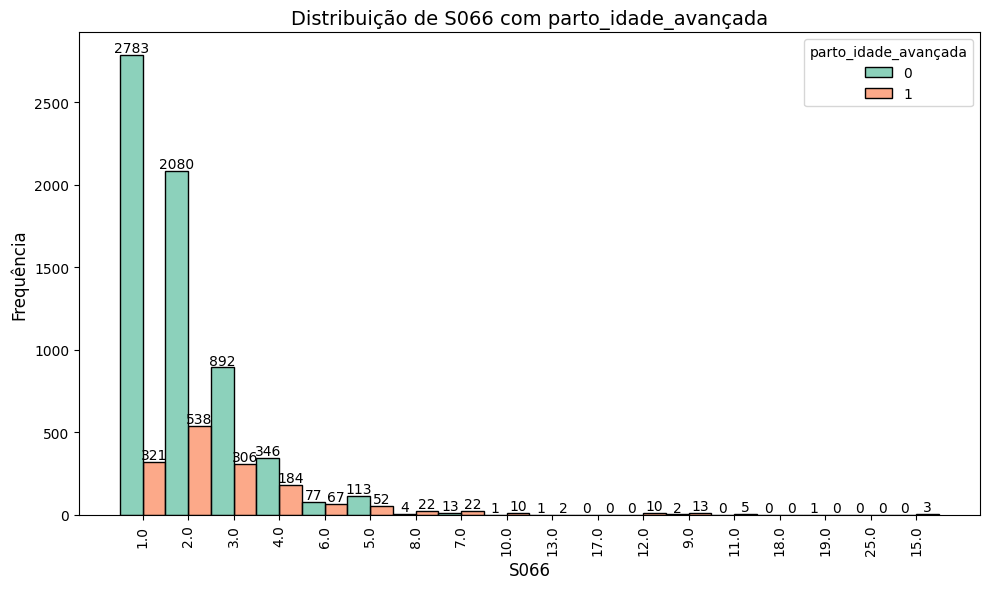

****************************************************************************************************
 Qual foi o tipo de parto?
{1: 'Parto normal/vaginal', 2: 'Cesariana', 9: 'Ignorado'}
discreta


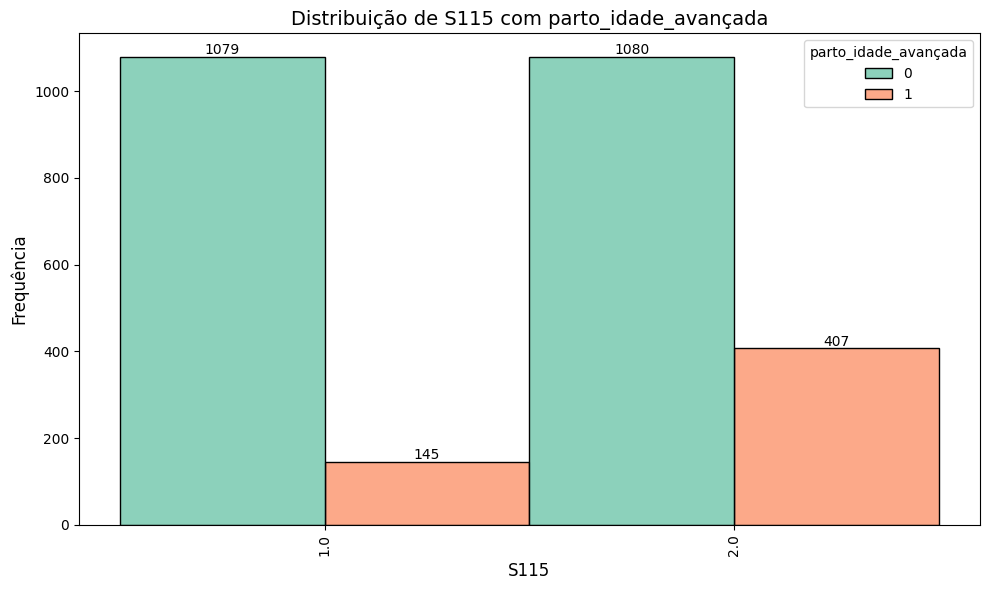

****************************************************************************************************
 Teve alguma complicação durante o parto?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}
discreta


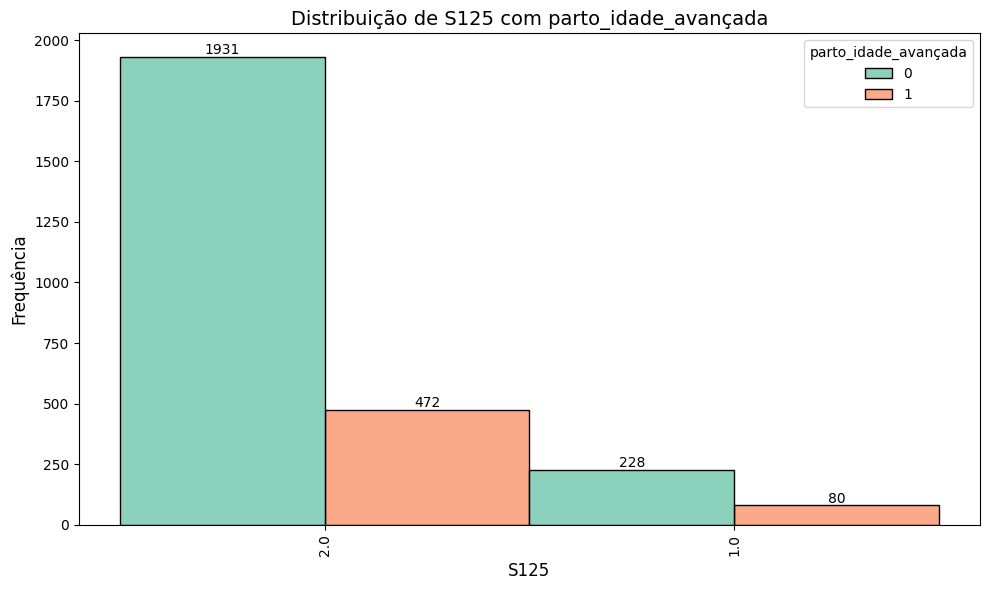

****************************************************************************************************
discreta


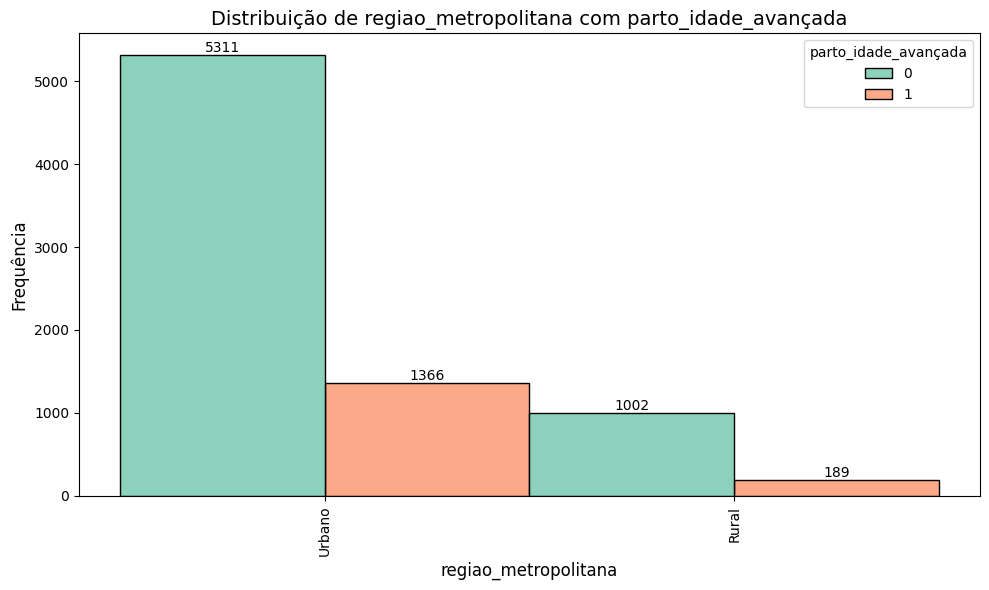

****************************************************************************************************
discreta


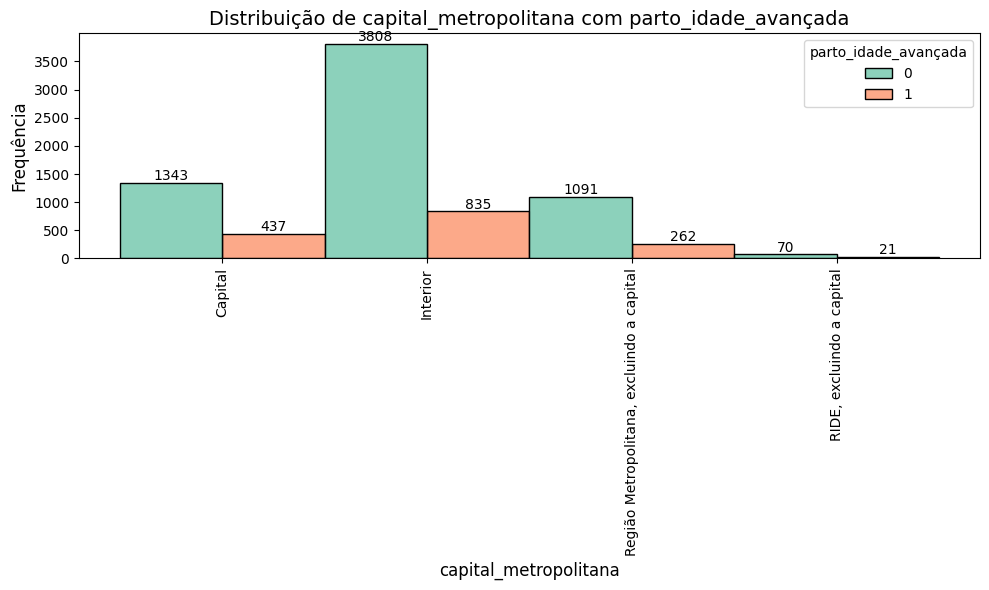

****************************************************************************************************


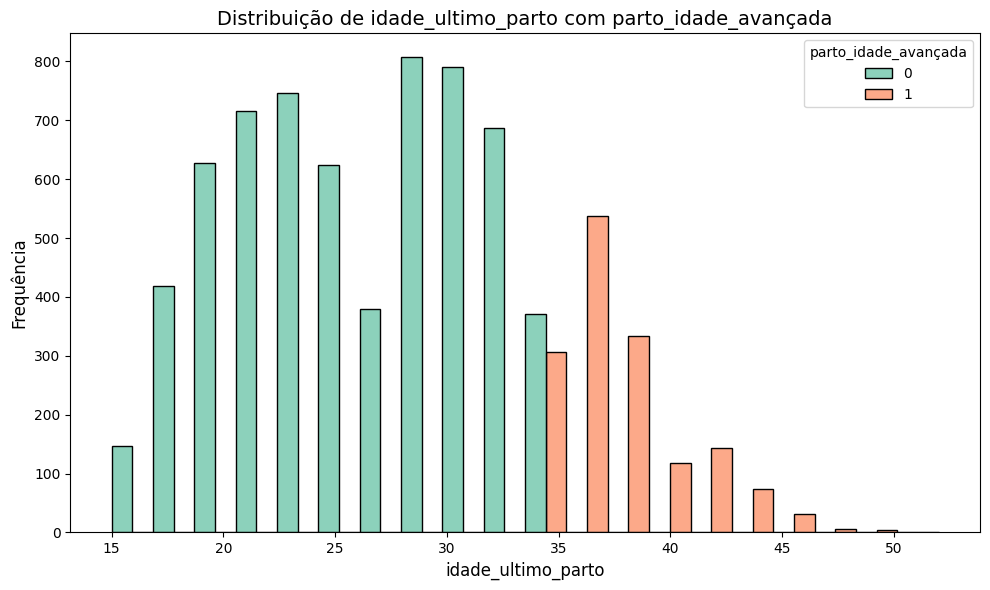

****************************************************************************************************
discreta


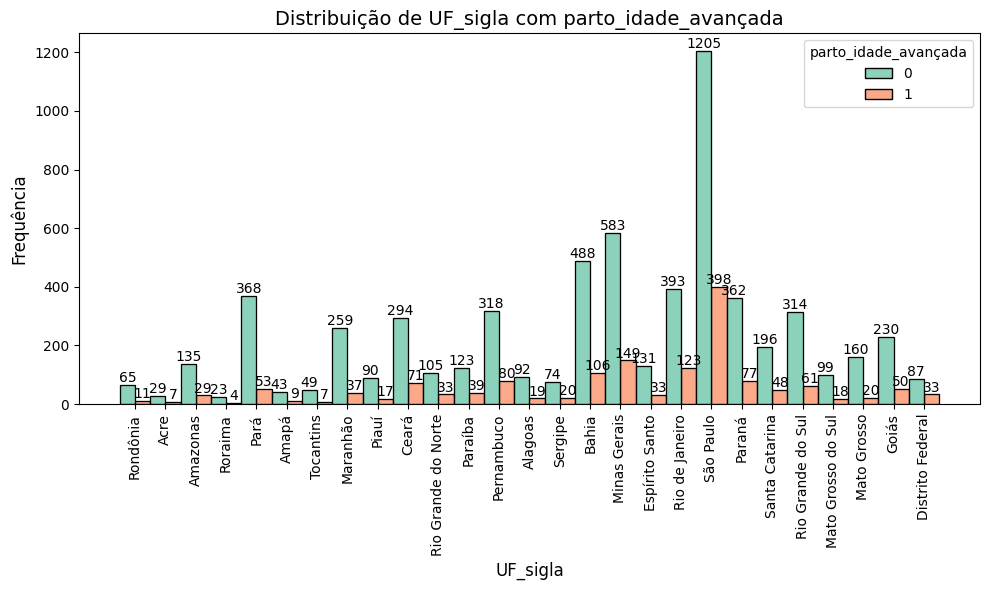

****************************************************************************************************
discreta


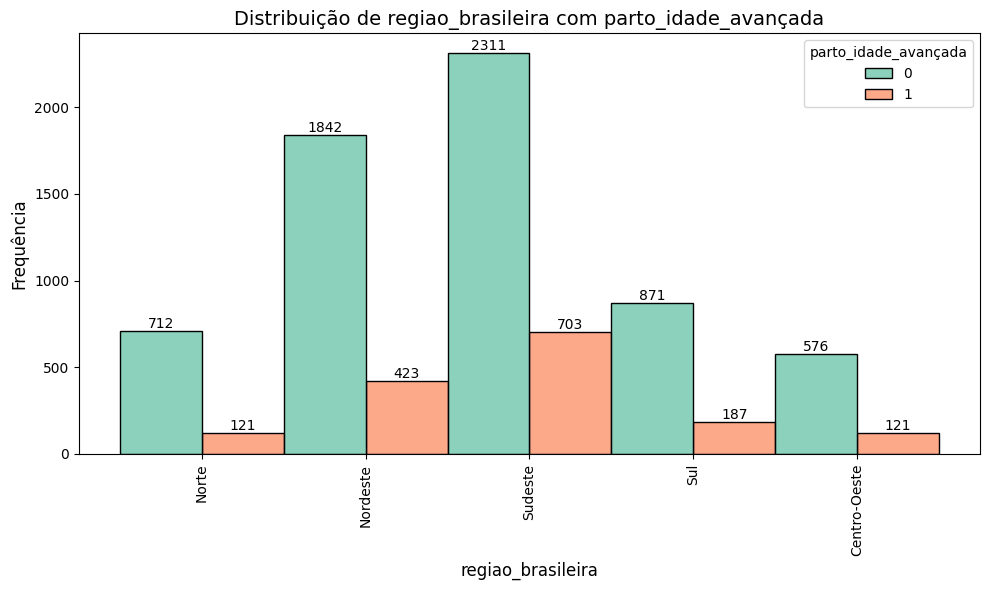

****************************************************************************************************
discreta


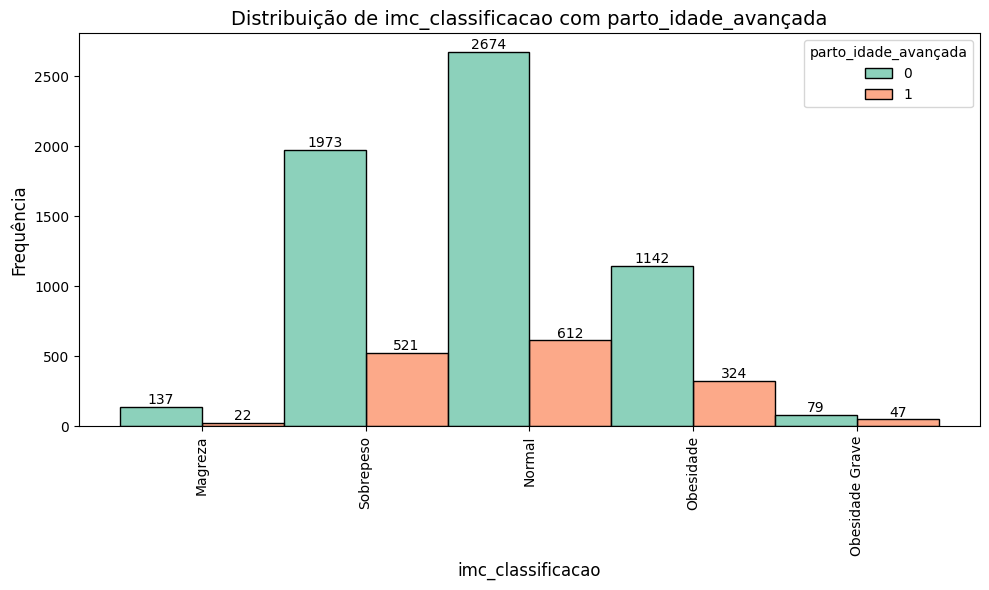

****************************************************************************************************
discreta


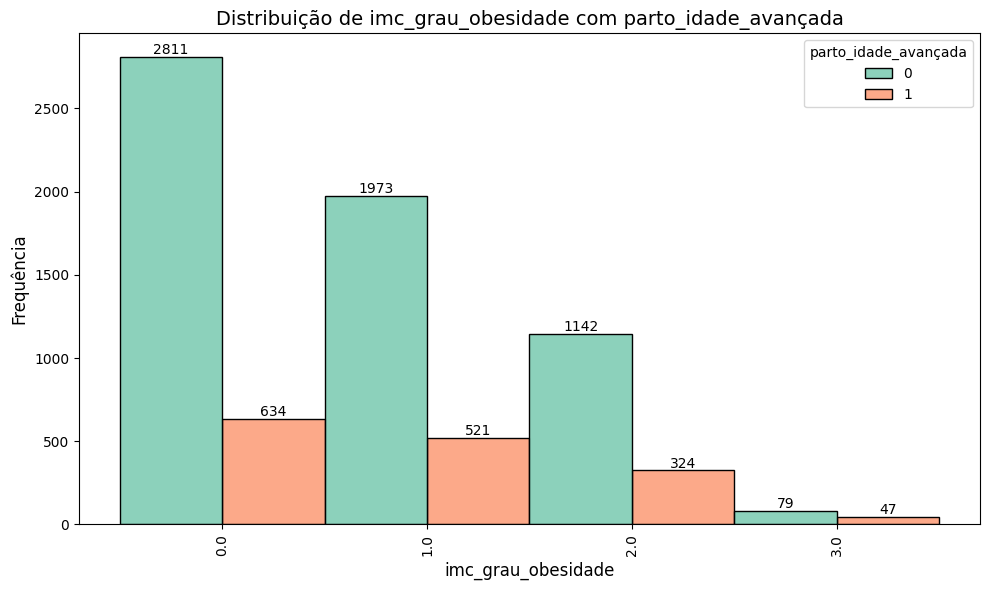

****************************************************************************************************
discreta


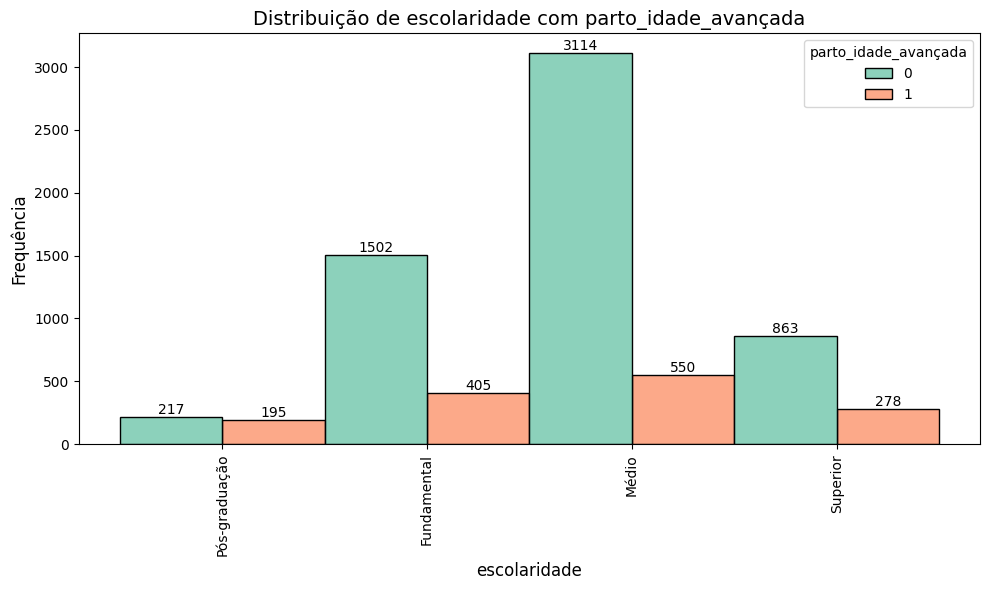

****************************************************************************************************
discreta


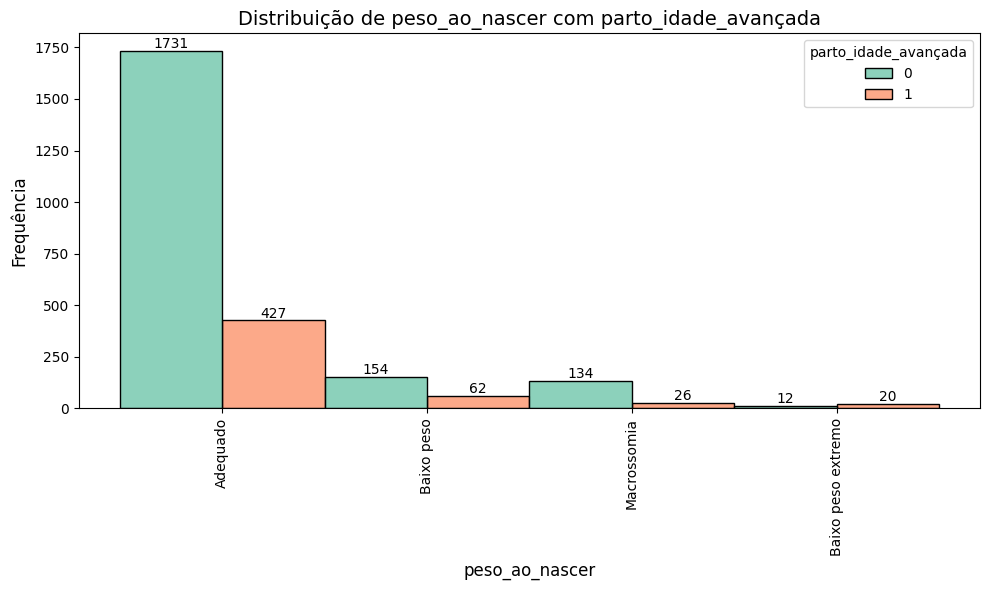

****************************************************************************************************
discreta


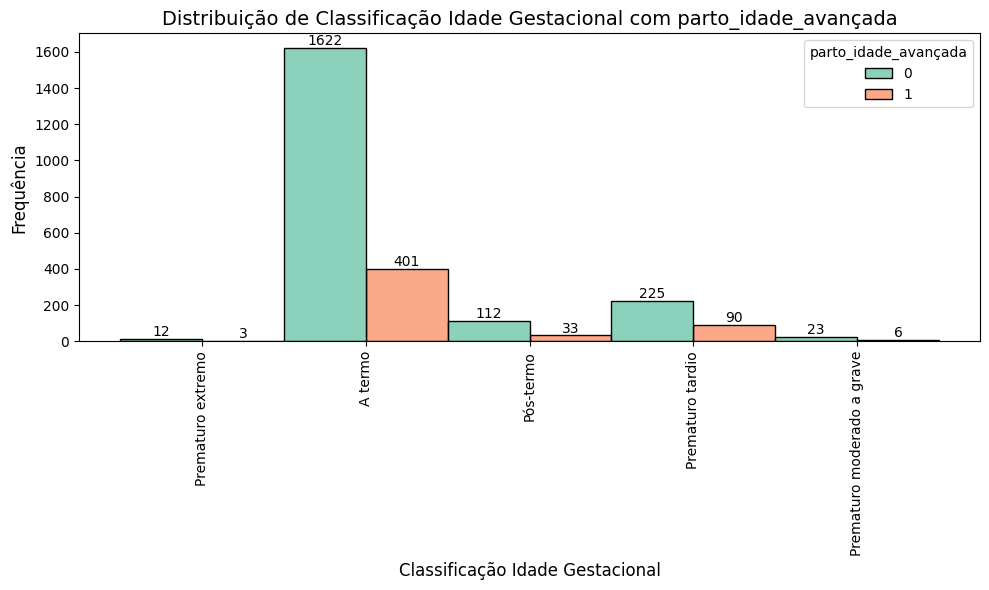

****************************************************************************************************
discreta


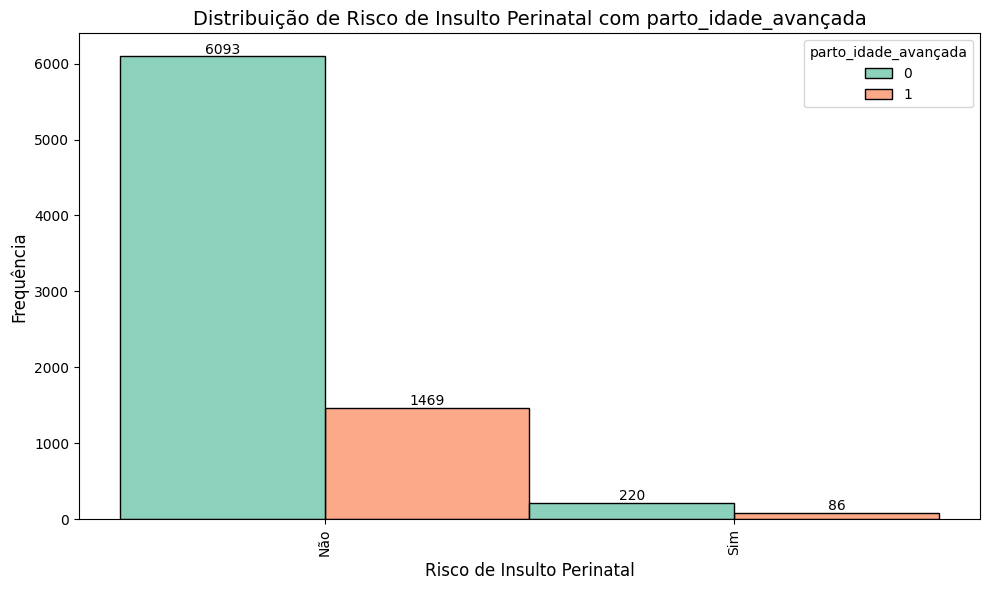

****************************************************************************************************
discreta


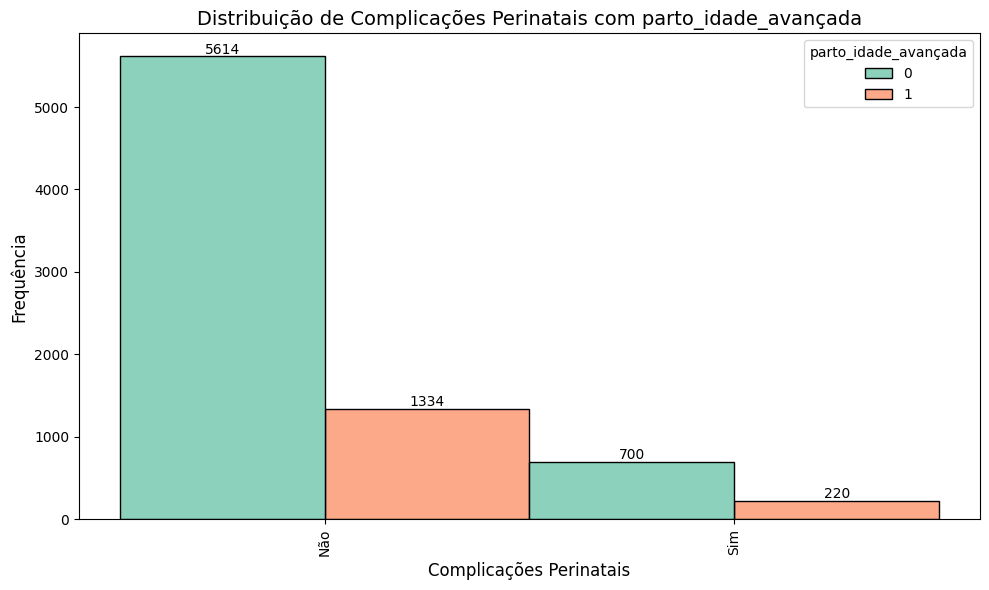

****************************************************************************************************
discreta


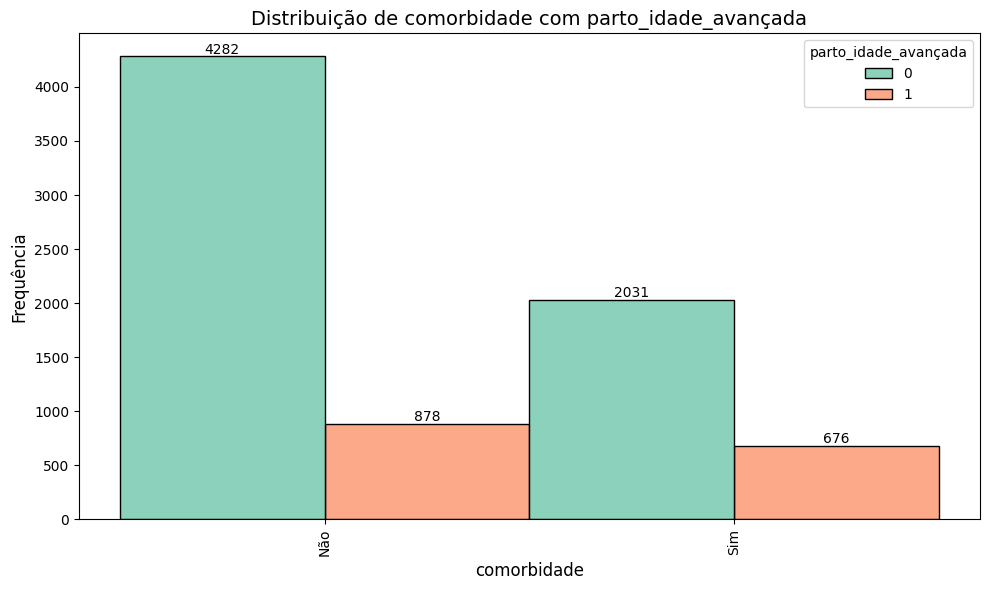

****************************************************************************************************
discreta


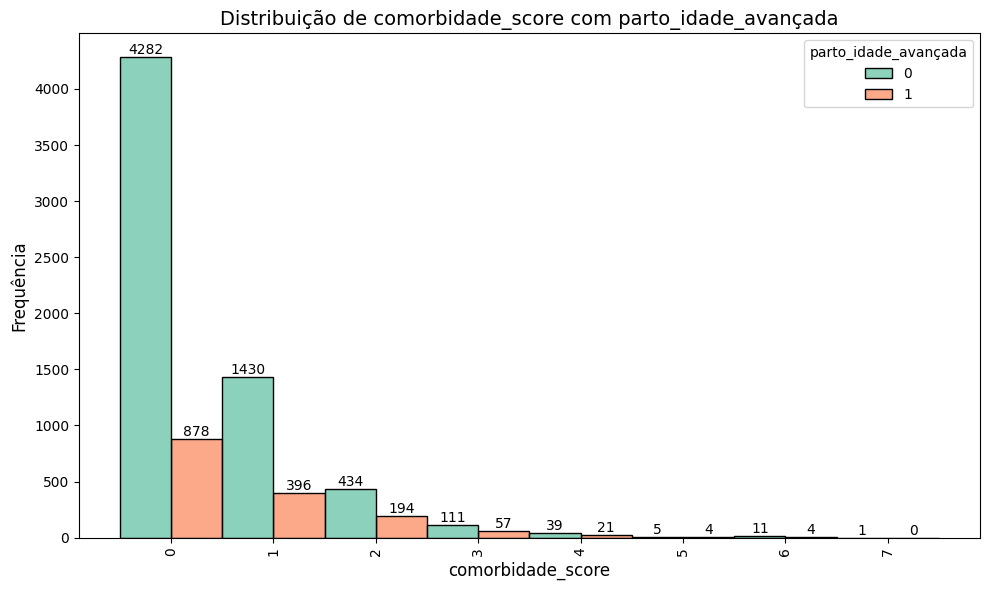

****************************************************************************************************


In [24]:
for col in colunas_interesse:
    if col in dicionario_variaveis:  # Verificar se `col` está no dicionário
        print(f" {dicionario_variaveis[col]}")
    if col in dicionario_valores:  # Verificar se `col` está no dicionário
        print(f"{dicionario_valores[col]}")
    plot_with_hue(df_grupo_maes, col, 'parto_idade_avançada')
    print("*"*100)
    

# Plots Nomralizados


In [25]:

def plot_with_hue_normalized(df, x_col, hue_col):
    """
    Plota gráficos com base no tipo de dado da coluna `x_col` e inclui uma coluna `hue_col`.
    Os dados são normalizados dentro de cada categoria de `hue` para lidar com desbalanceamento.
    Exibe as porcentagens relativas em cima de cada barra para variáveis categóricas.
    Para variáveis numéricas, exibe histogramas normalizados.

    :param df: DataFrame contendo os dados.
    :param x_col: Nome da coluna a ser usada no eixo X.
    :param hue_col: Nome da coluna a ser usada como hue.
    """
    if x_col not in df.columns or hue_col not in df.columns:
        raise ValueError(f"As colunas {x_col} ou {hue_col} não estão presentes no DataFrame.")

    # Verificar se a coluna tem apenas NaN
    if df[x_col].dropna().empty:
        print(f"A coluna {x_col} não possui dados válidos (apenas NaN). Gráfico não será gerado.")
        return

    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(df[x_col]):
        # Normalizar os dados para variáveis numéricas
        normalized_df = (
            df[[x_col, hue_col]]
            .dropna()
            .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
            .size()
            .reset_index(name="count")
        )

        # Normalizar por proporção dentro de cada grupo de hue_col
        normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())

        # Gráfico para variáveis numéricas
        plt.figure(figsize=(12, 7))
        sns.barplot(data=normalized_df, x=x_col, y="proportion", hue=hue_col, palette="Set2", weights=df['peso_morador_selec'])

        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Proporção", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    elif isinstance(df[x_col].dtype, pd.CategoricalDtype) or df[x_col].dtype == 'object':
        # Normalizar os dados para variáveis categóricas
        normalized_df = (
            df[[x_col, hue_col]]
            .dropna()
            .groupby([hue_col, x_col], observed=False)
            .size()
            .reset_index(name="count")
        )

        # Normalizar por proporção dentro de cada grupo de hue_col
        normalized_df['proportion'] = normalized_df.groupby(hue_col, observed=False)['count'].transform(lambda x: x / x.sum())

        # Gráfico para variáveis categóricas
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(data=normalized_df, x=x_col, y="proportion", hue=hue_col, palette="Set2")

        # Adicionar porcentagem acima de cada barra
        for container in ax.containers:
            ax.bar_label(
                container,
                labels=[f"{v.get_height() * 100:.1f}%" for v in container],
                label_type="edge",
                fontsize=10
            )

        # Configurações do gráfico
        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Proporção", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        raise ValueError(f"O tipo de dado da coluna {x_col} não é suportado para este gráfico.")


In [26]:
def plot_with_weights_and_normalization(df, x_col, hue_col):
    """
    Plota gráficos usando pesos amostrais e normaliza os dados dentro de cada categoria de `hue_col`.
    - Se `x_col` for categórica, usa um countplot com pesos e normalização.
    - Se `x_col` for numérica, usa um histplot ponderado e normalizado.

    :param df: DataFrame contendo os dados.
    :param x_col: Nome da coluna a ser usada no eixo X.
    :param hue_col: Nome da coluna a ser usada como hue.
    """
    if x_col not in df.columns or hue_col not in df.columns:
        raise ValueError(f"As colunas {x_col} ou {hue_col} não estão presentes no DataFrame.")

    # Verificar se a coluna tem apenas NaN
    if df[x_col].dropna().empty:
        print(f"A coluna {x_col} não possui dados válidos (apenas NaN). Gráfico não será gerado.")
        return

    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(df[x_col]):
        # Normalizar os pesos dentro de cada grupo do hue
        df['normalized_weight'] = df.groupby(hue_col, observed=True)['peso_morador_selec'].transform(lambda x: x / x.sum())

        # Plotar histograma normalizado usando os pesos ajustados
        plt.figure(figsize=(12, 7))
        sns.histplot(
            data=df, x=x_col, hue=hue_col, weights=df['normalized_weight'],
            bins=20, multiple='dodge', palette="Set2", kde=False
        )
        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col} (Pesos Ajustados)", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Frequência Normalizada", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    elif isinstance(df[x_col].dtype, pd.CategoricalDtype) or df[x_col].dtype == 'object':
        df[x_col] = df[x_col].dropna().astype(str)

        # Agrupar e normalizar os pesos dentro de cada categoria do hue_col
        normalized_df = (
            df[[x_col, hue_col, 'peso_morador_selec']]
            .dropna()
            .groupby([hue_col, x_col], observed=False)
            .agg({'peso_morador_selec': 'sum'})
            .reset_index()
        )

        # Normalizar por proporção dentro de cada grupo hue_col
        normalized_df['proportion'] = normalized_df.groupby(hue_col, observed=True)['peso_morador_selec'].transform(lambda x: x / x.sum())

        # Plotar gráfico de barras com pesos normalizados
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(
            data=normalized_df, x=x_col, y="proportion", hue=hue_col, palette="Set2"
        )

        # Adicionar porcentagens acima das barras
        for container in ax.containers:
            ax.bar_label(
                container,
                labels=[f"{v.get_height() * 100:.1f}%" for v in container],
                label_type="edge",
                fontsize=10
            )

        # Configuração do gráfico
        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col} (Pesos Ajustados)", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Proporção Normalizada", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    else:
        raise ValueError(f"O tipo de dado da coluna {x_col} não é suportado para este gráfico.")

 Idade do morador na data de referência
Numerico


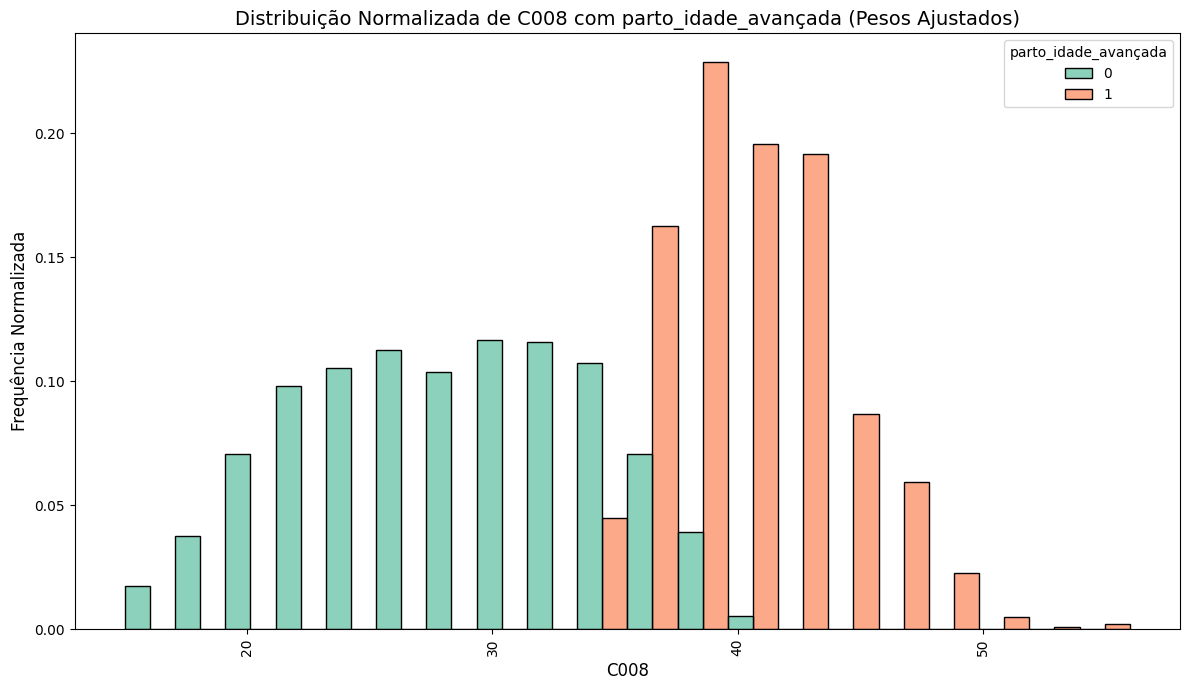

****************************************************************************************************
  ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
{1: 'Não, nenhuma dificuldade', 2: 'Sim, alguma dificuldade', 3: 'Sim, muita dificuldade', 4: 'Sim, não consegue de modo algum', 9: 'Ignorado'}


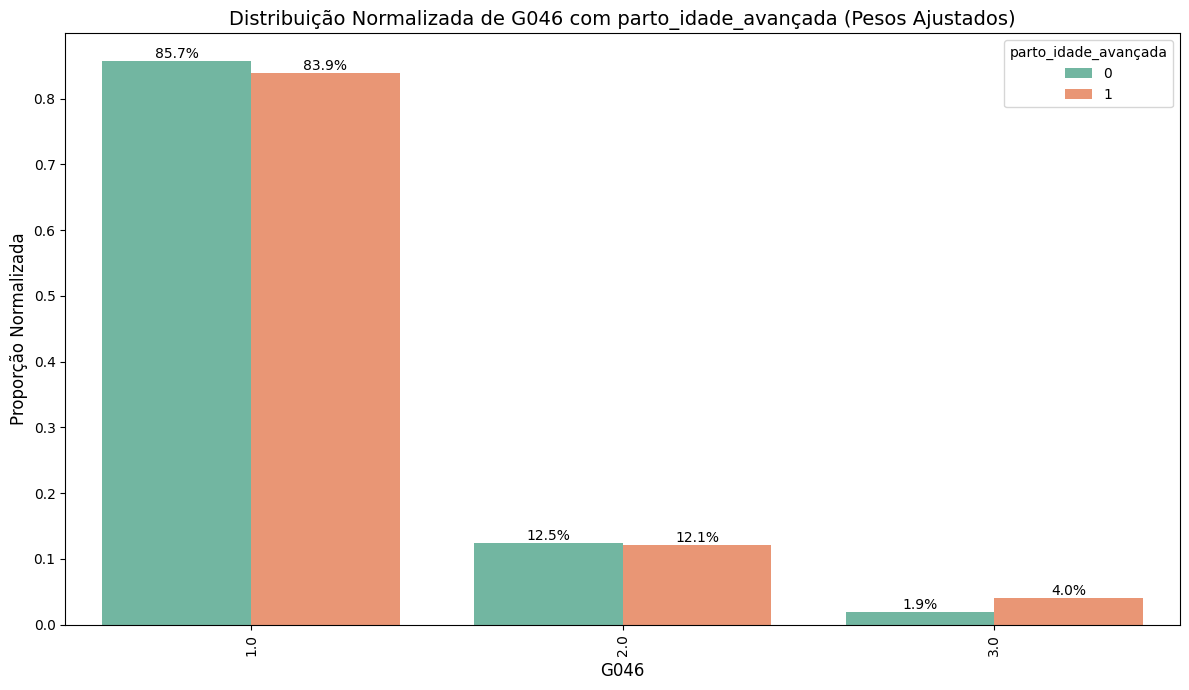

****************************************************************************************************
 ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}


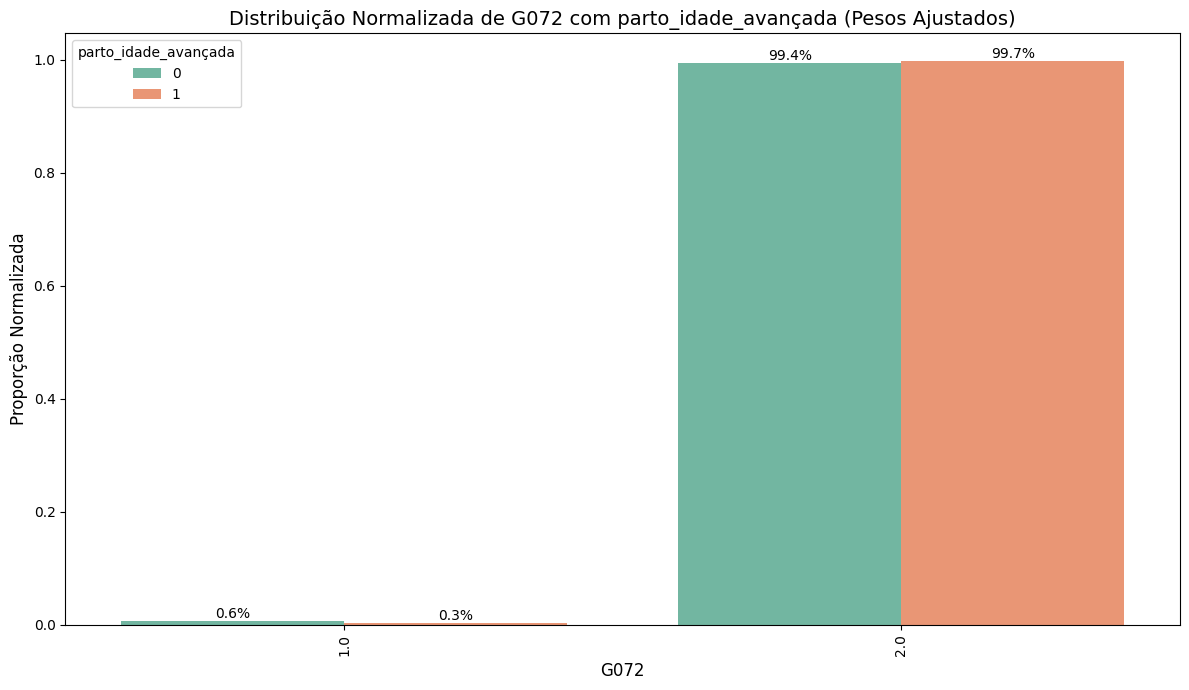

****************************************************************************************************
  ____________ faz uso de prótese para os membros superiores?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}


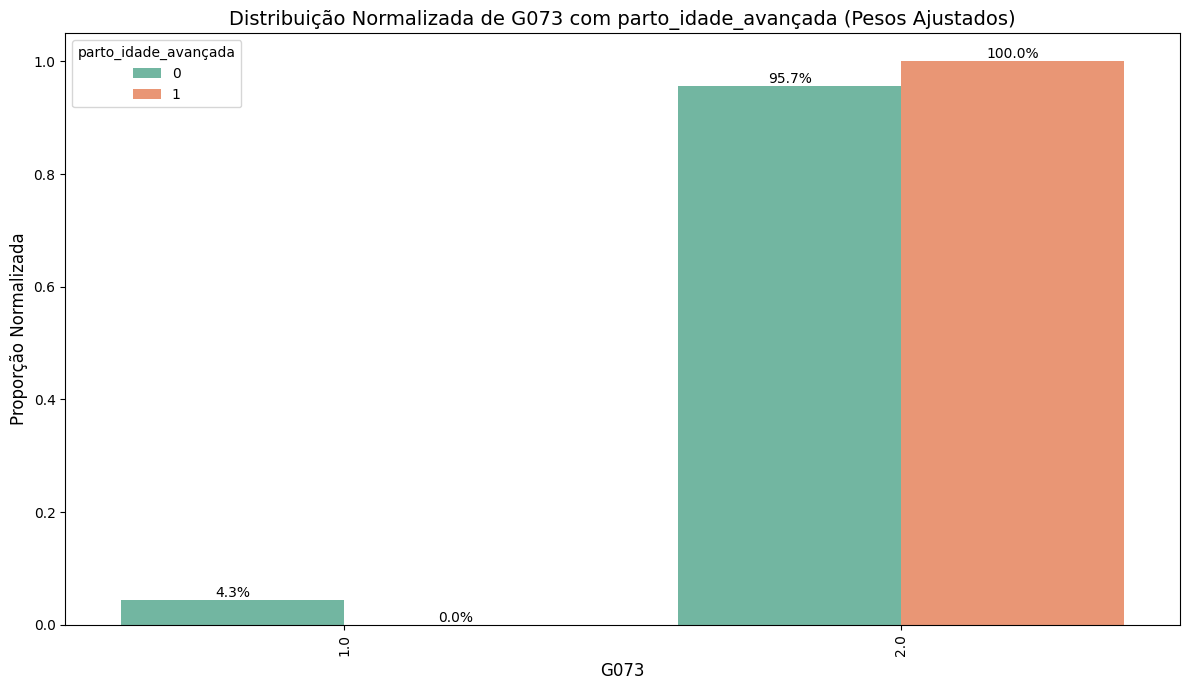

****************************************************************************************************
   ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
{1: 'Não, nenhuma dificuldade', 2: 'Sim, alguma dificuldade', 3: 'Sim, muita dificuldade', 4: 'Sim, não consegue de modo algum', 9: 'Ignorado'}


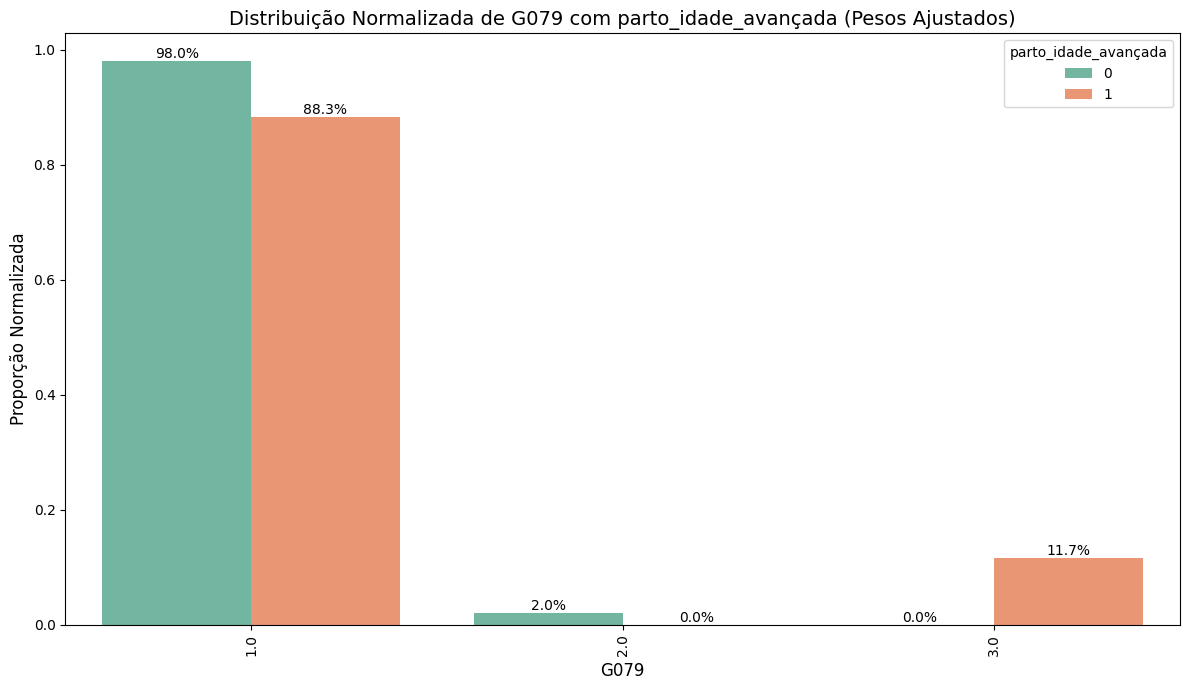

****************************************************************************************************
  Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
{1: 'Não, nenhuma dificuldade', 2: 'Sim, alguma dificuldade', 3: 'Sim, muita dificuldade', 4: 'Sim, não consegue de modo algum', 9: 'Ignorado'}


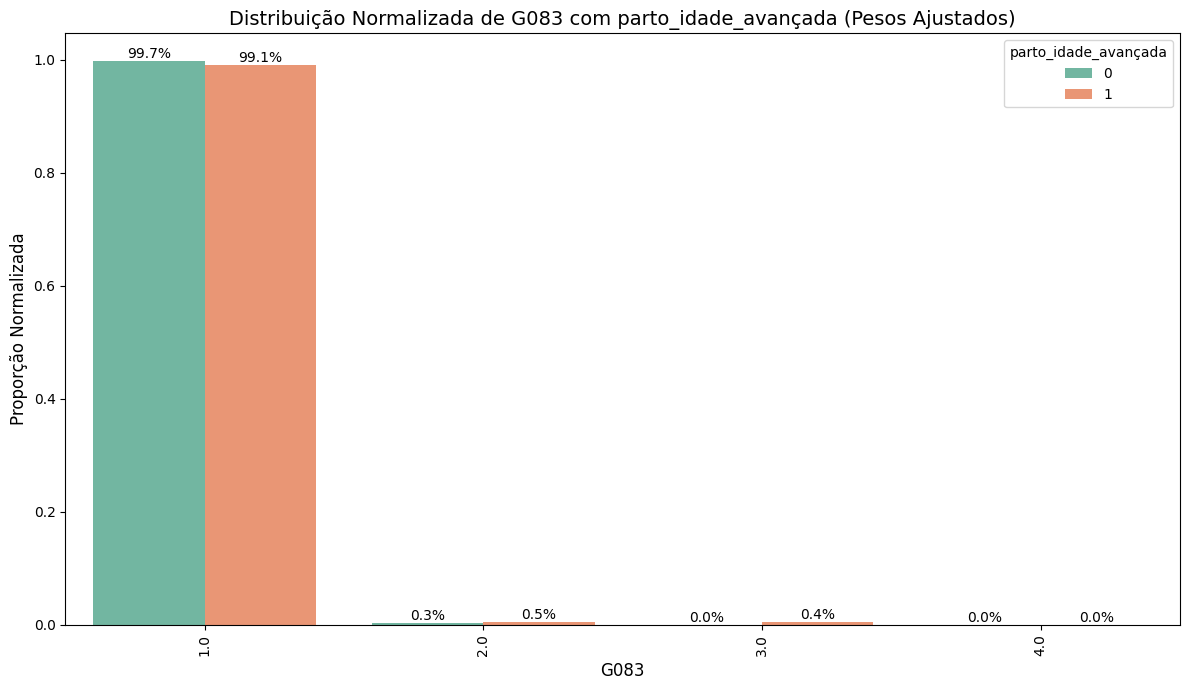

****************************************************************************************************
 Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}


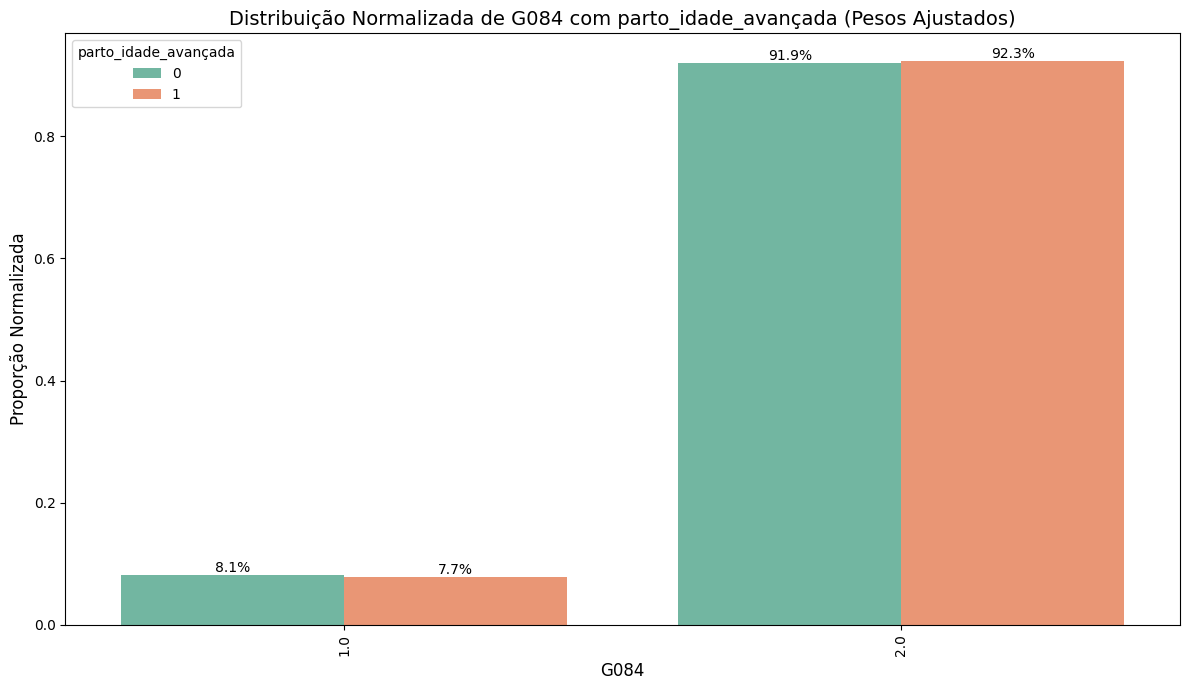

****************************************************************************************************
 A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
{1: 'Sim, fazem atualmente', 2: 'Sim, já fizeram', 3: 'Nunca fizeram', 9: 'Ignorado'}


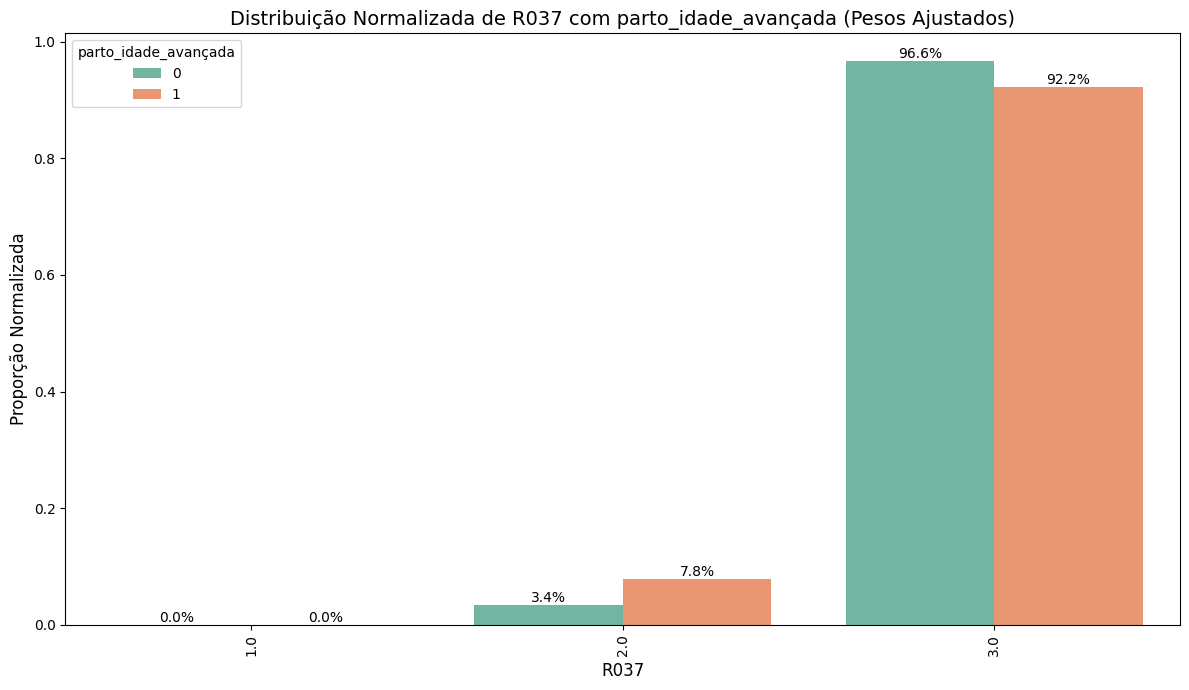

****************************************************************************************************
 Há quanto tempo a sra está tentando engravidar?
{1: 'Há menos de 6 meses', 2: 'De 6 meses a menos de 1 ano', 3: 'Há 1 ano ou mais', 9: 'Ignorado'}


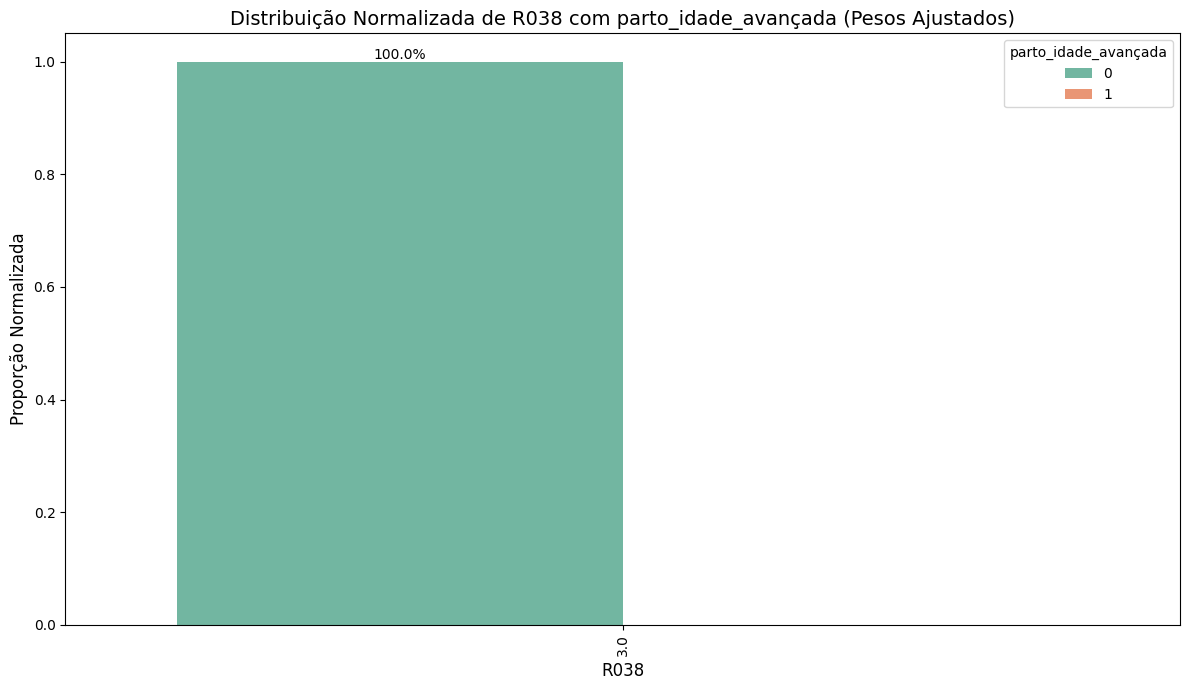

****************************************************************************************************
 Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}


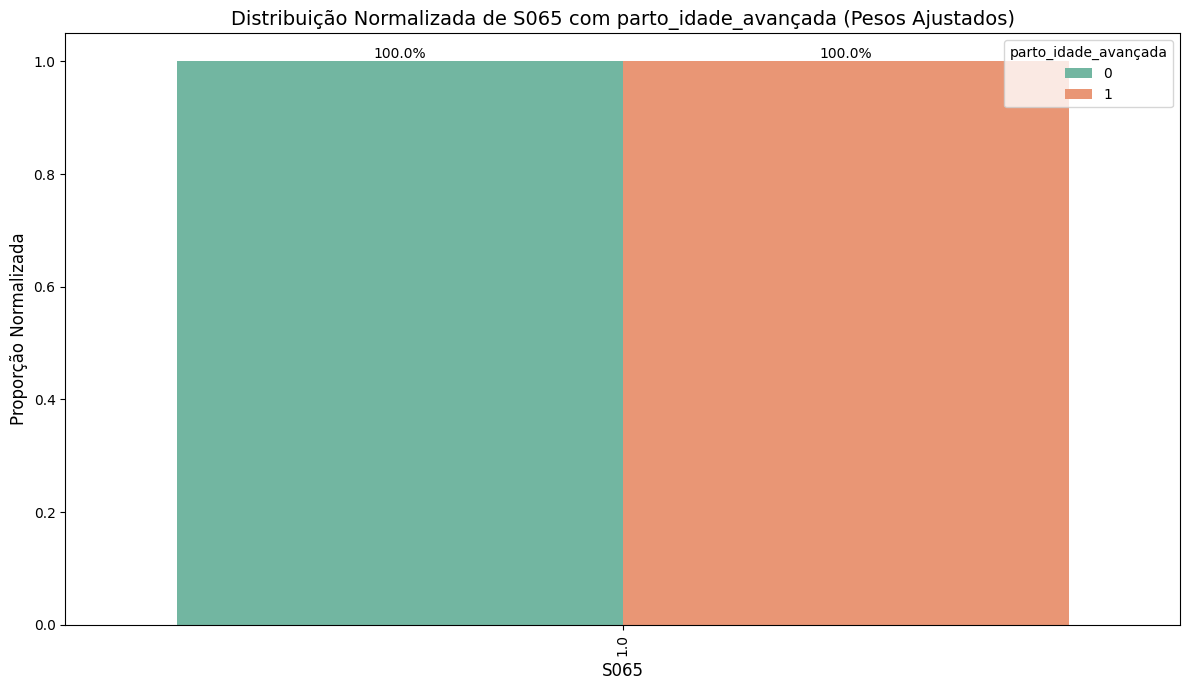

****************************************************************************************************
 Quantos partos a Sra já teve?
Numerico


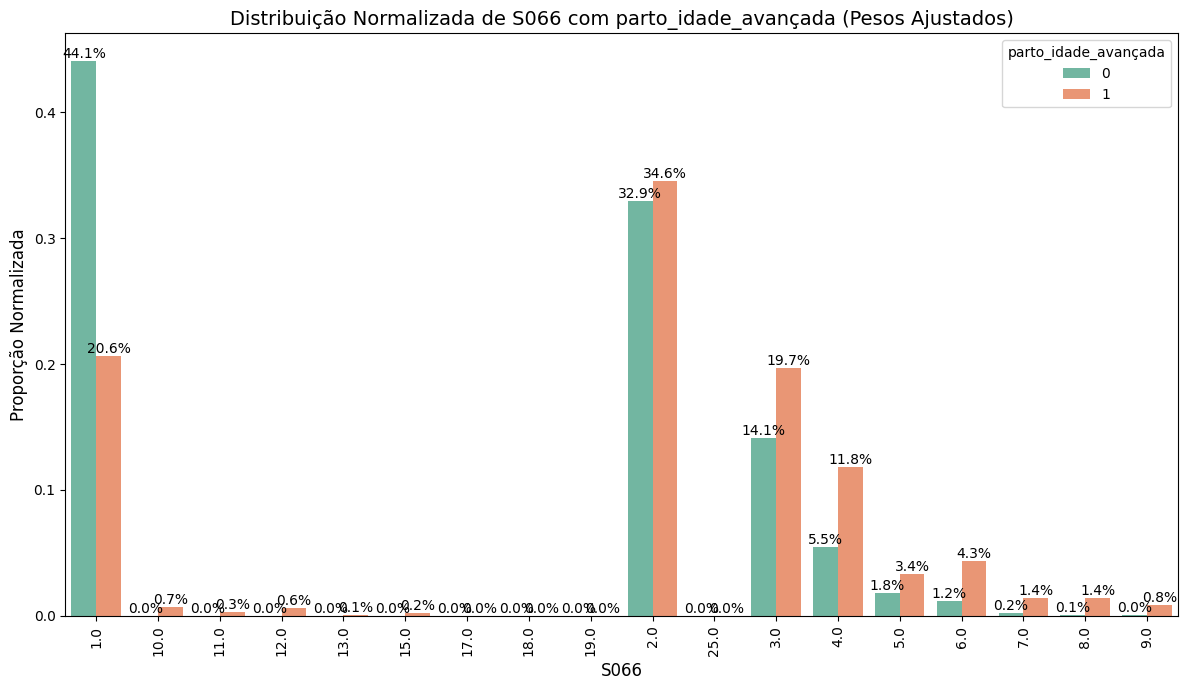

****************************************************************************************************
 Qual foi o tipo de parto?
{1: 'Parto normal/vaginal', 2: 'Cesariana', 9: 'Ignorado'}


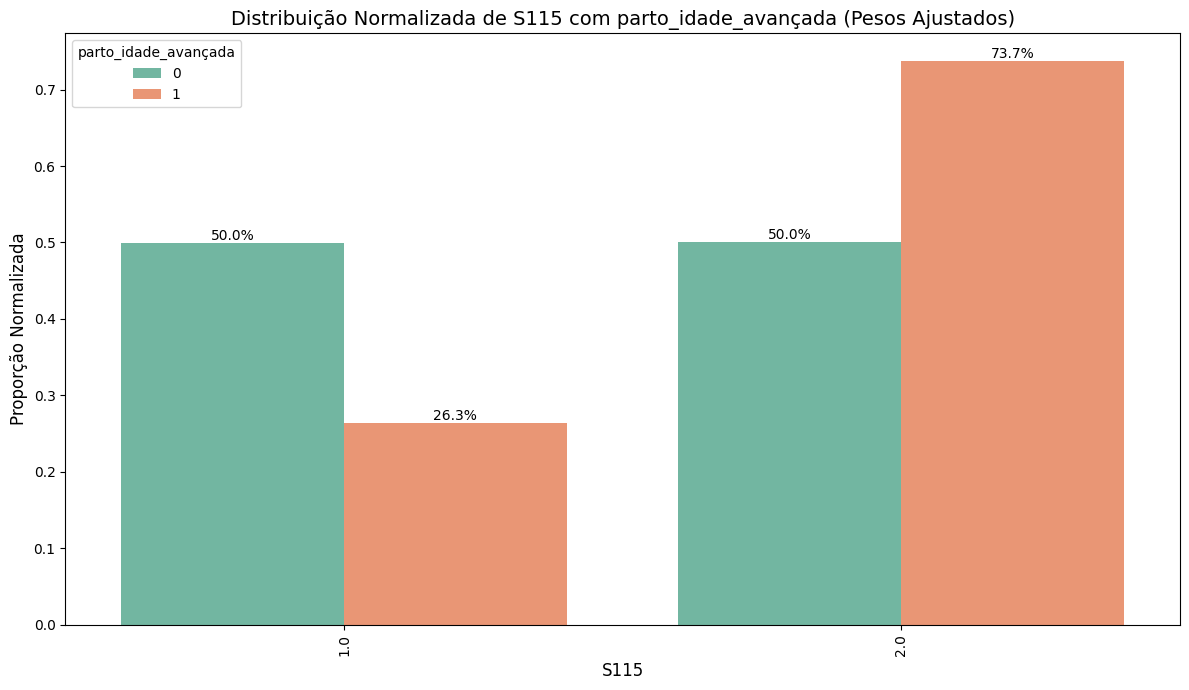

****************************************************************************************************
 Teve alguma complicação durante o parto?
{1: 'Sim', 2: 'Não', 9: 'Ignorado'}


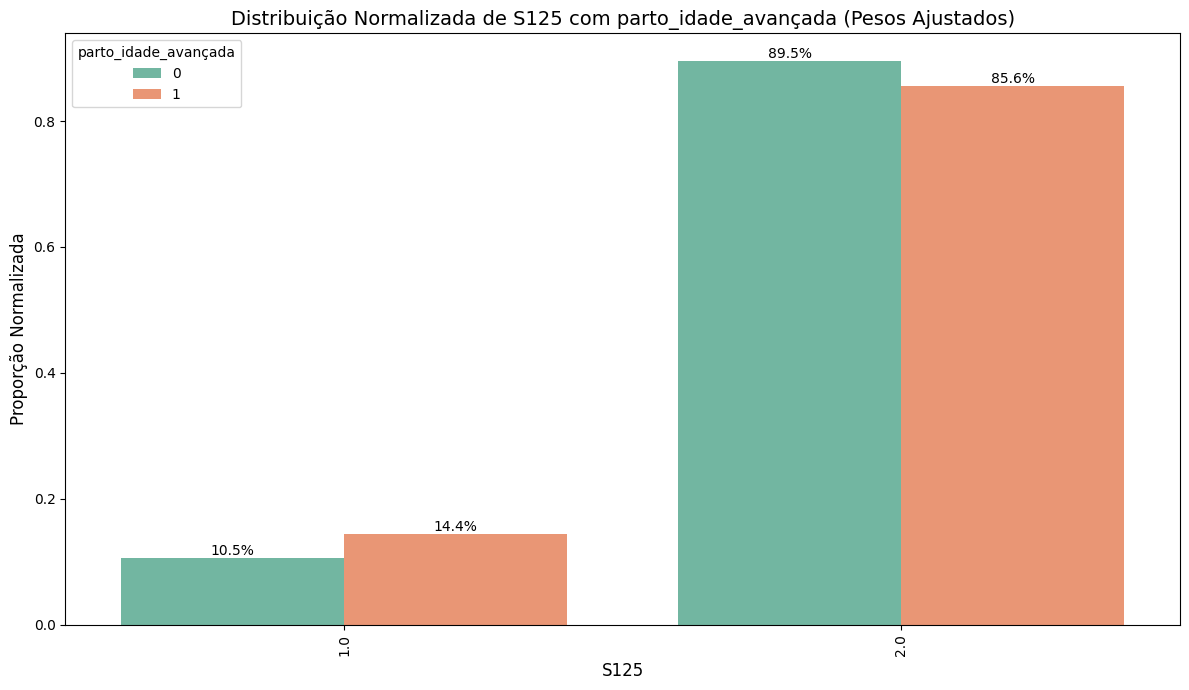

****************************************************************************************************


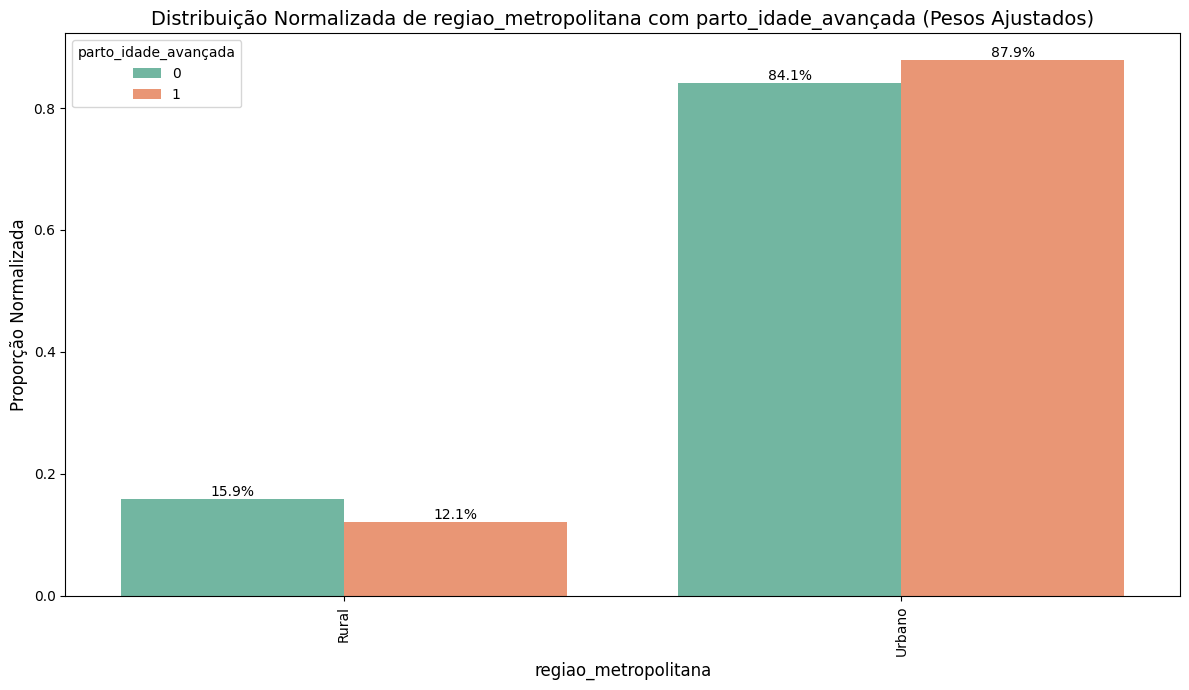

****************************************************************************************************


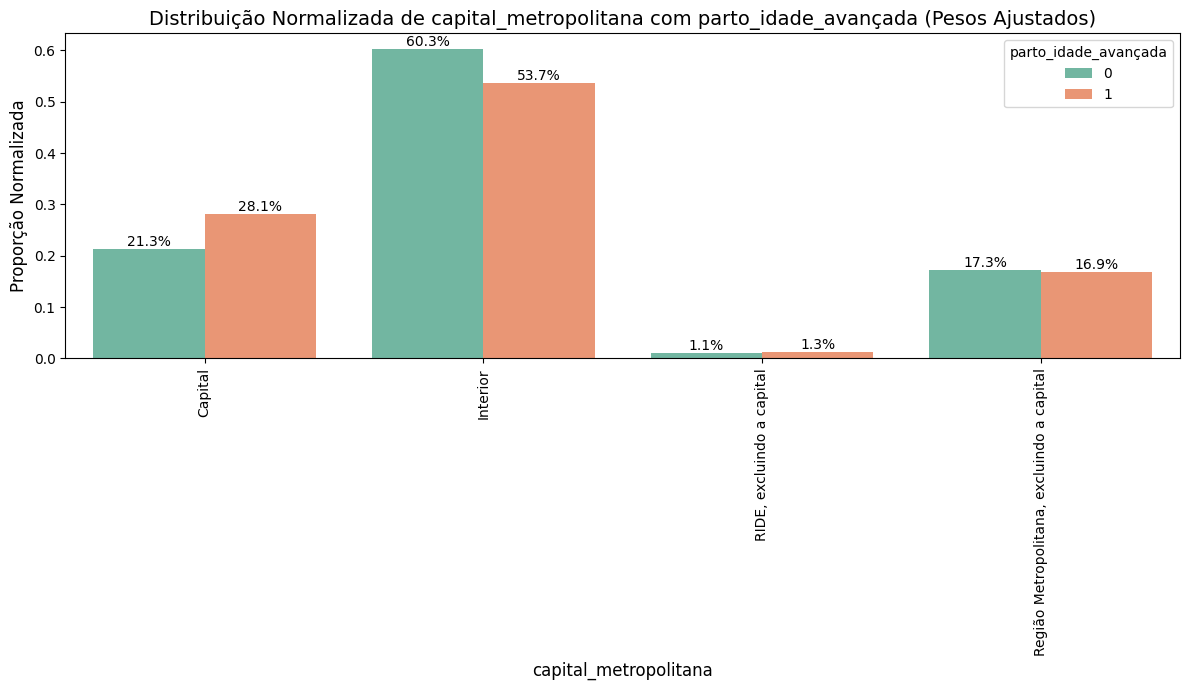

****************************************************************************************************


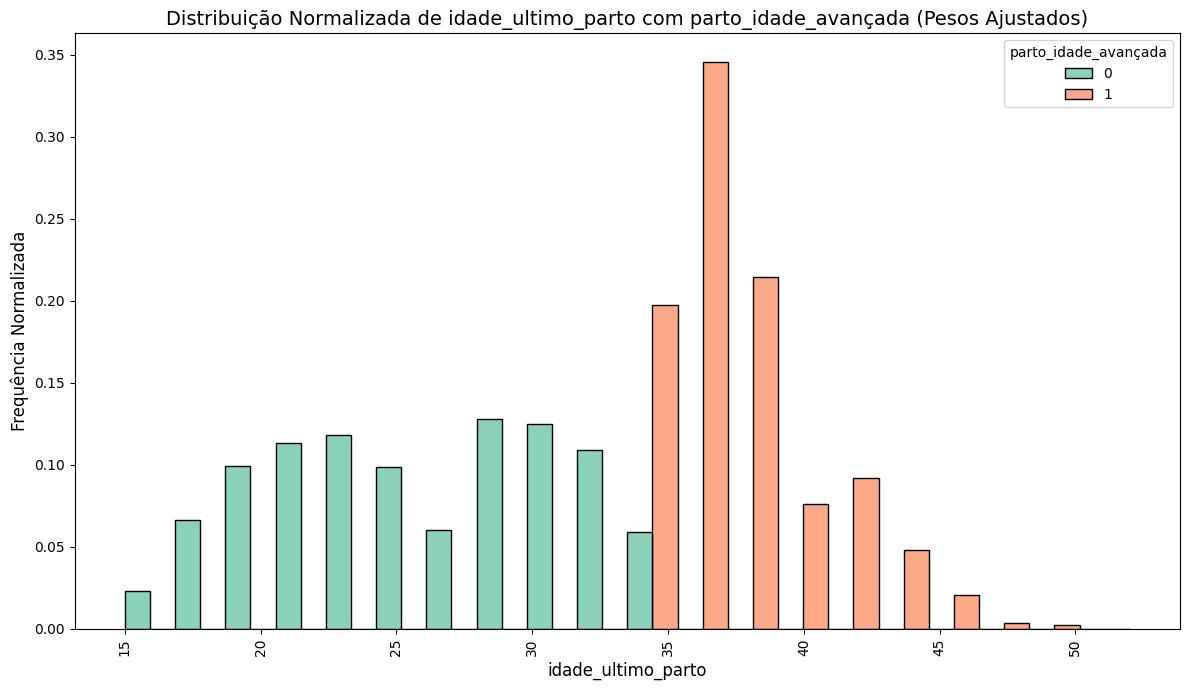

****************************************************************************************************


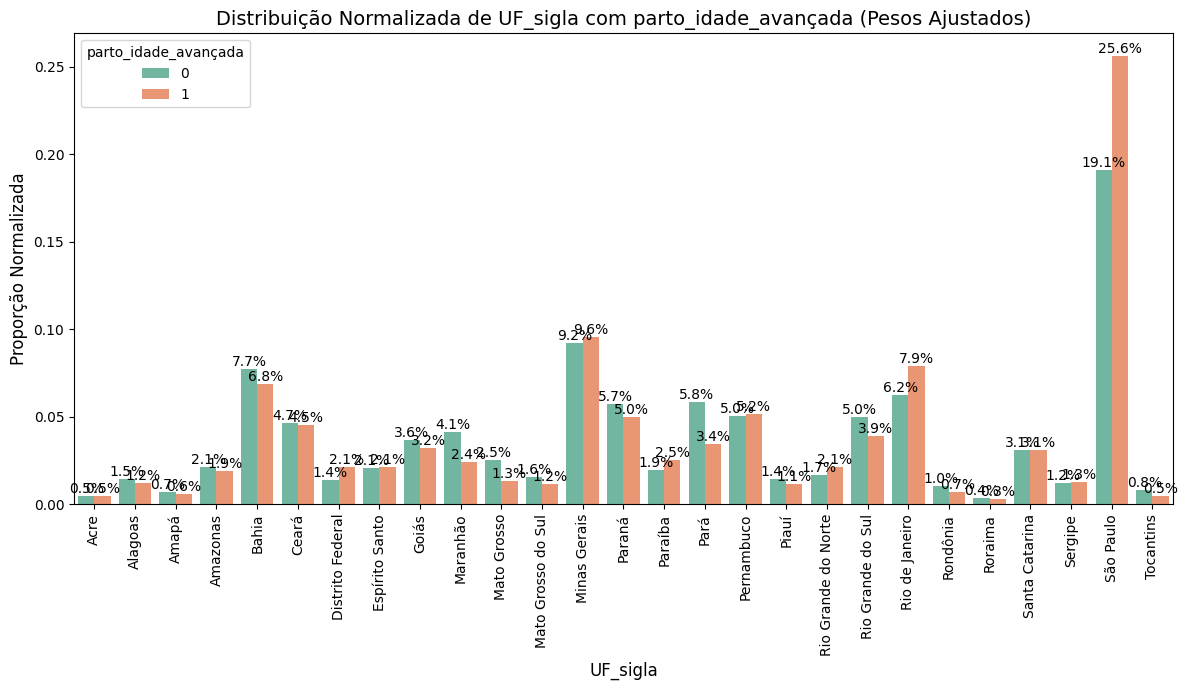

****************************************************************************************************


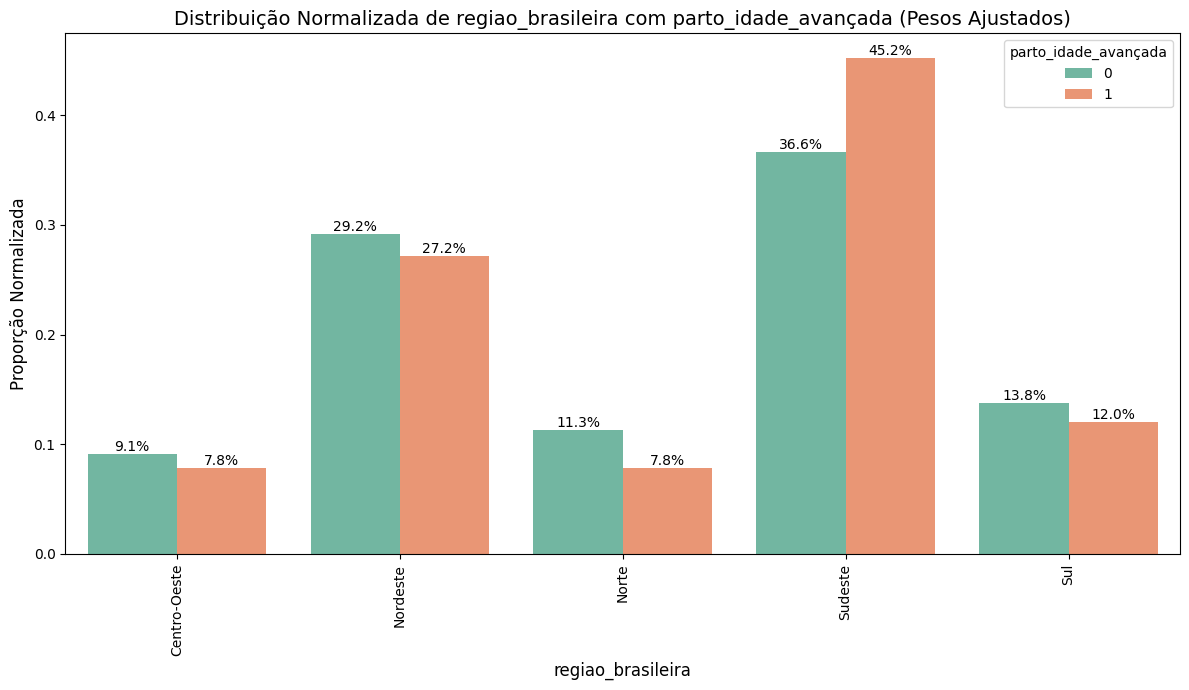

****************************************************************************************************


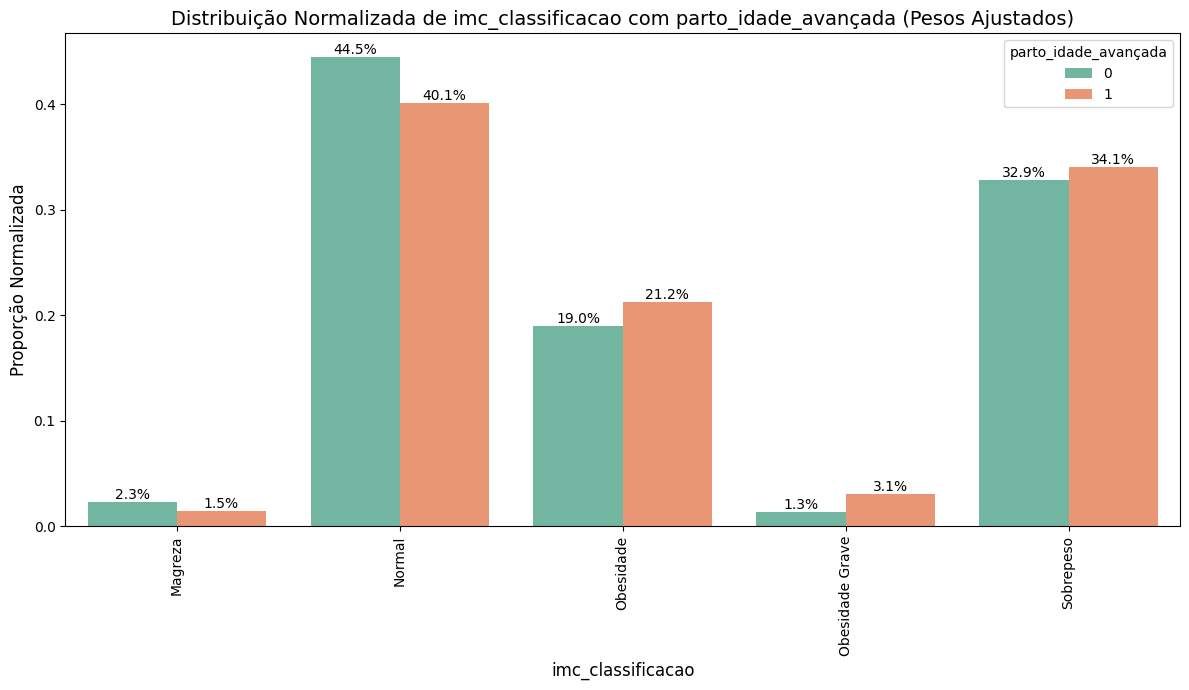

****************************************************************************************************


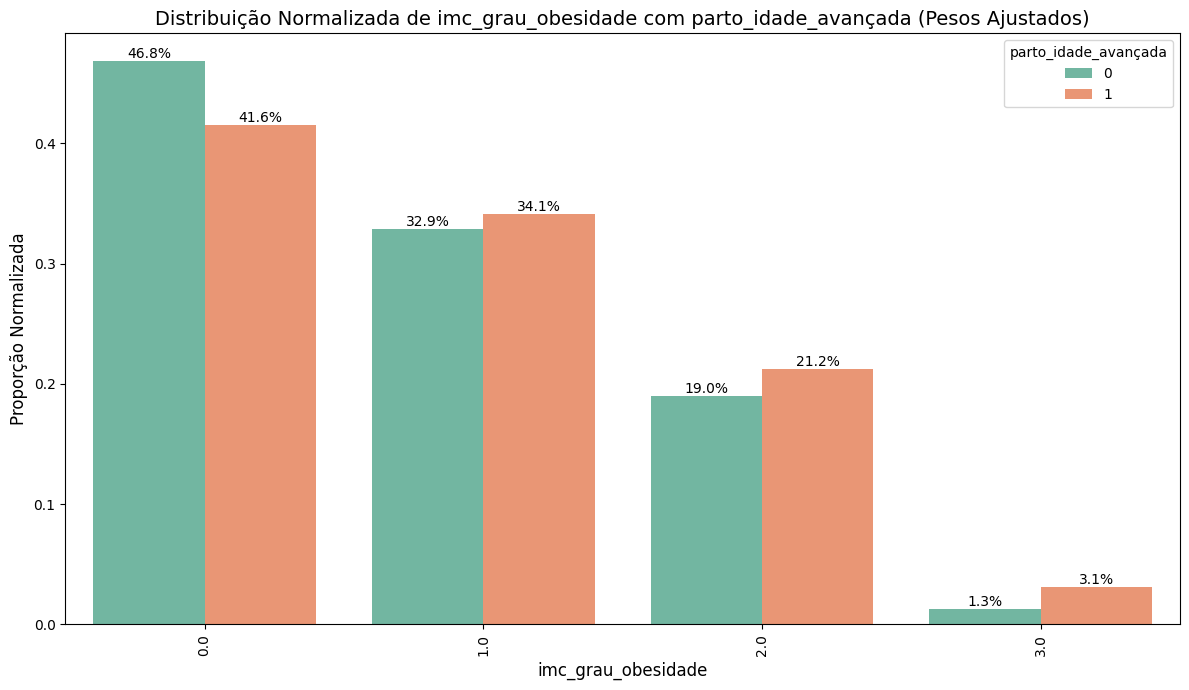

****************************************************************************************************


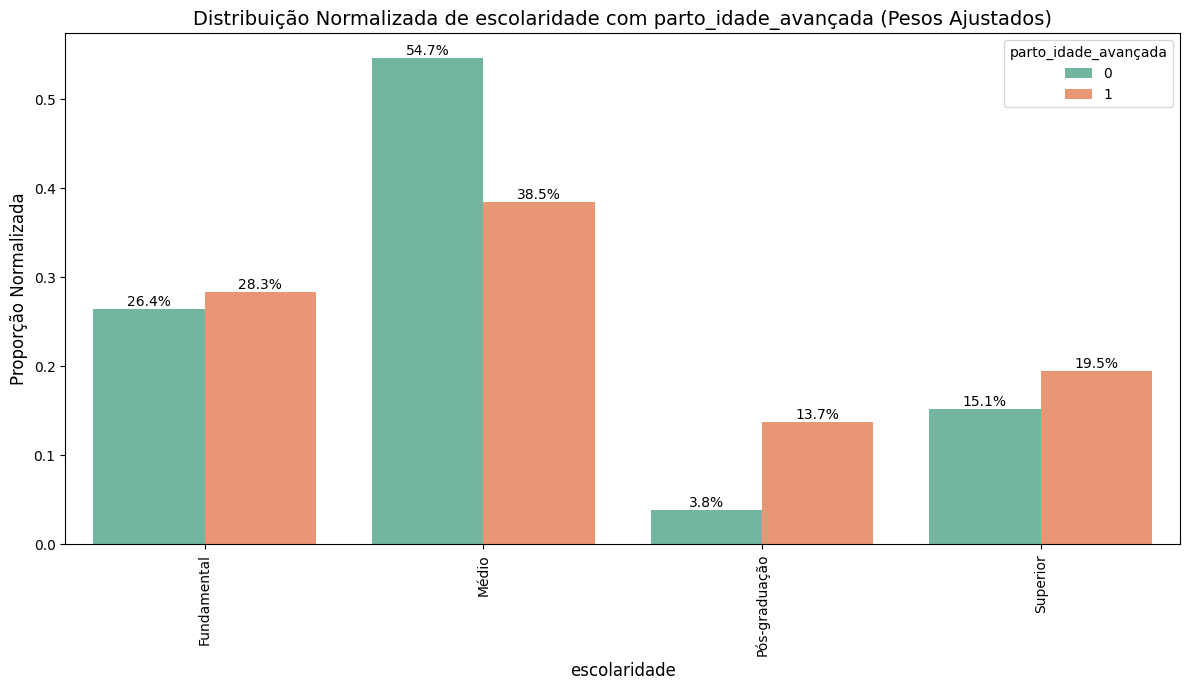

****************************************************************************************************


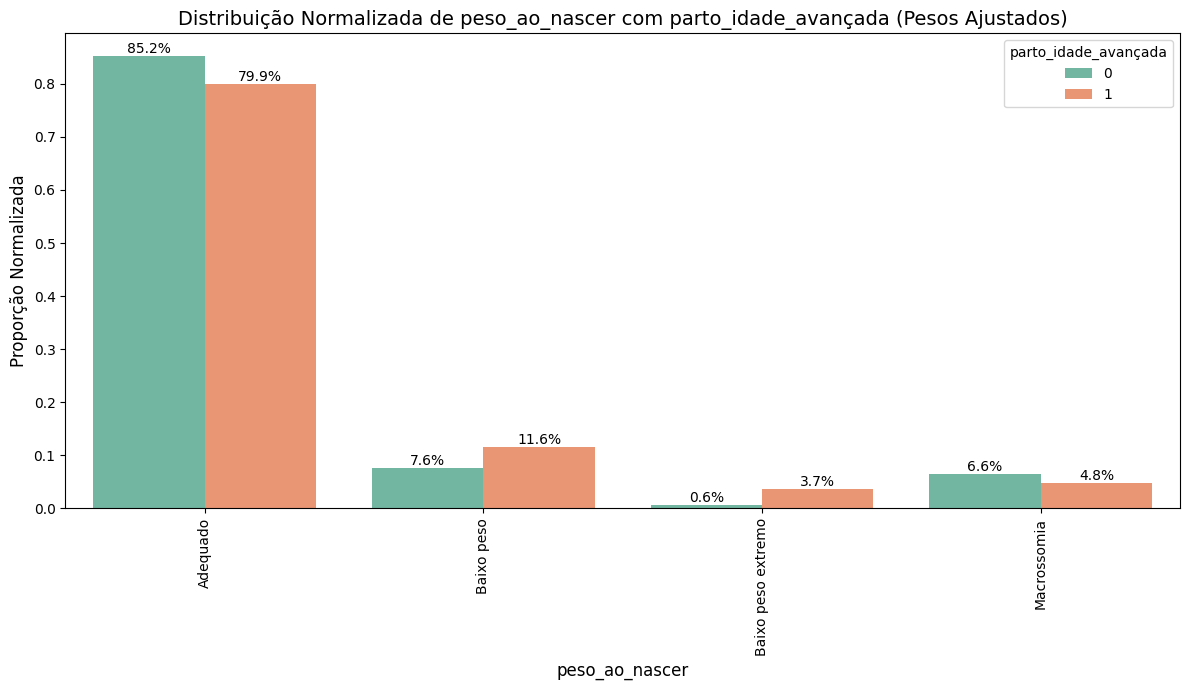

****************************************************************************************************


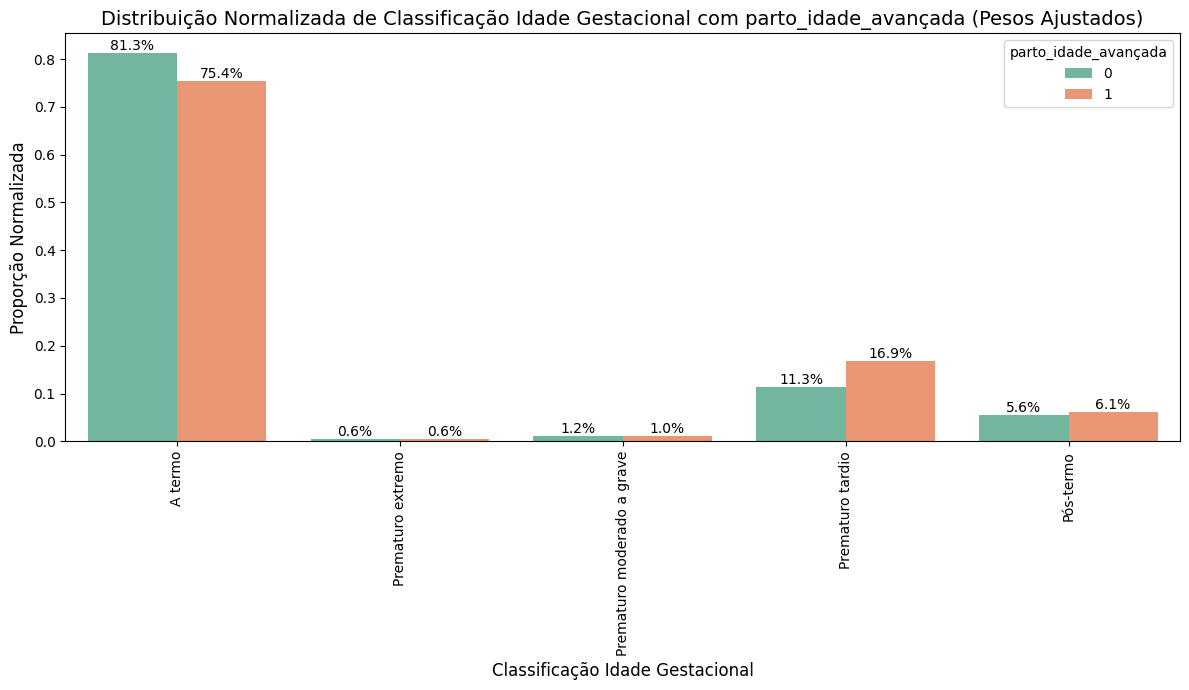

****************************************************************************************************


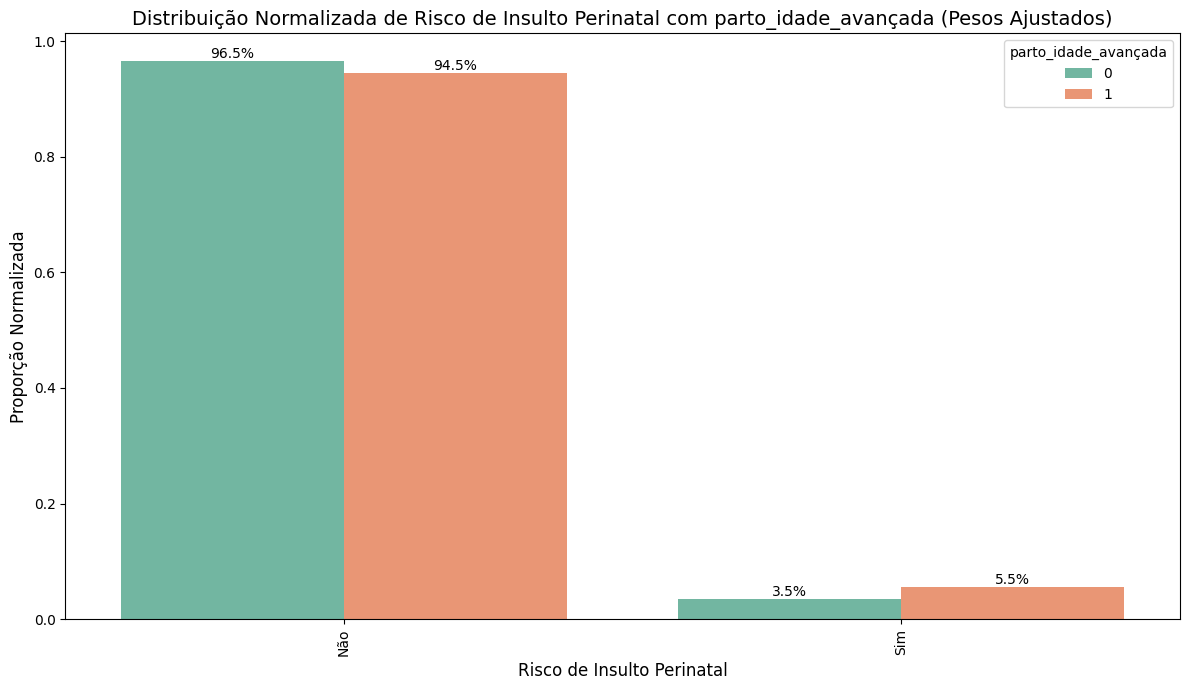

****************************************************************************************************


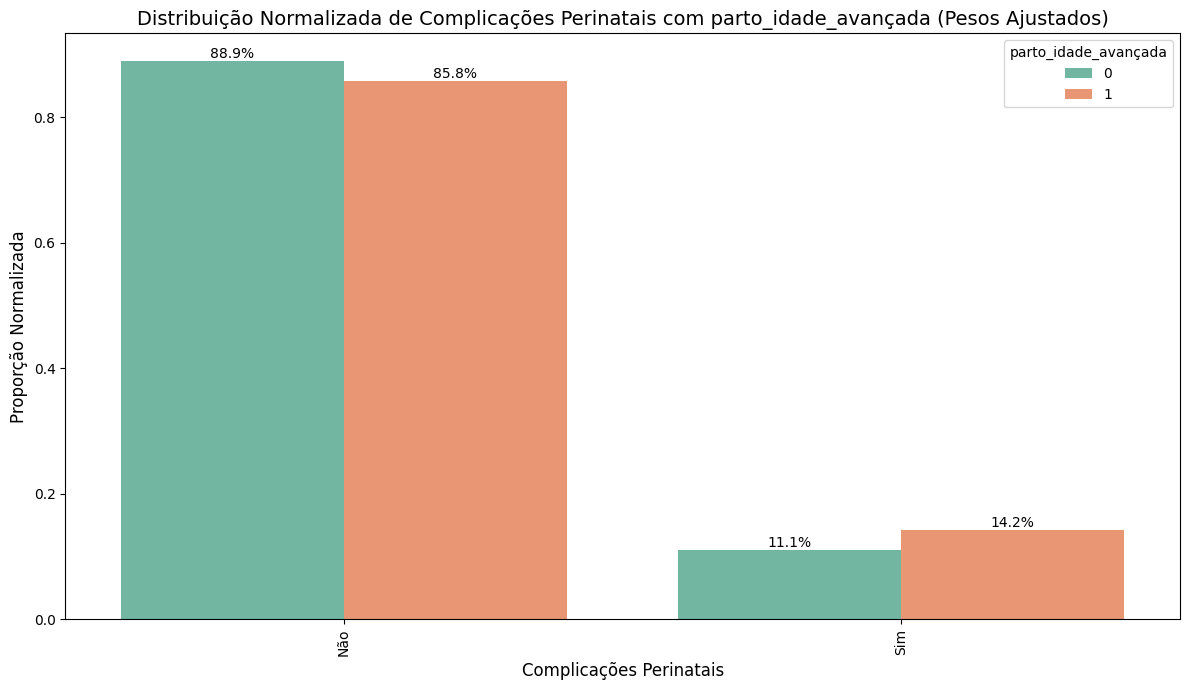

****************************************************************************************************


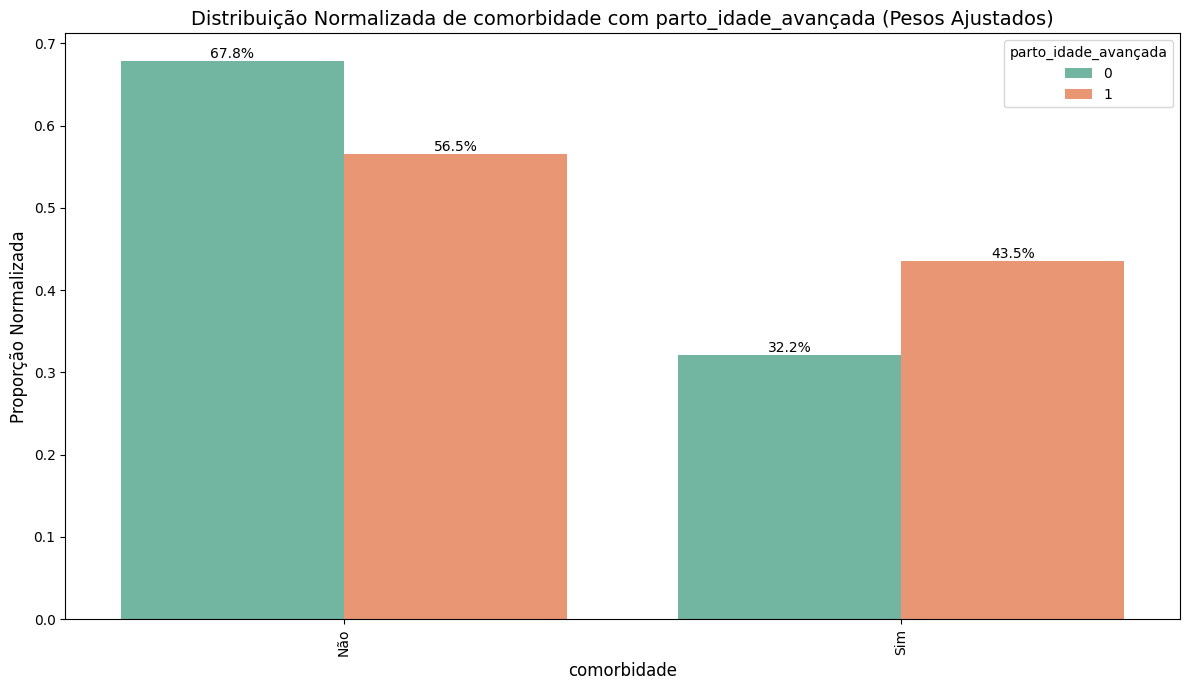

****************************************************************************************************


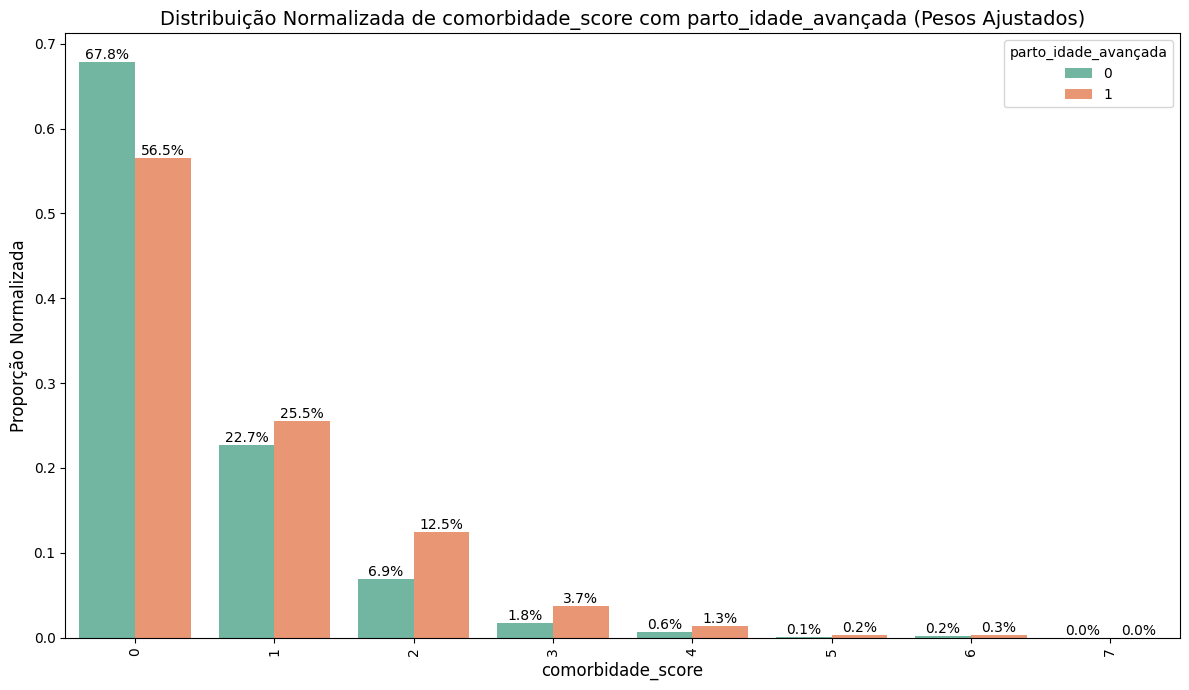

****************************************************************************************************


In [27]:
for col in colunas_interesse:
    if col in dicionario_variaveis:  # Verificar se `col` está no dicionário
        print(f" {dicionario_variaveis[col]}")
    if col in dicionario_valores:  # Verificar se `col` está no dicionário
        print(f"{dicionario_valores[col]}")
    plot_with_weights_and_normalization(df_grupo_maes, col, 'parto_idade_avançada')
    print("*"*100)


# OlD

## Grupo de Maes

UF_sigla


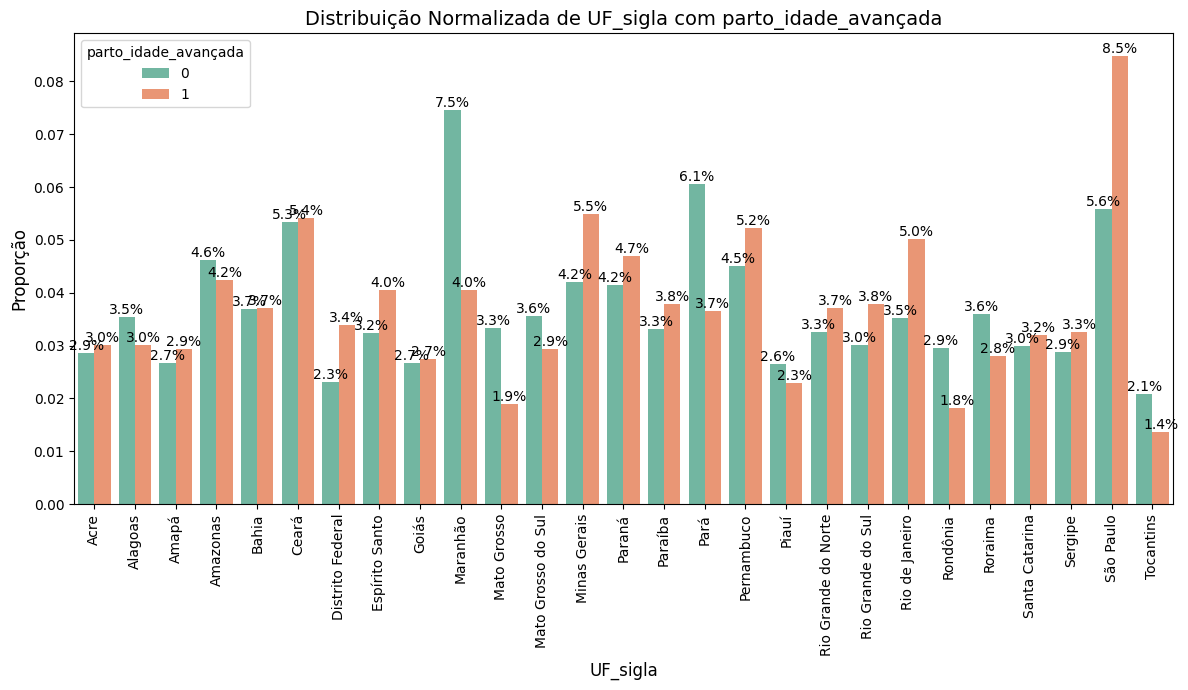

regiao_brasileira


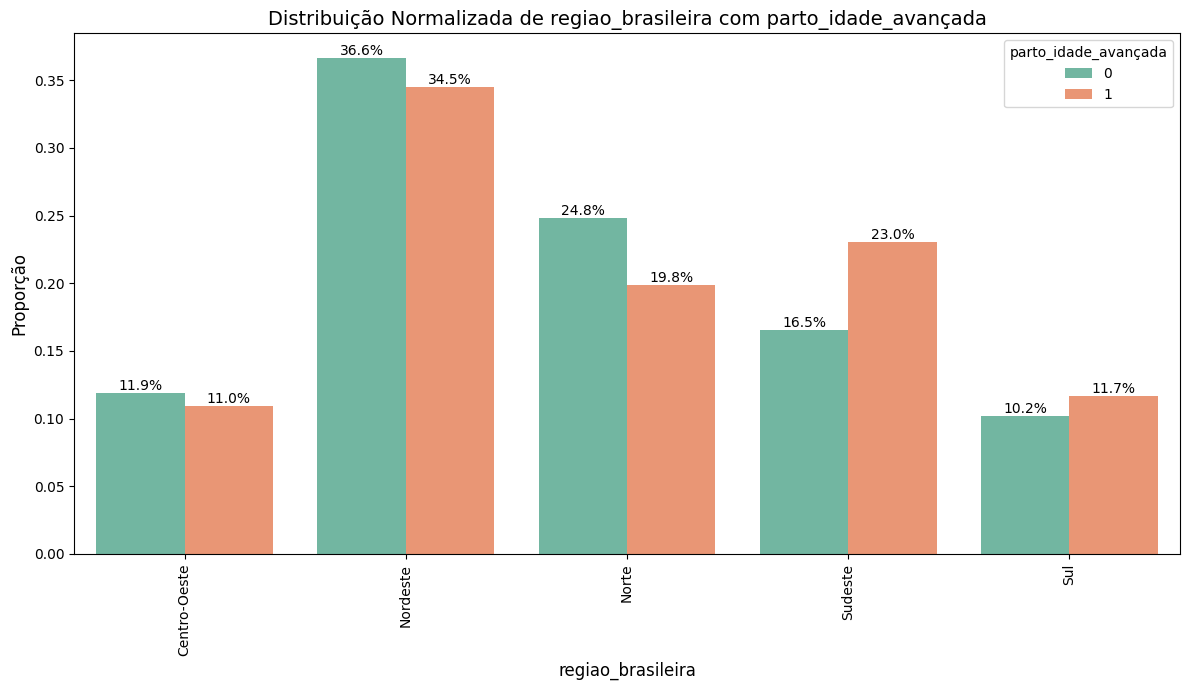

regiao_metropolitana


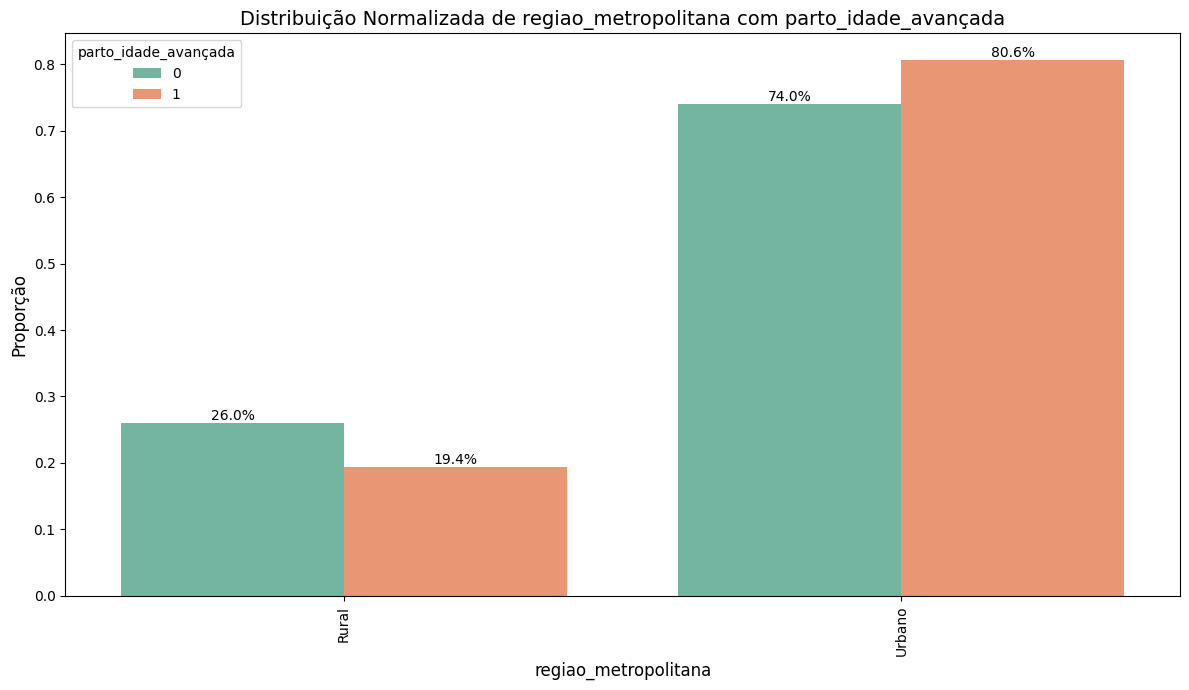

sexo


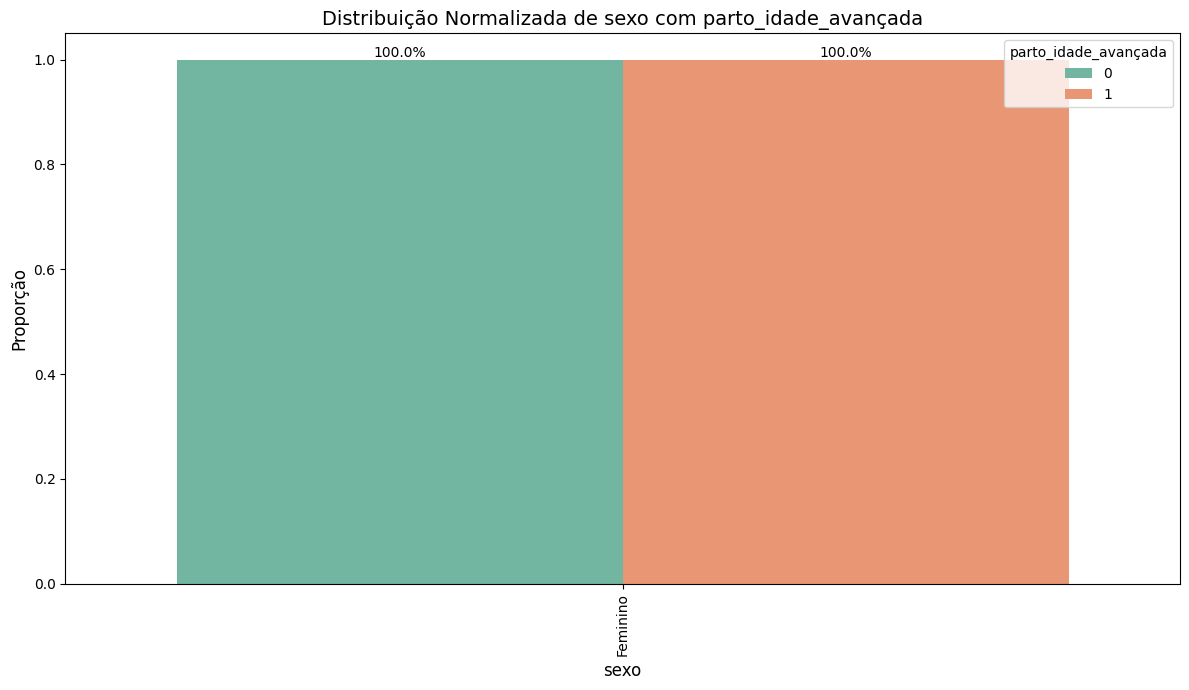

idade


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


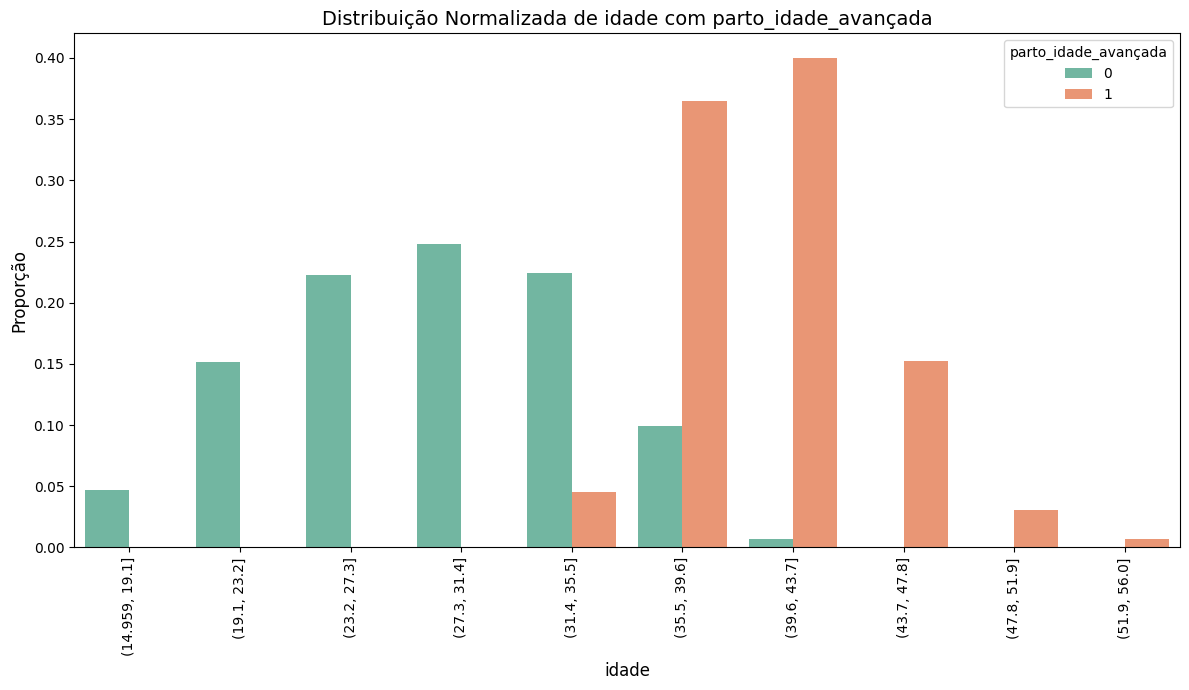

imc_classificacao


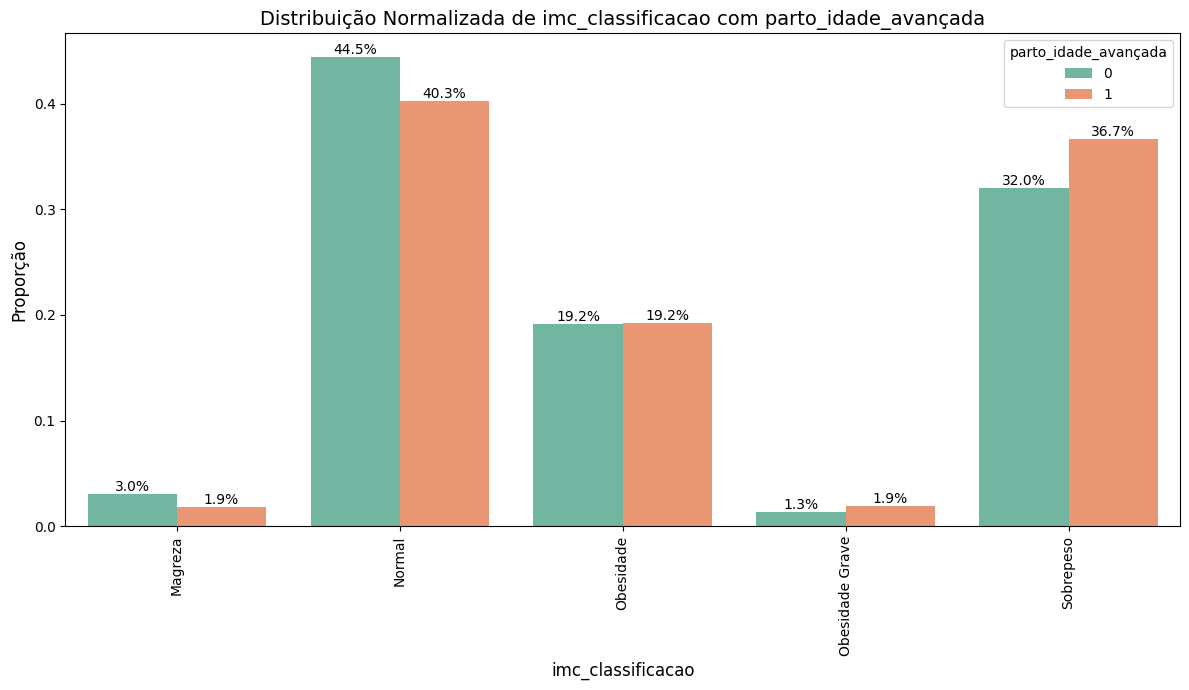

imc_grau_obesidade


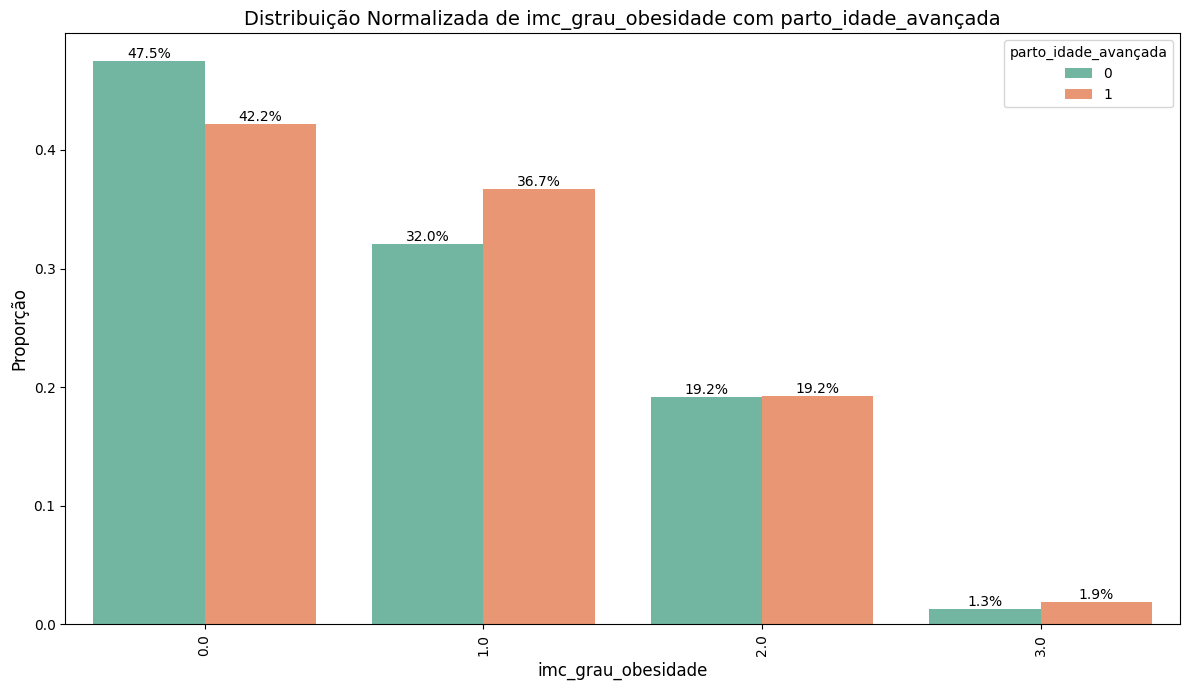

D00201


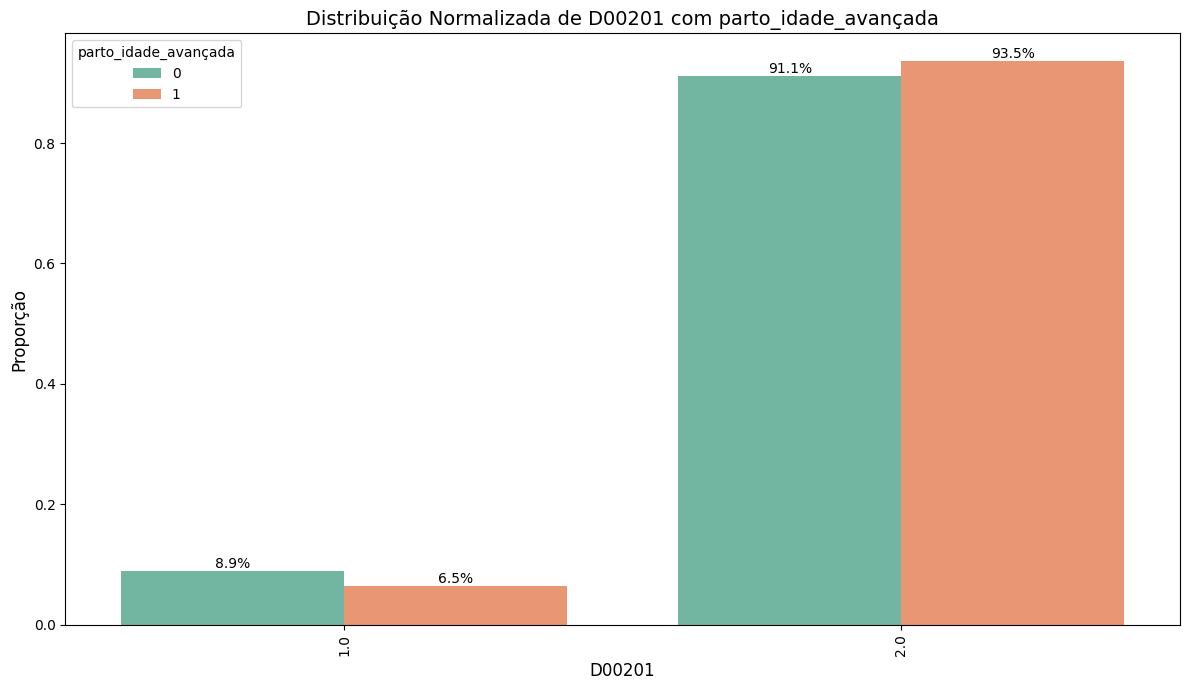

D00901


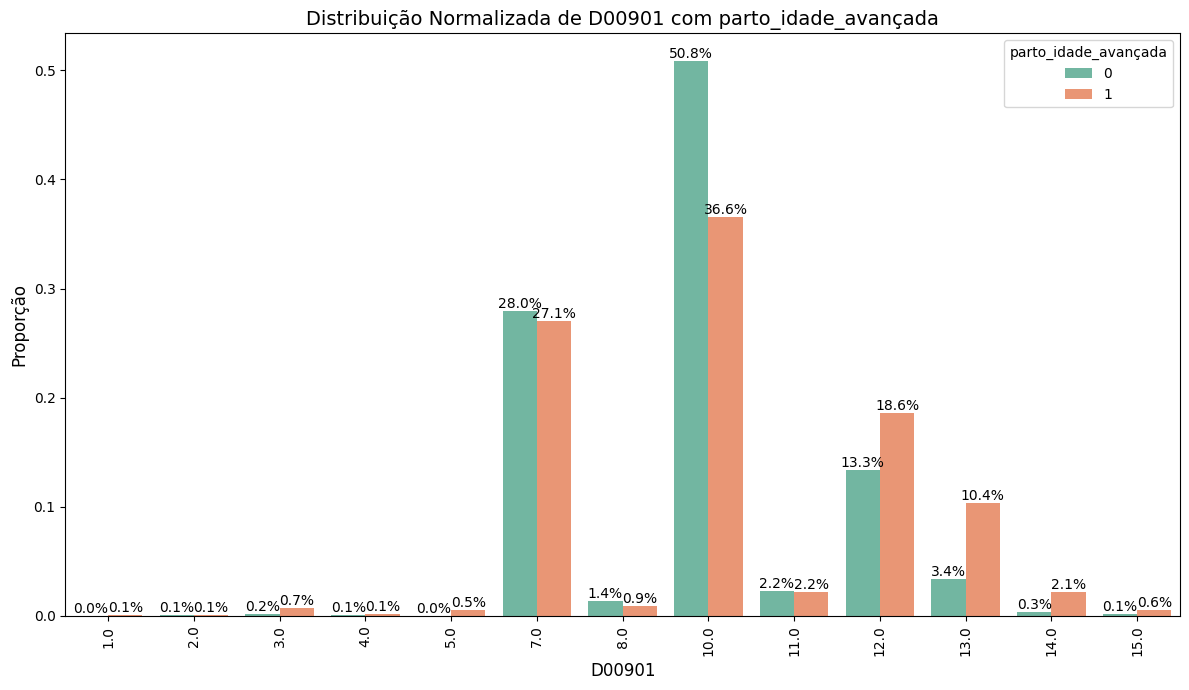

Q06307


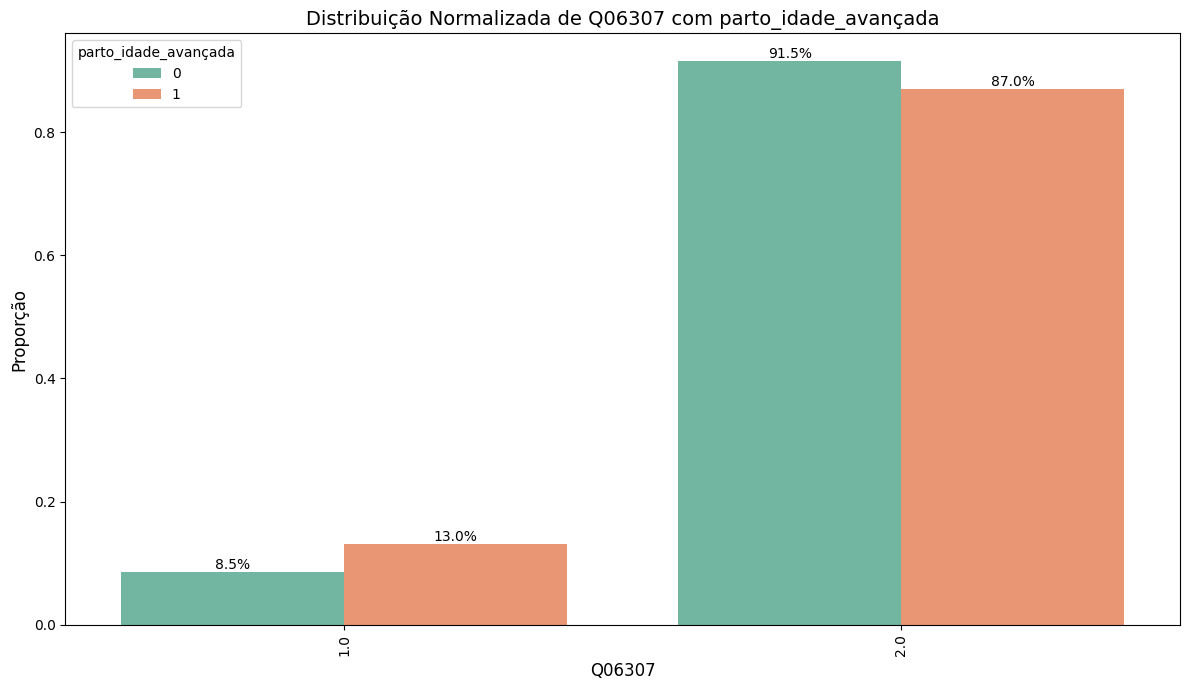

Q06308


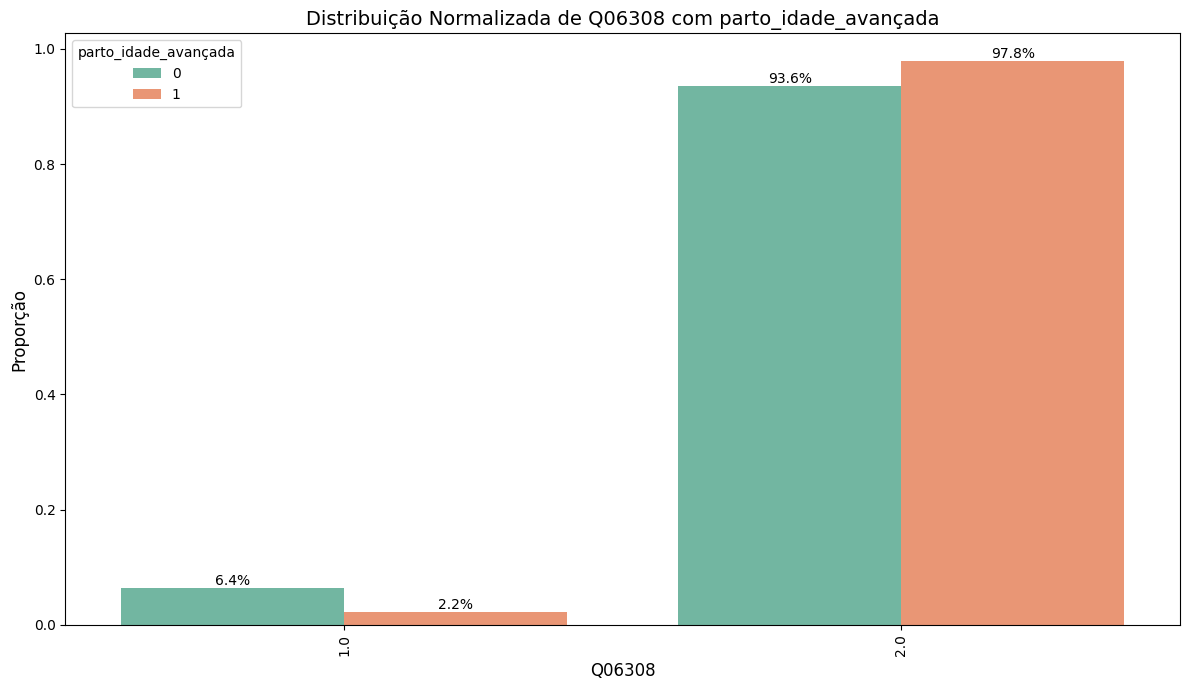

Q06309


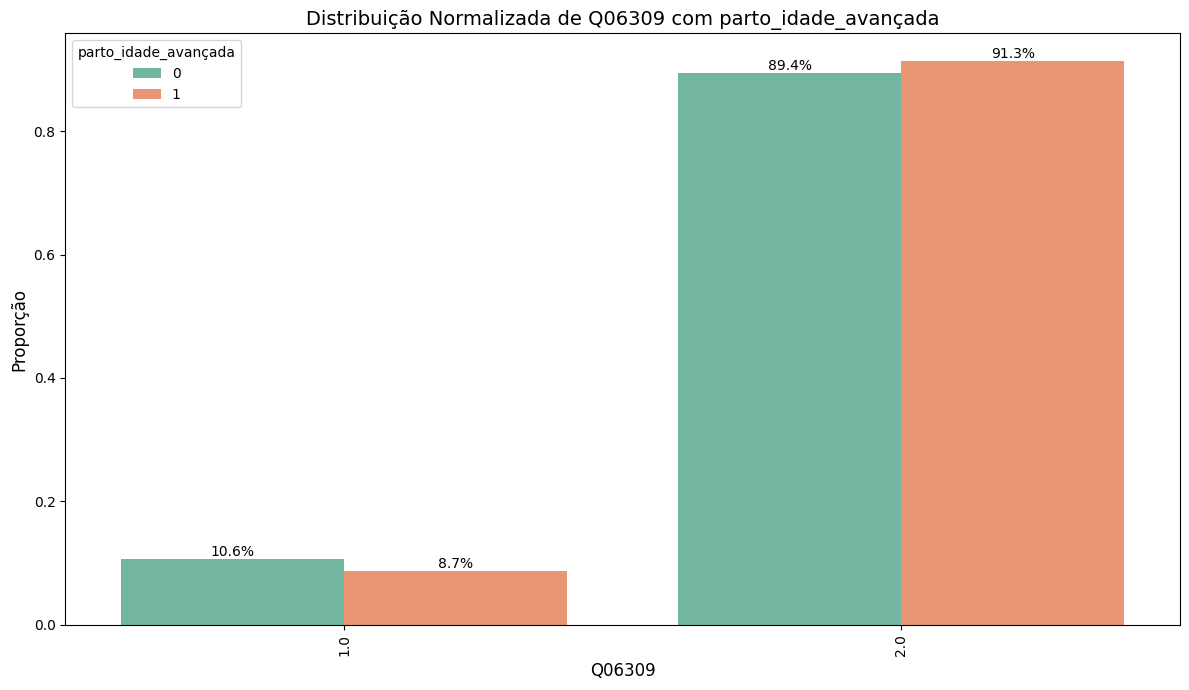

Q06310


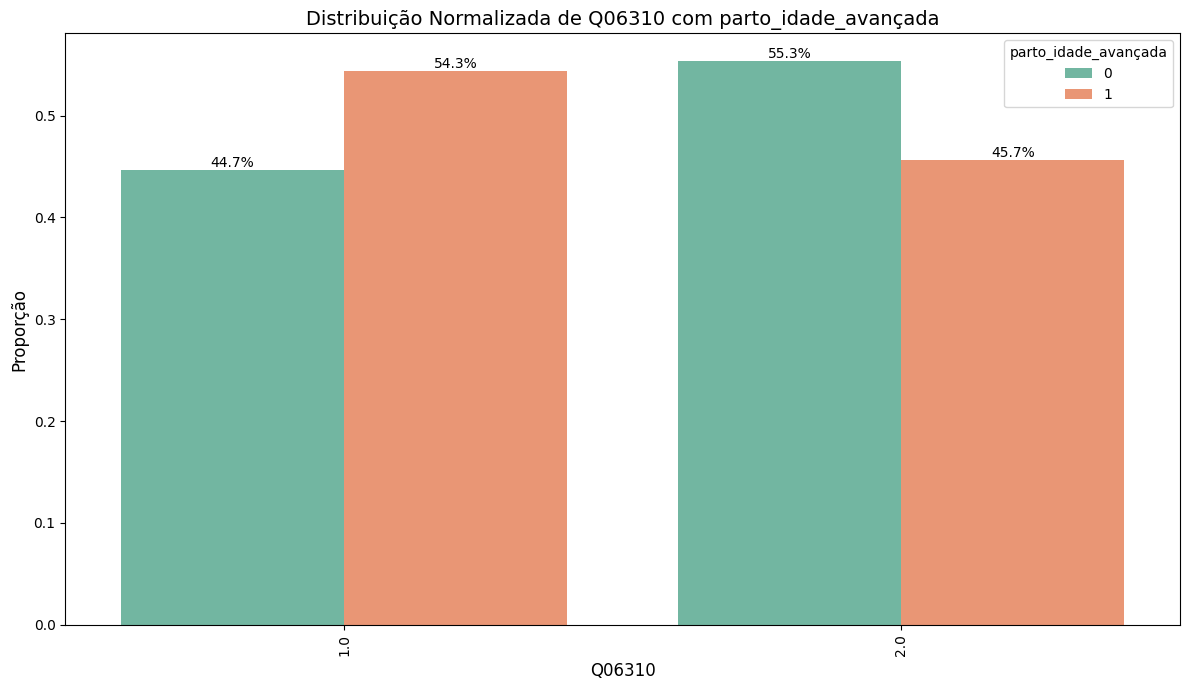

R037


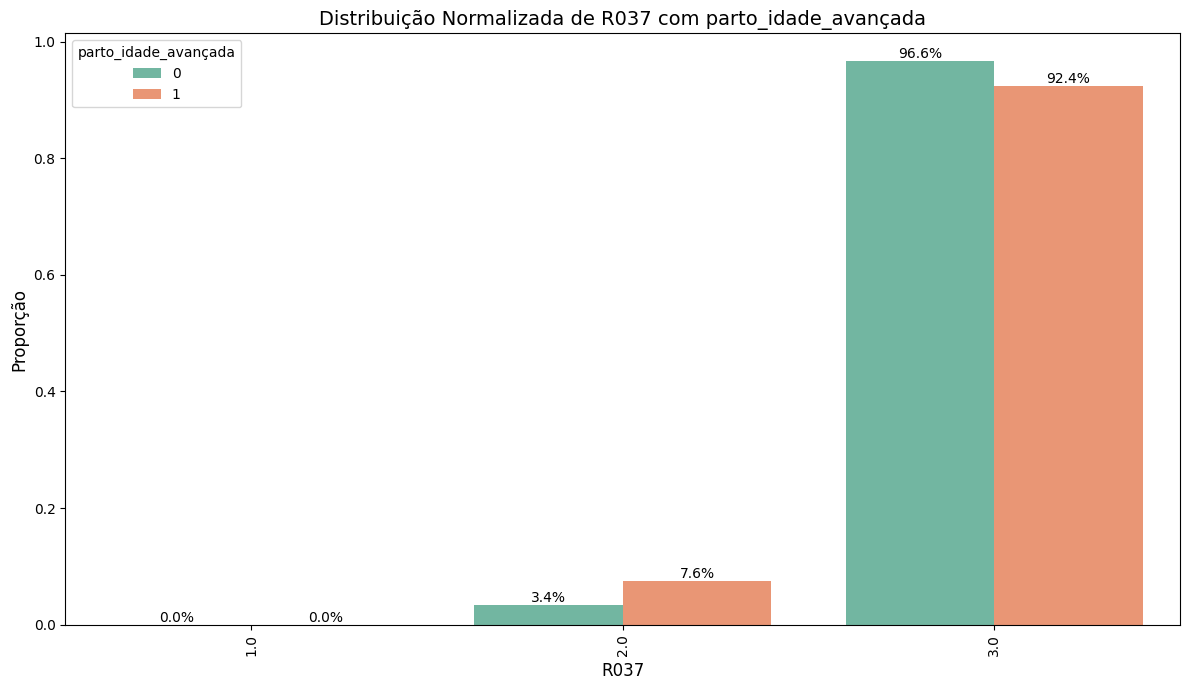

S065


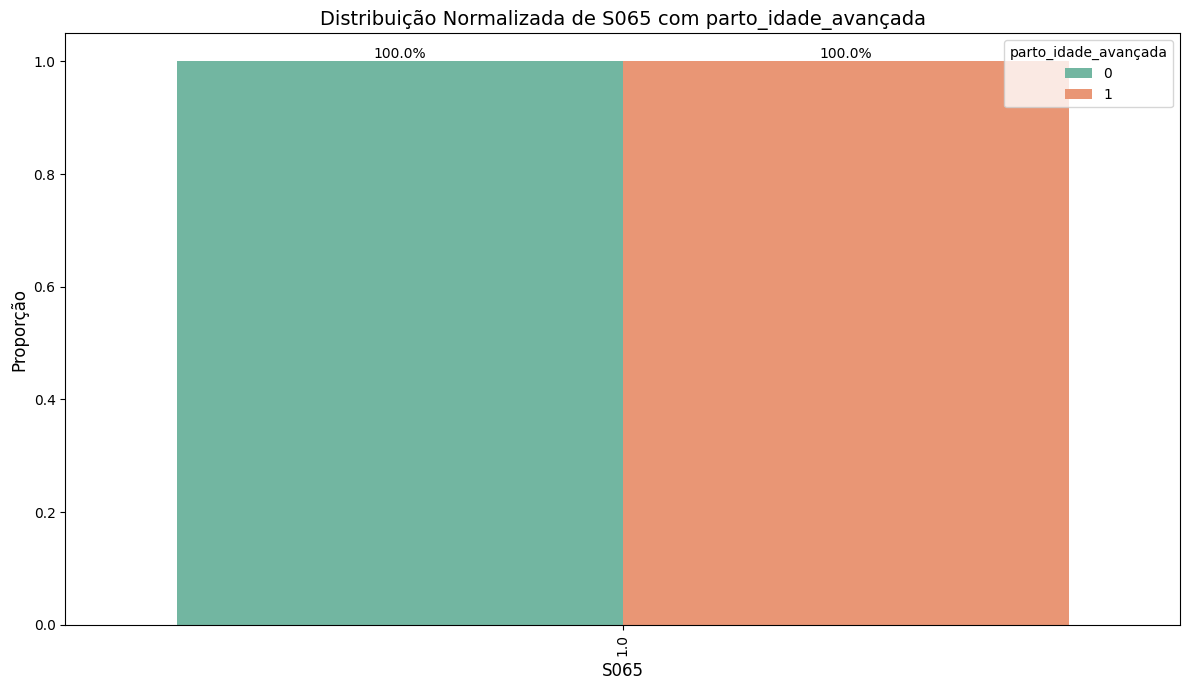

S066


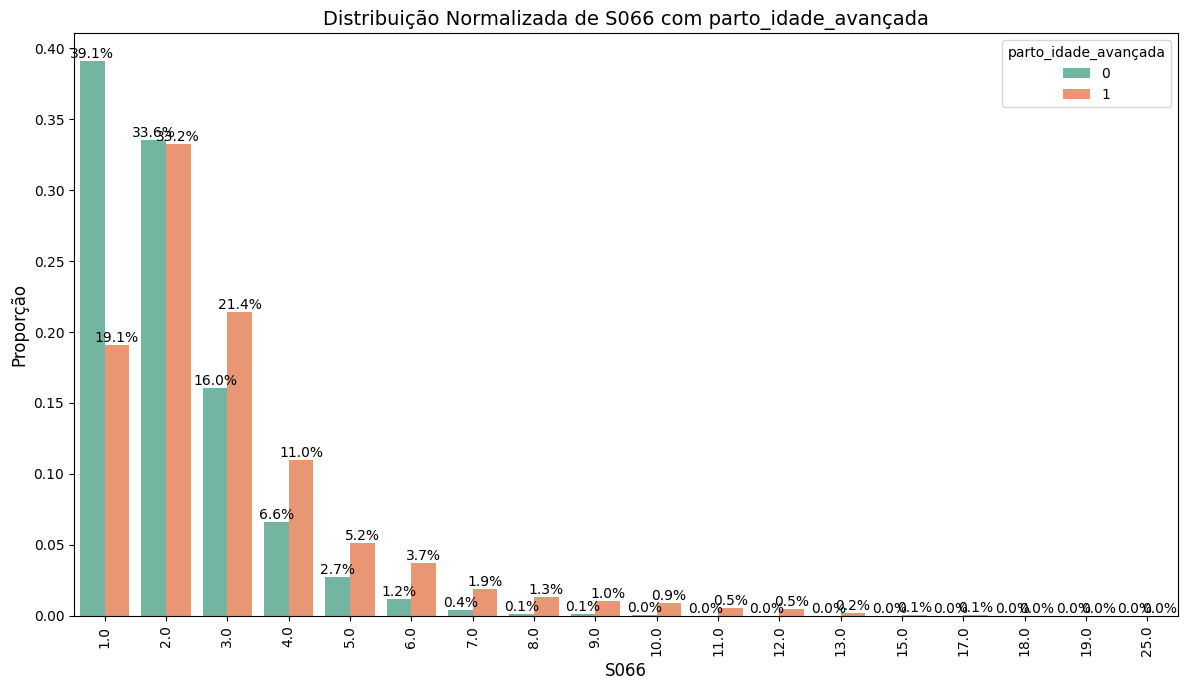

S115


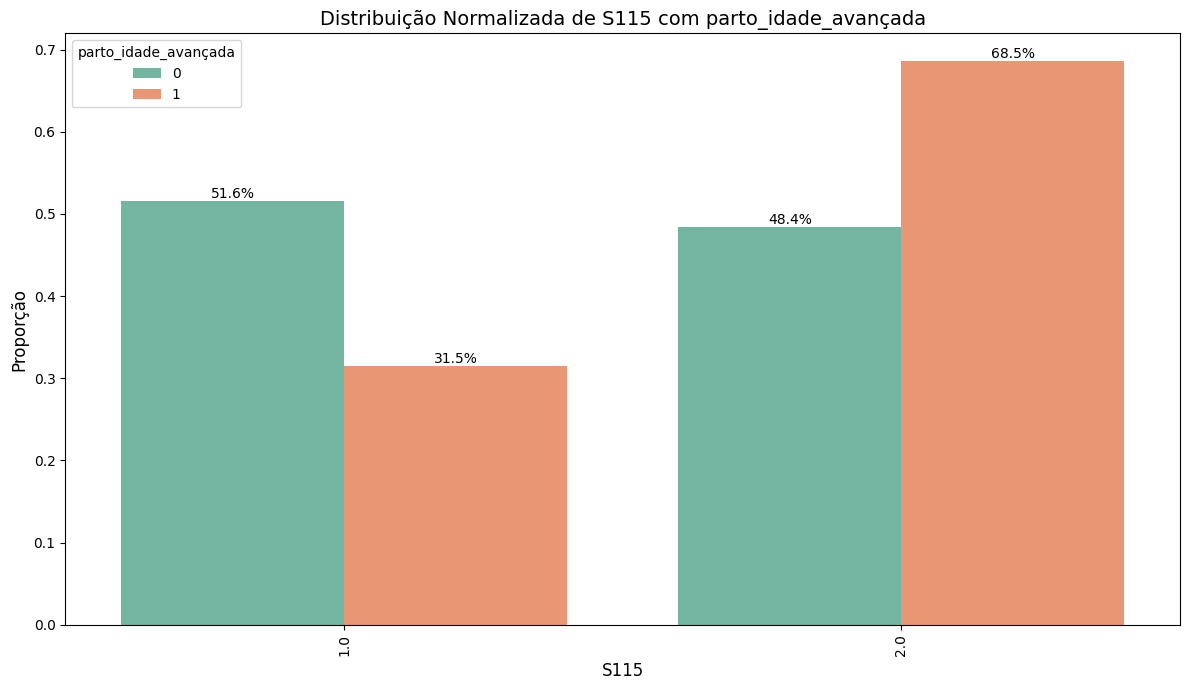

S126


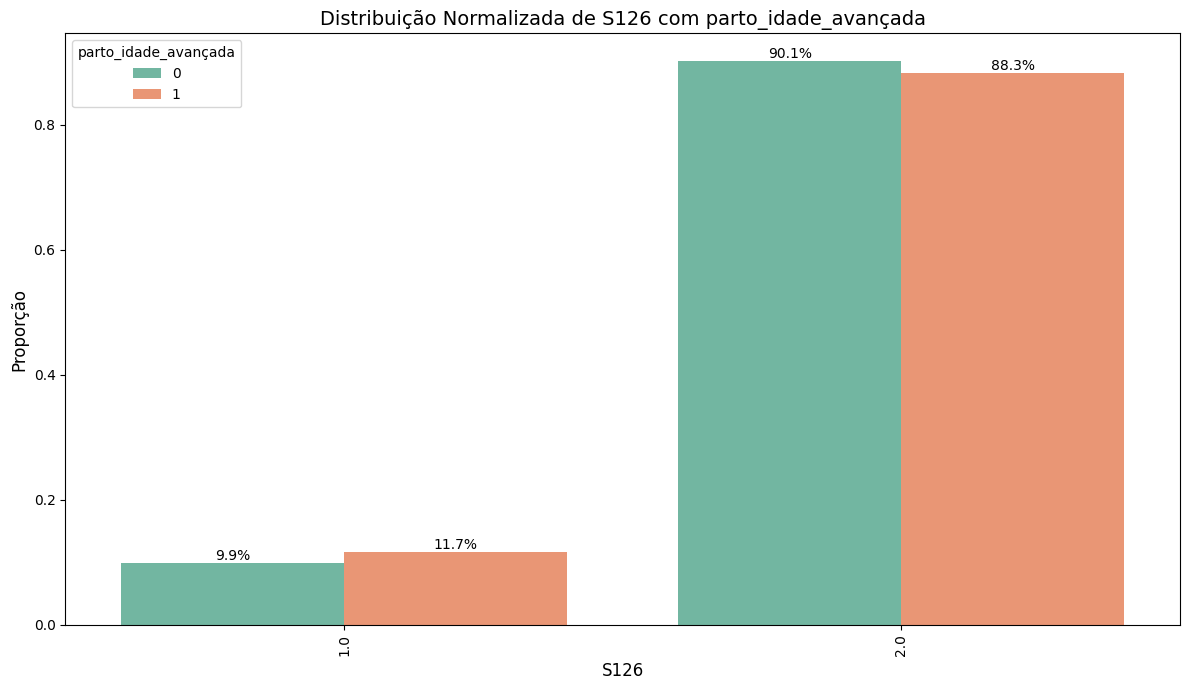

S11001


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


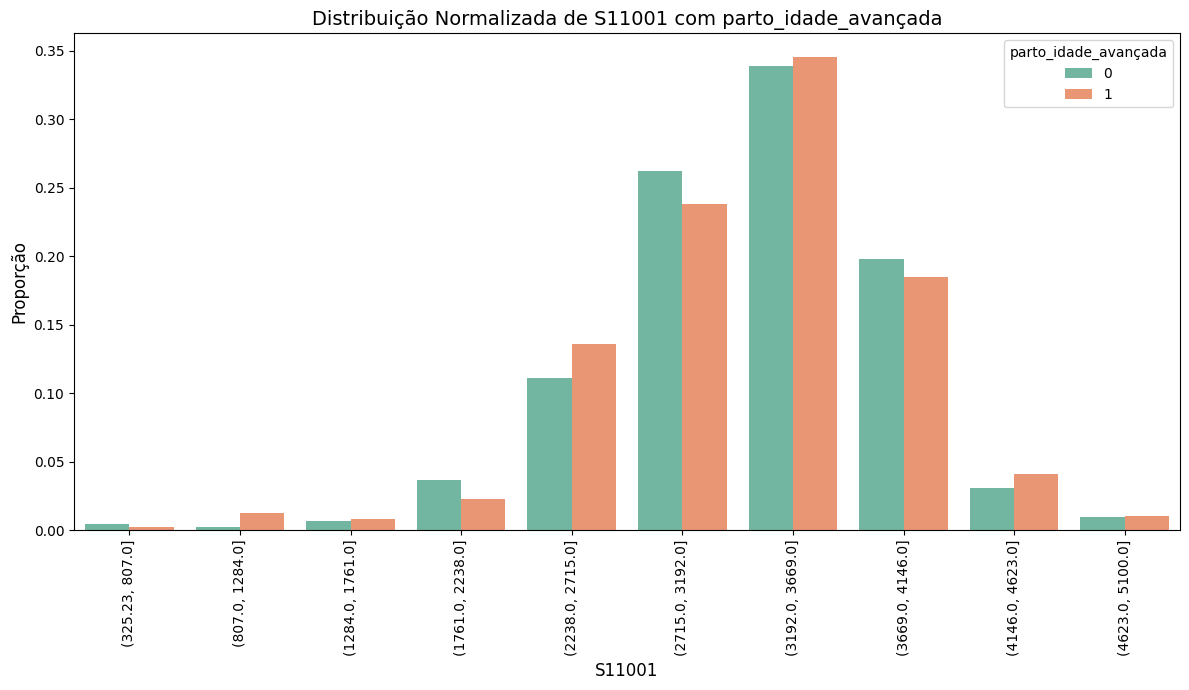

S11801


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


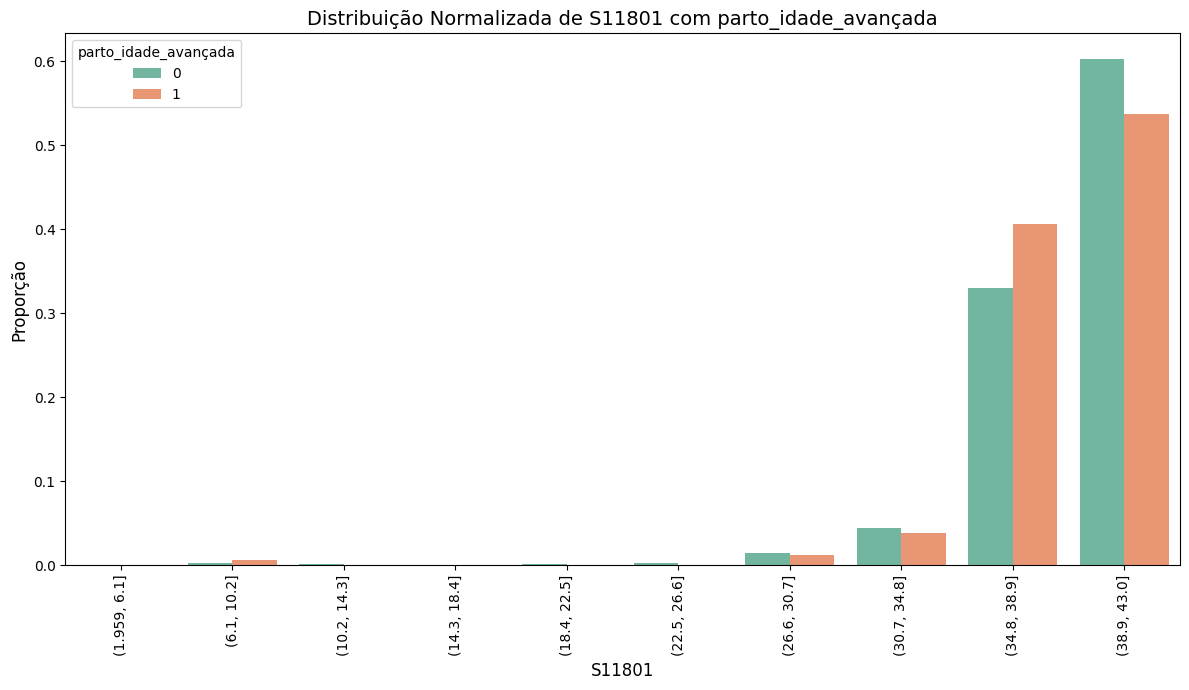

S131


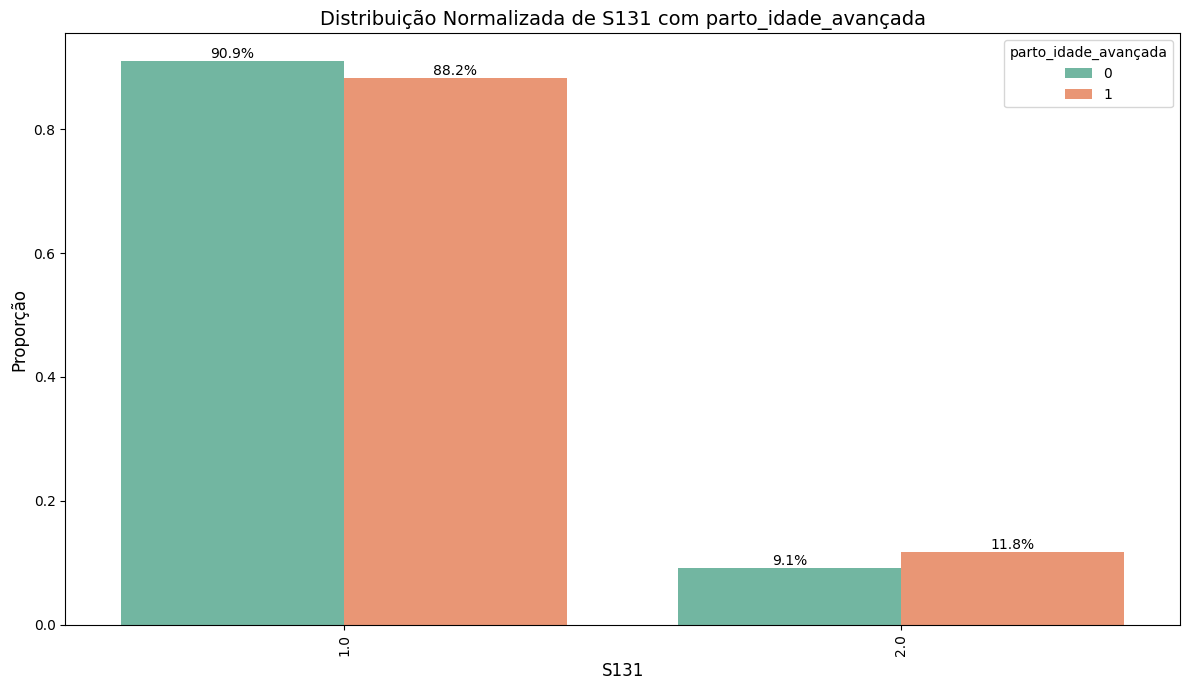

S132


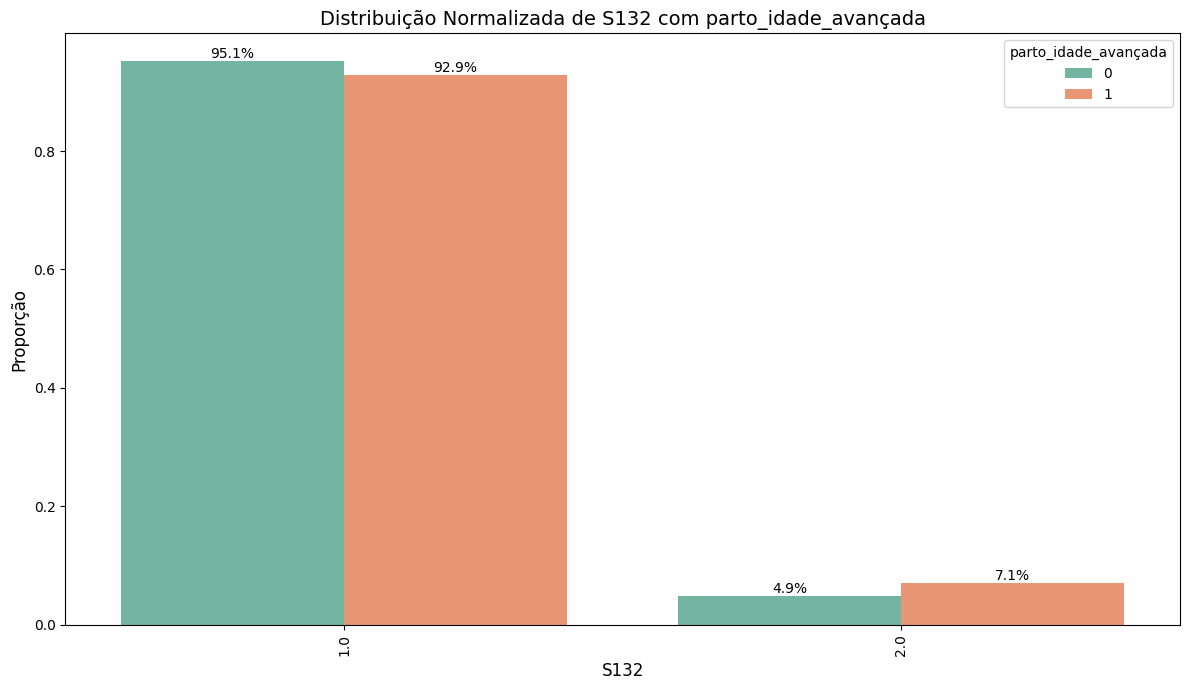

idade_ultimo_parto


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


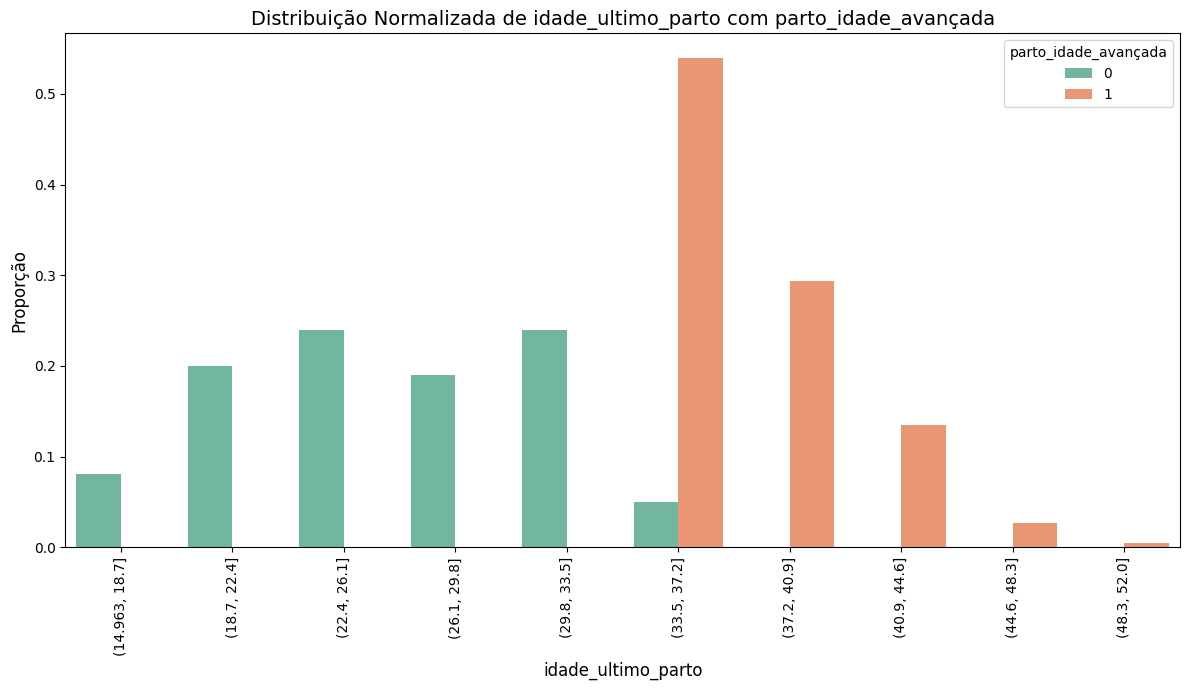

idade_ultimo_parto_2


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\811802865.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


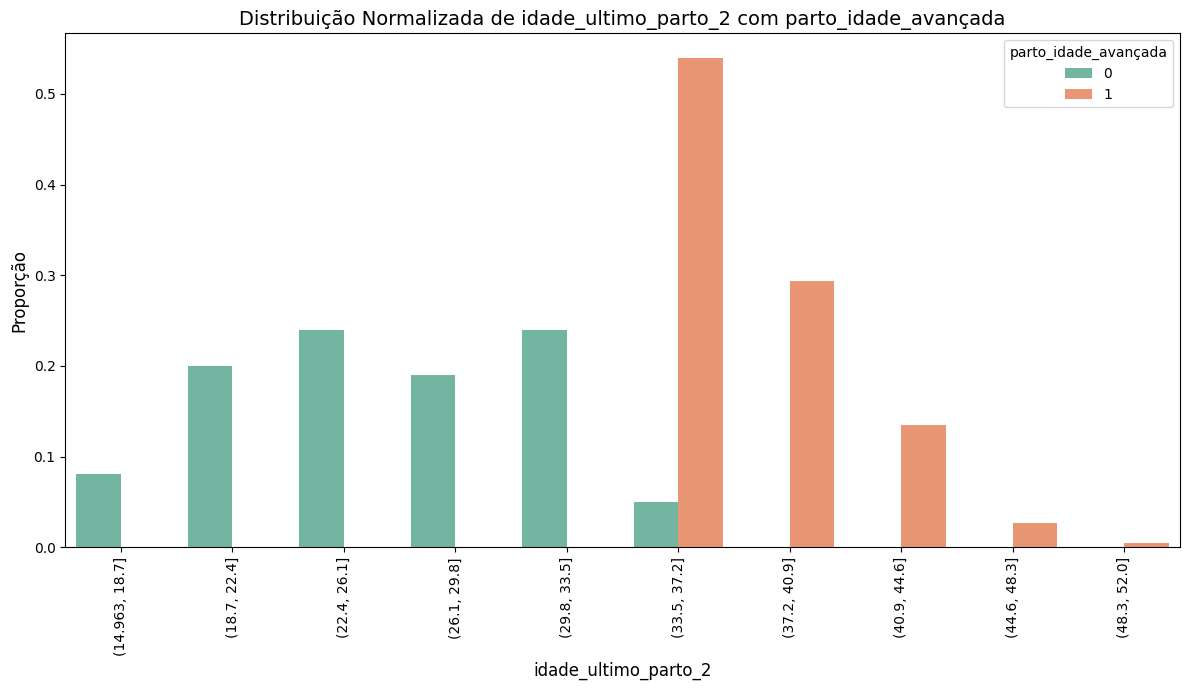

In [95]:

for col in cols:
    print(col)
    plot_with_hue_normalized(df_grupo_maes, col, 'parto_idade_avançada')

## Grupo de Crianças

V0001


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


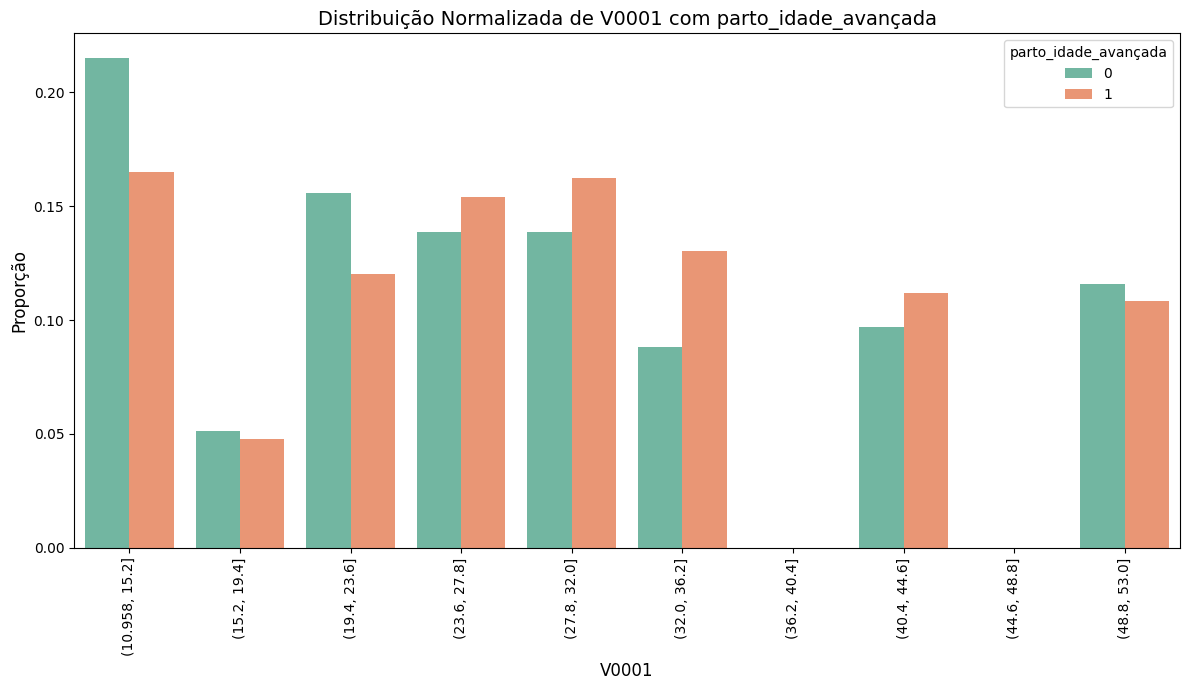

V0024


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


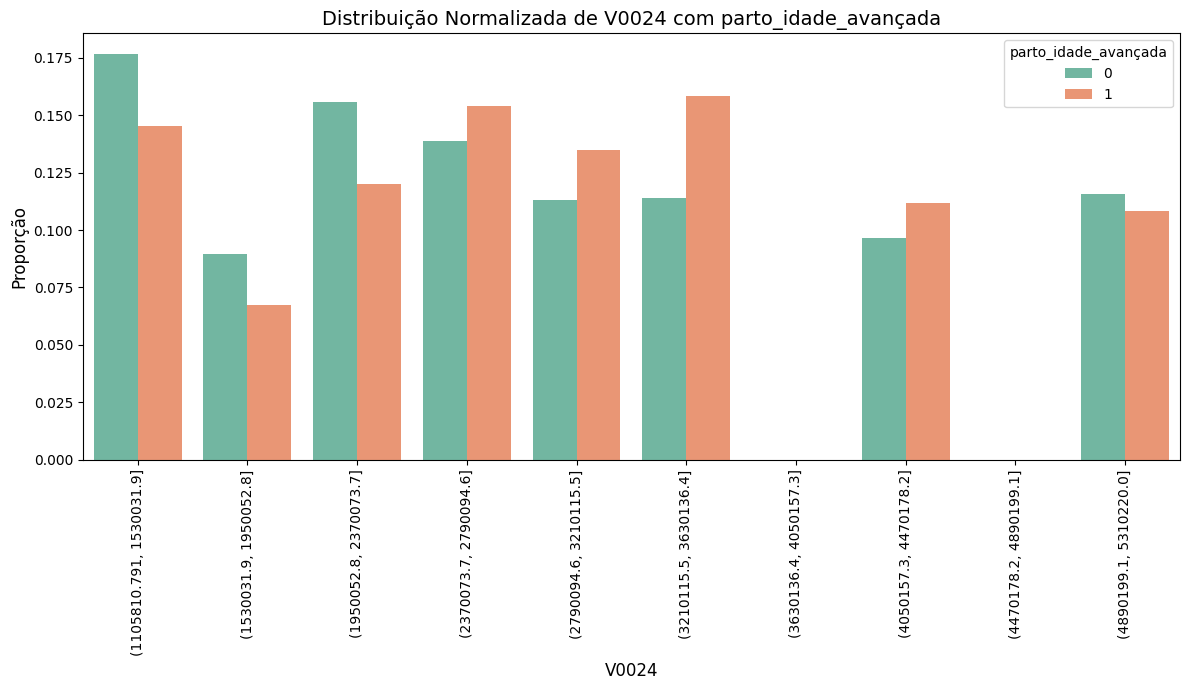

UPA_PNS


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


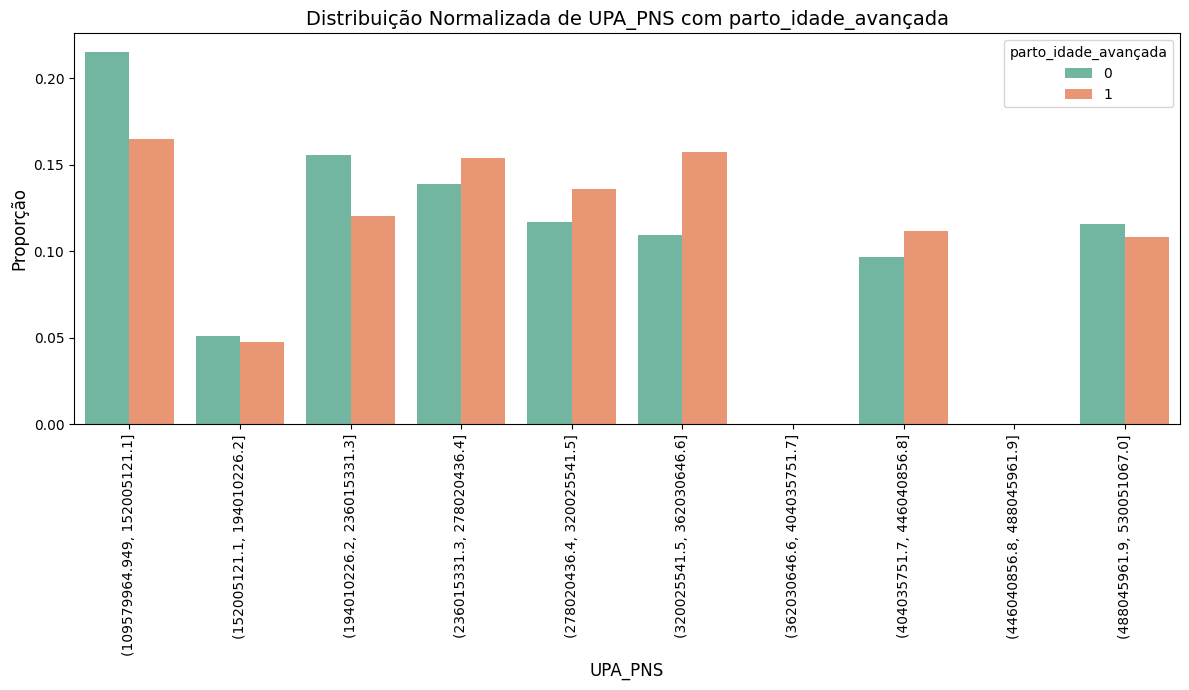

V0006_PNS


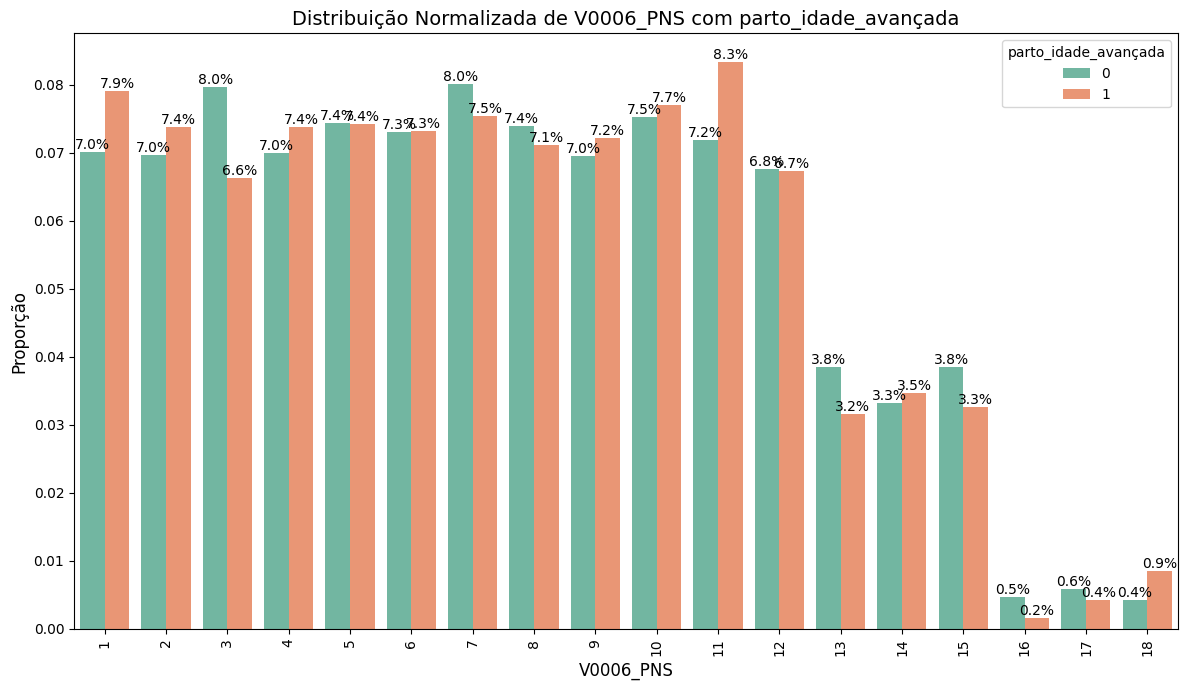

C00301


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


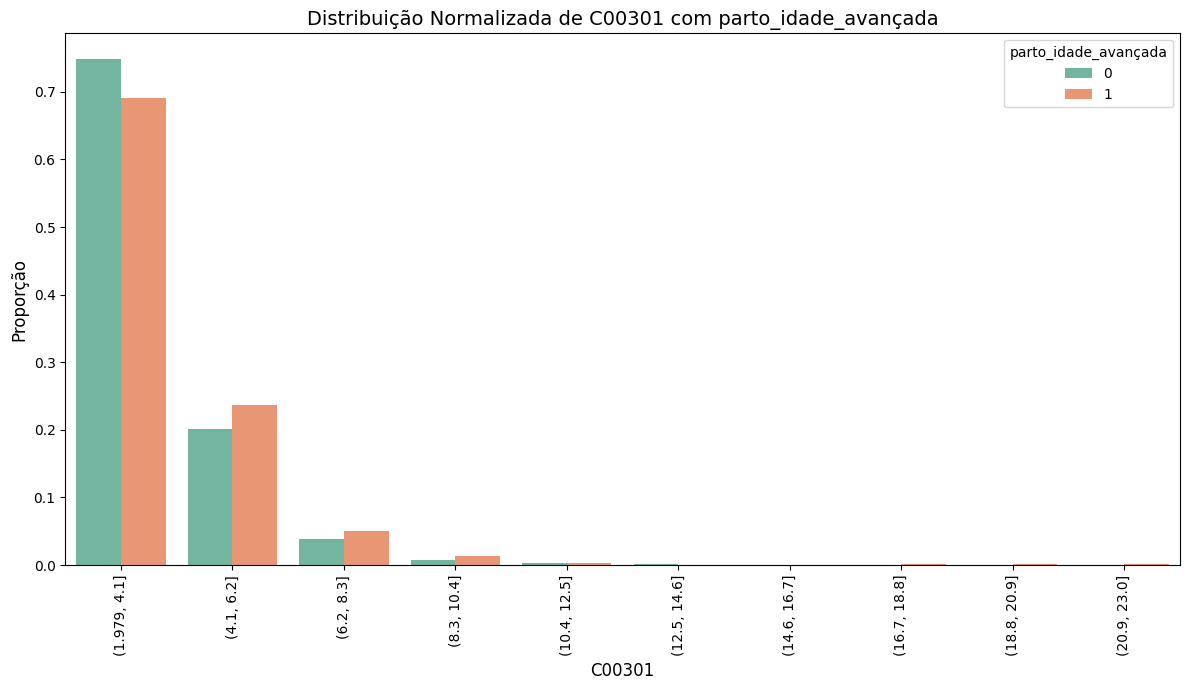

V0015


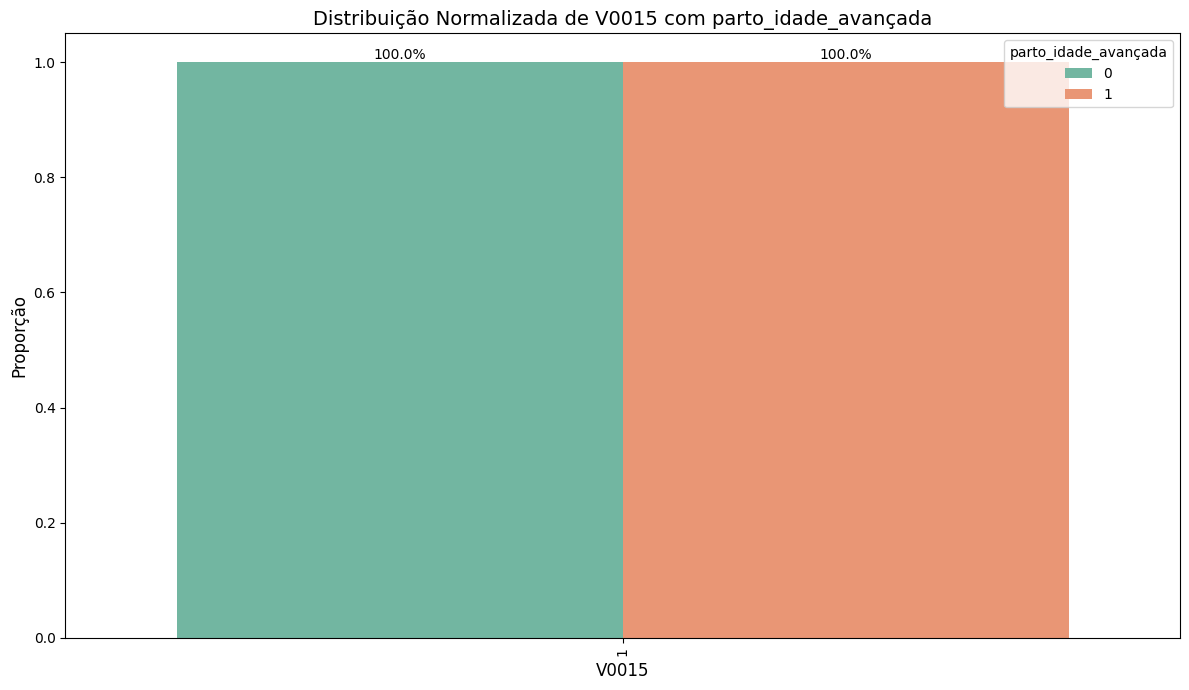

V0022


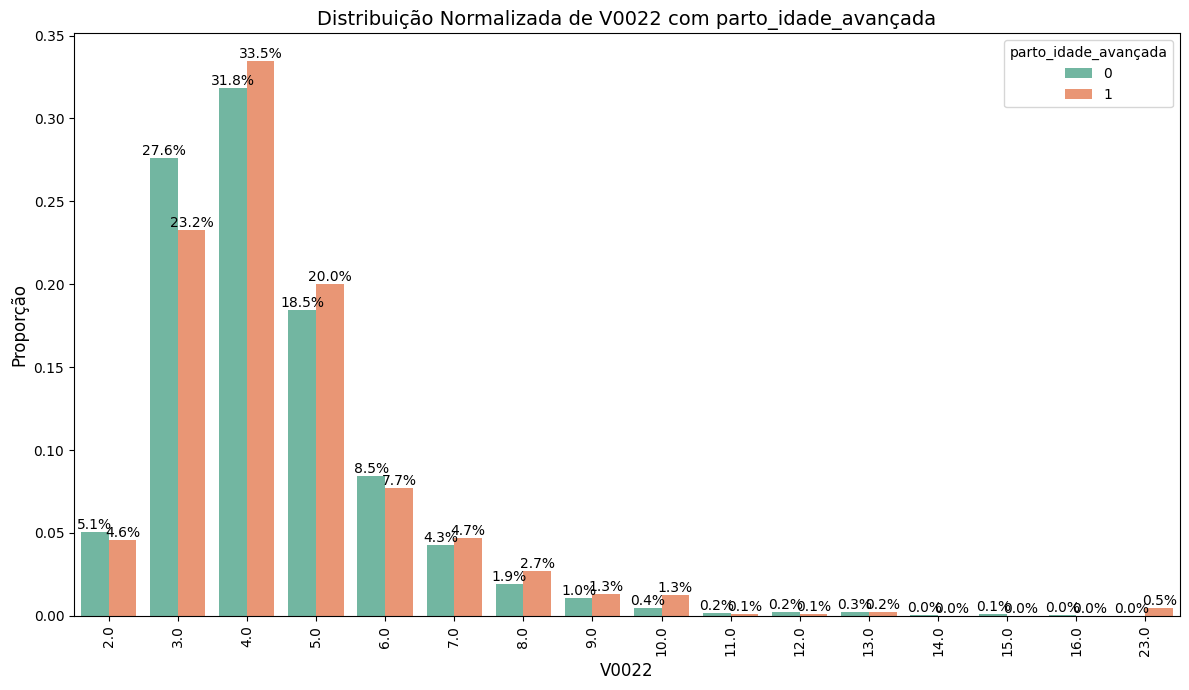

V0026


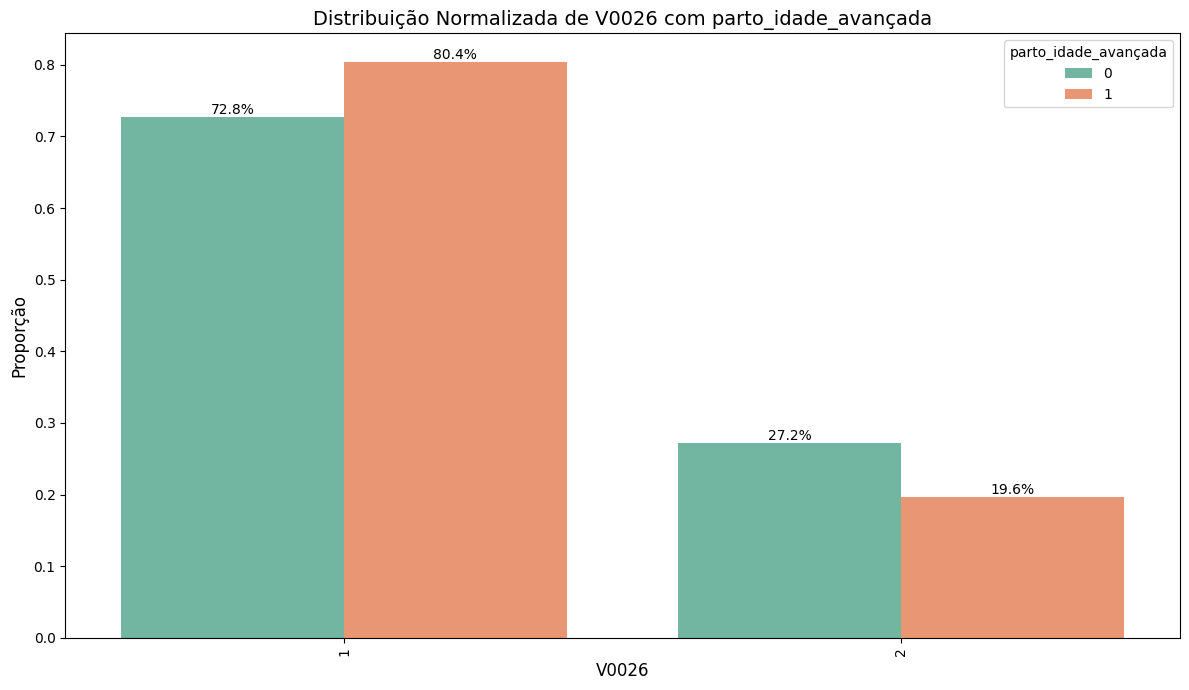

V0031


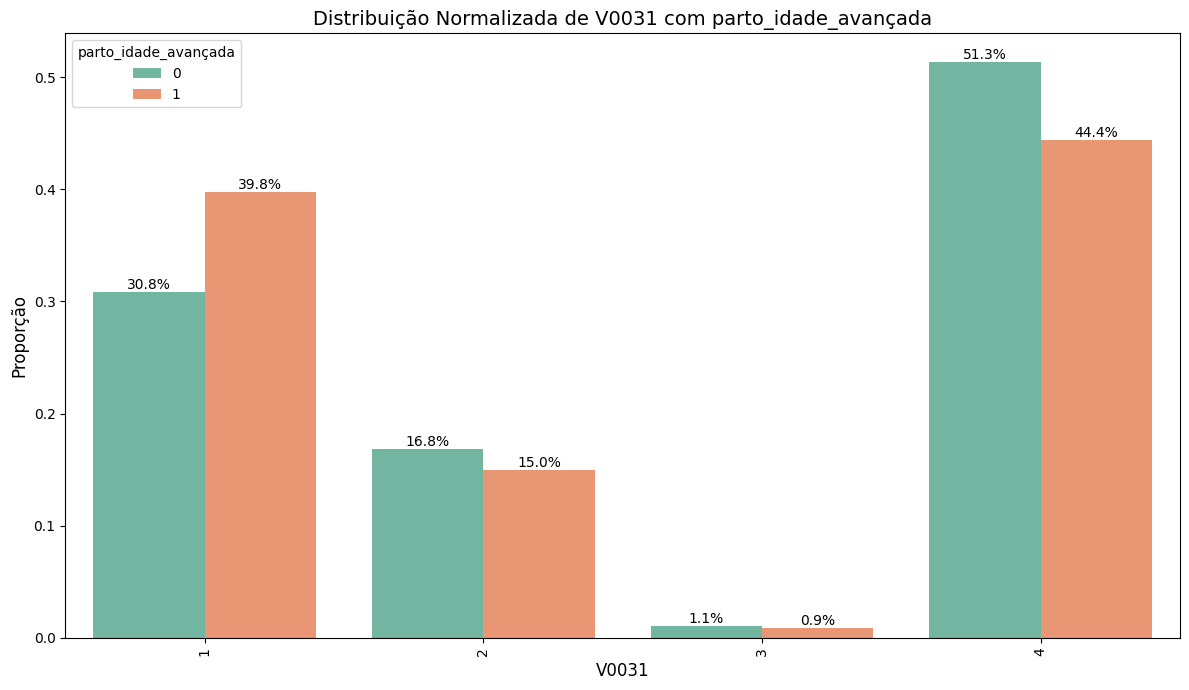

V0025A


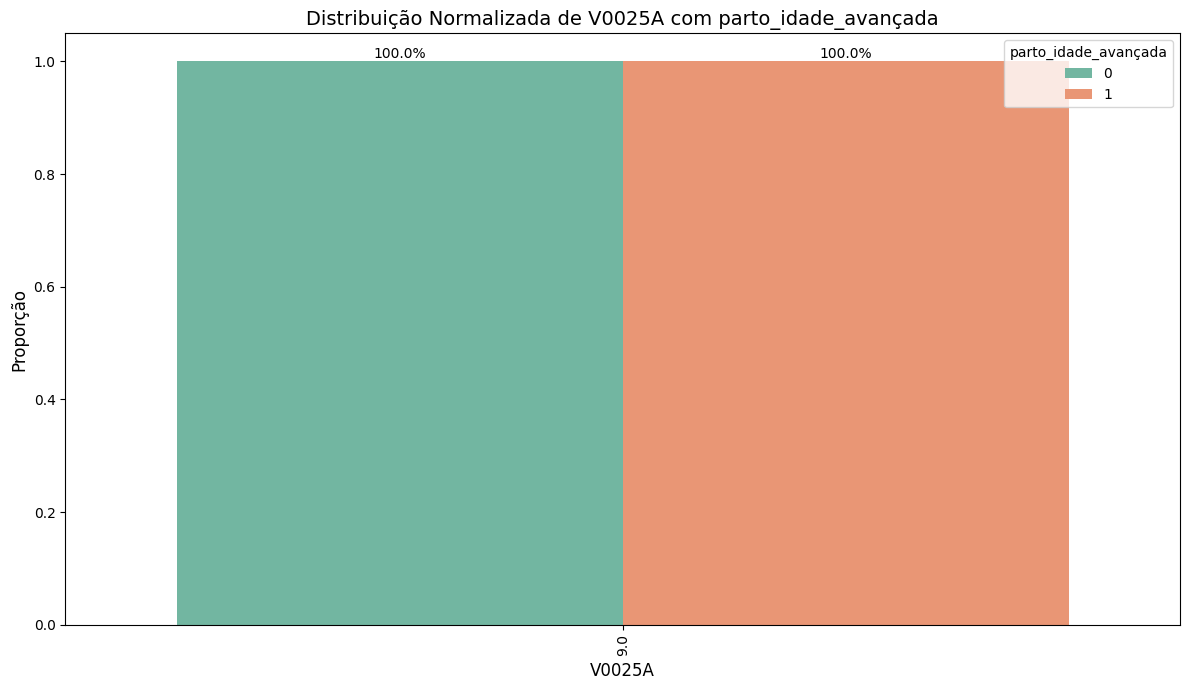

V0025B


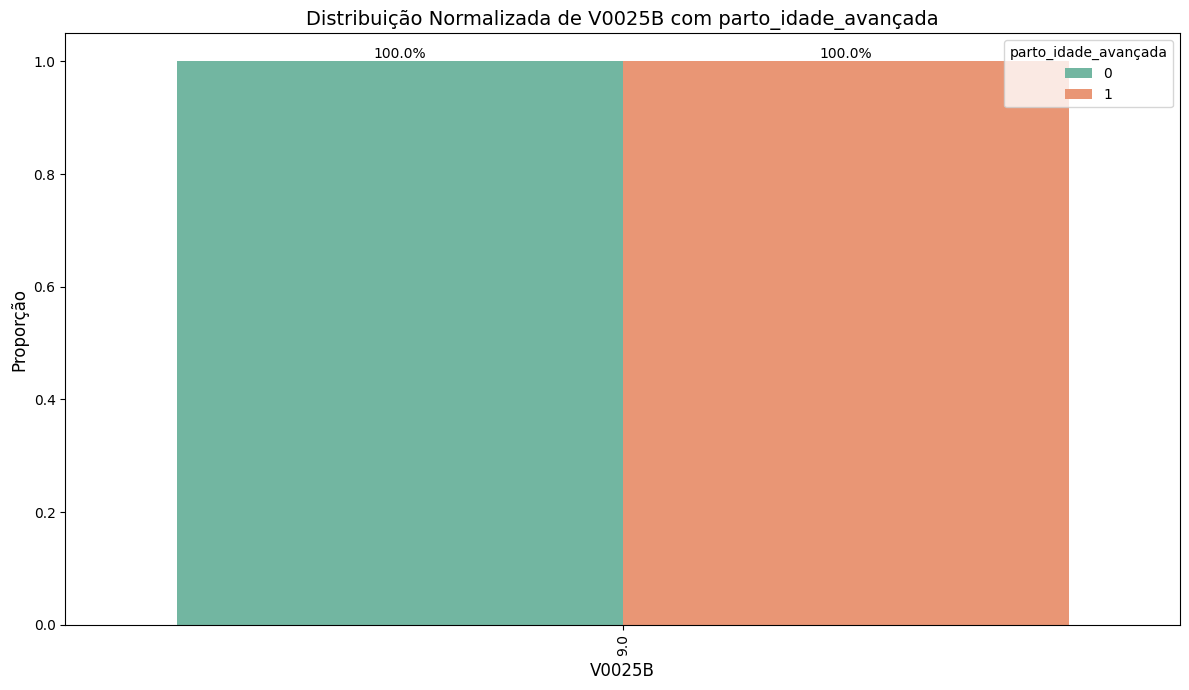

V00291
A coluna V00291 não possui dados válidos (apenas NaN). Gráfico não será gerado.
V00282


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


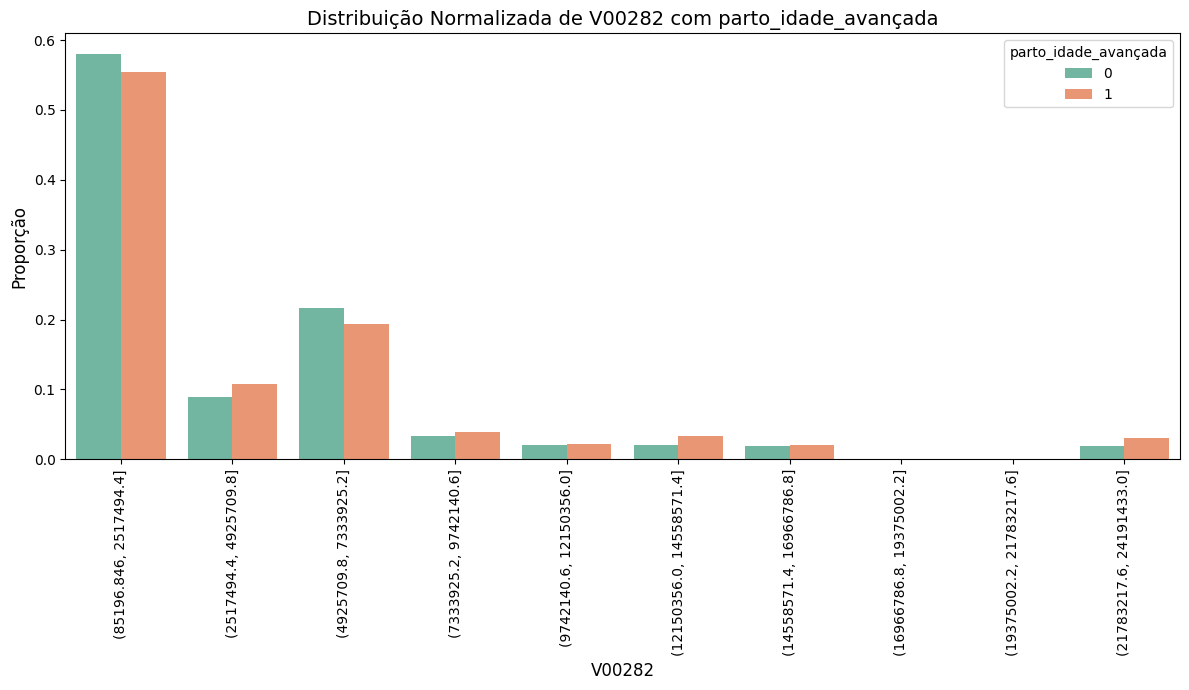

V00283


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


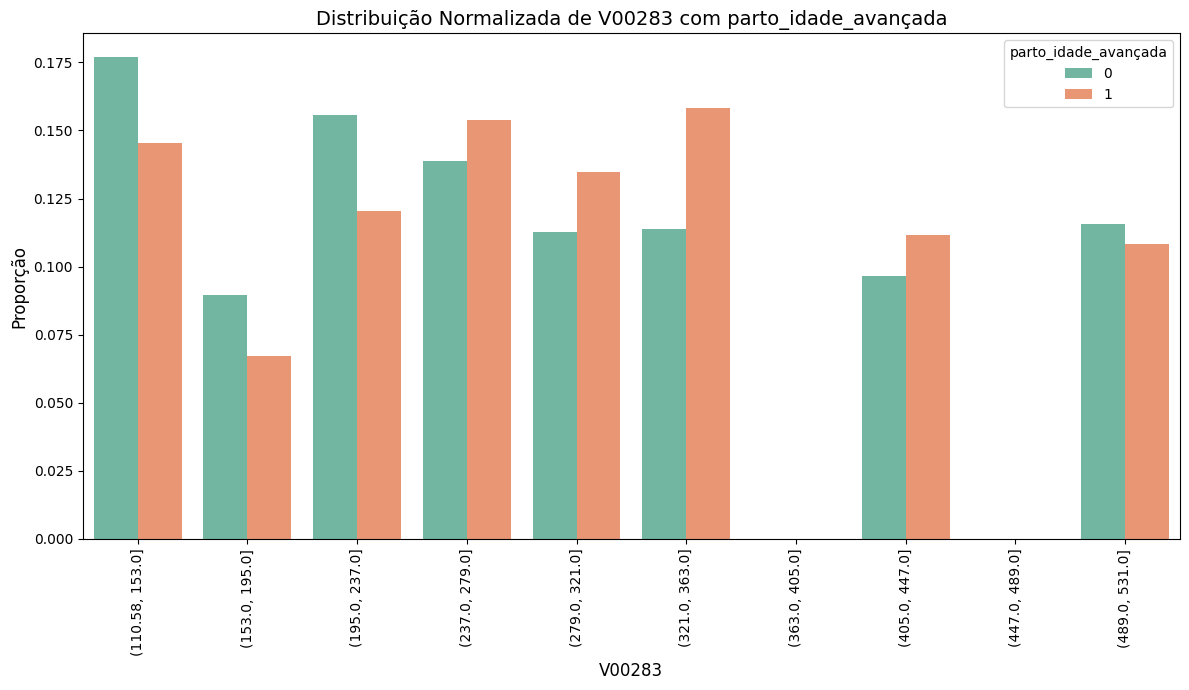

V00293
A coluna V00293 não possui dados válidos (apenas NaN). Gráfico não será gerado.
V00303
A coluna V00303 não possui dados válidos (apenas NaN). Gráfico não será gerado.
Quantidade_moradores


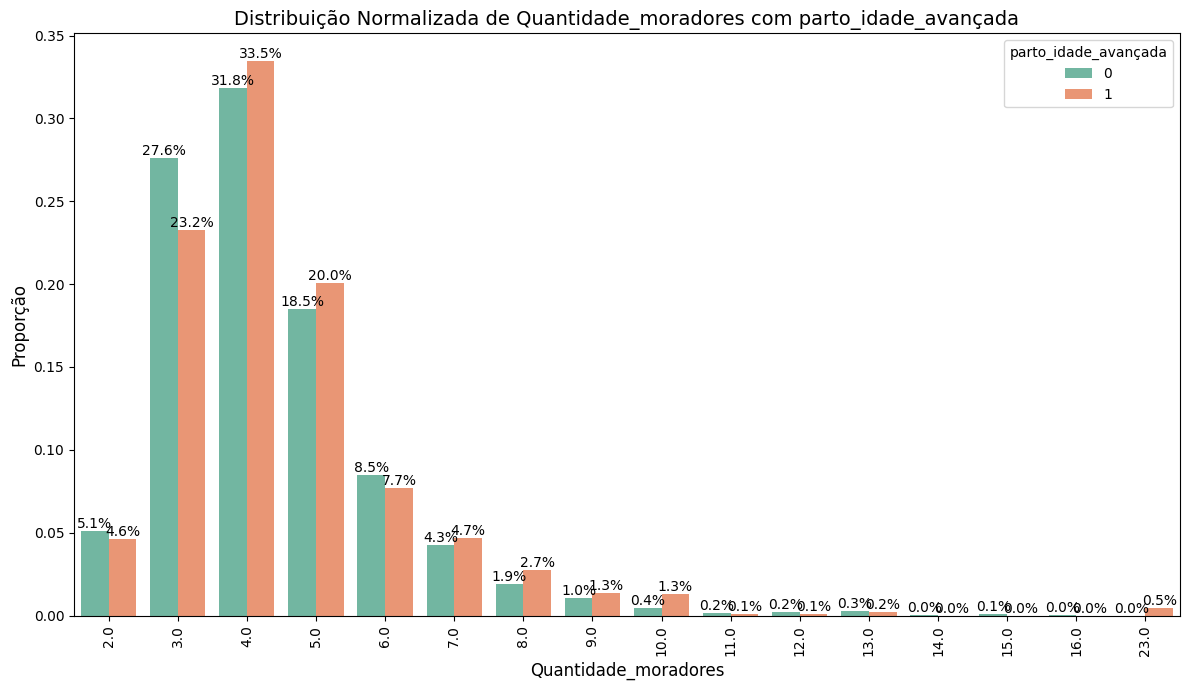

UF_sigla


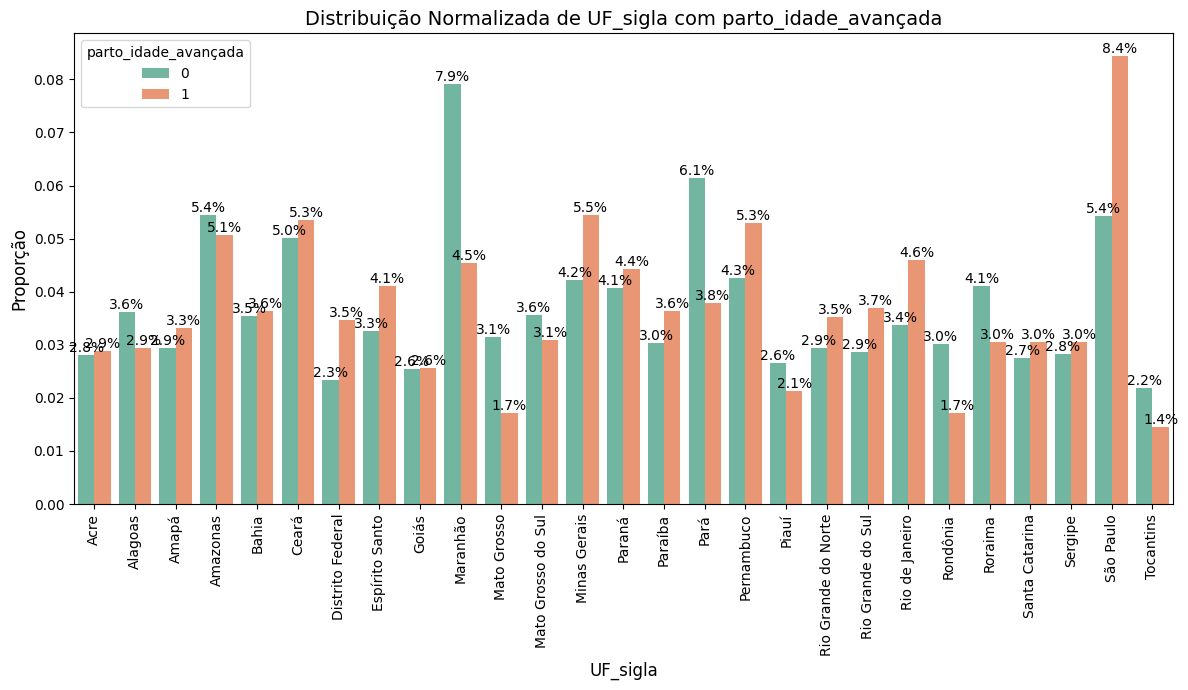

regiao_brasileira


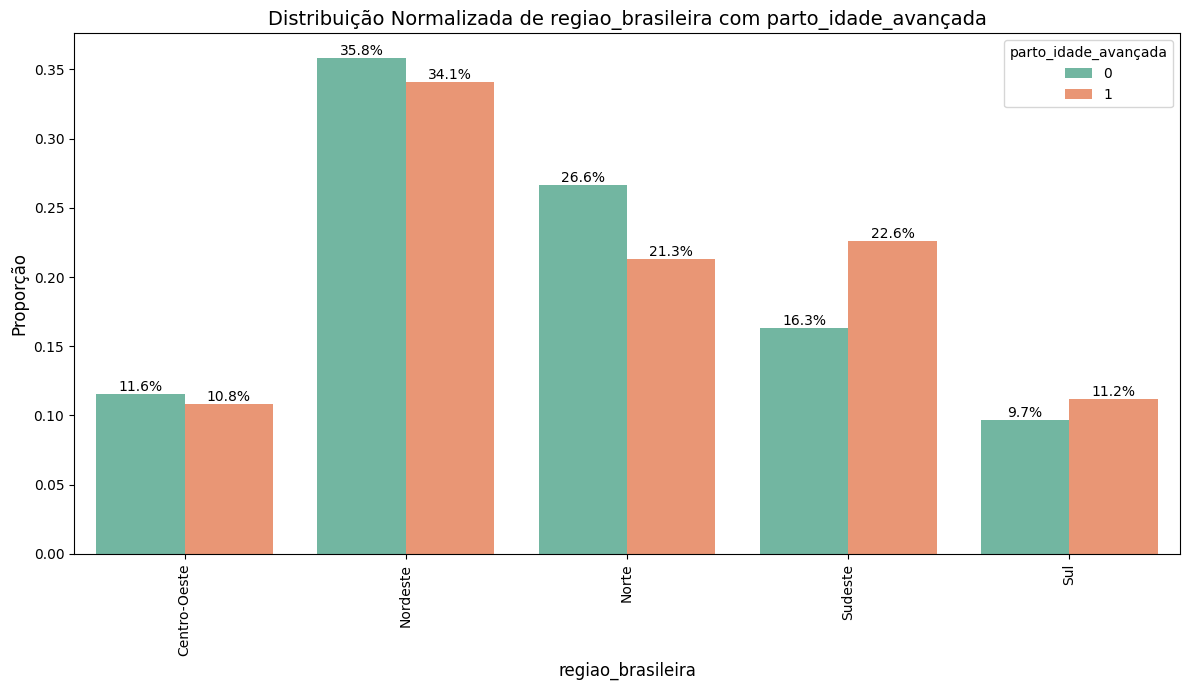

regiao_metropolitana


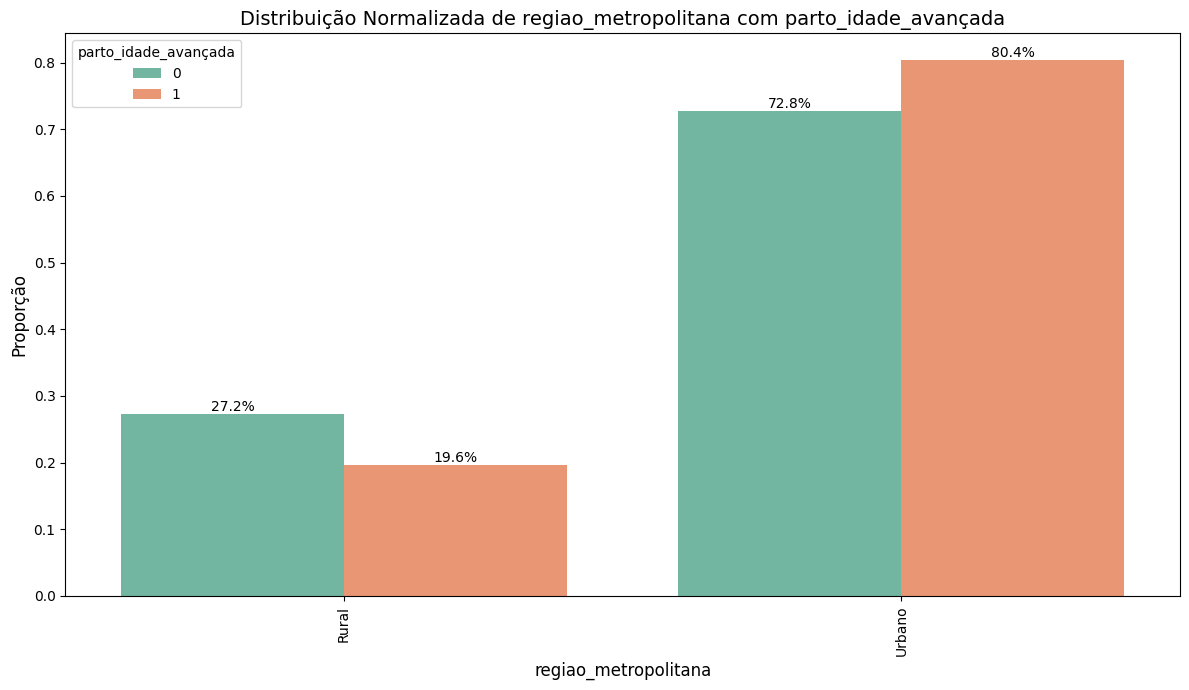

sexo


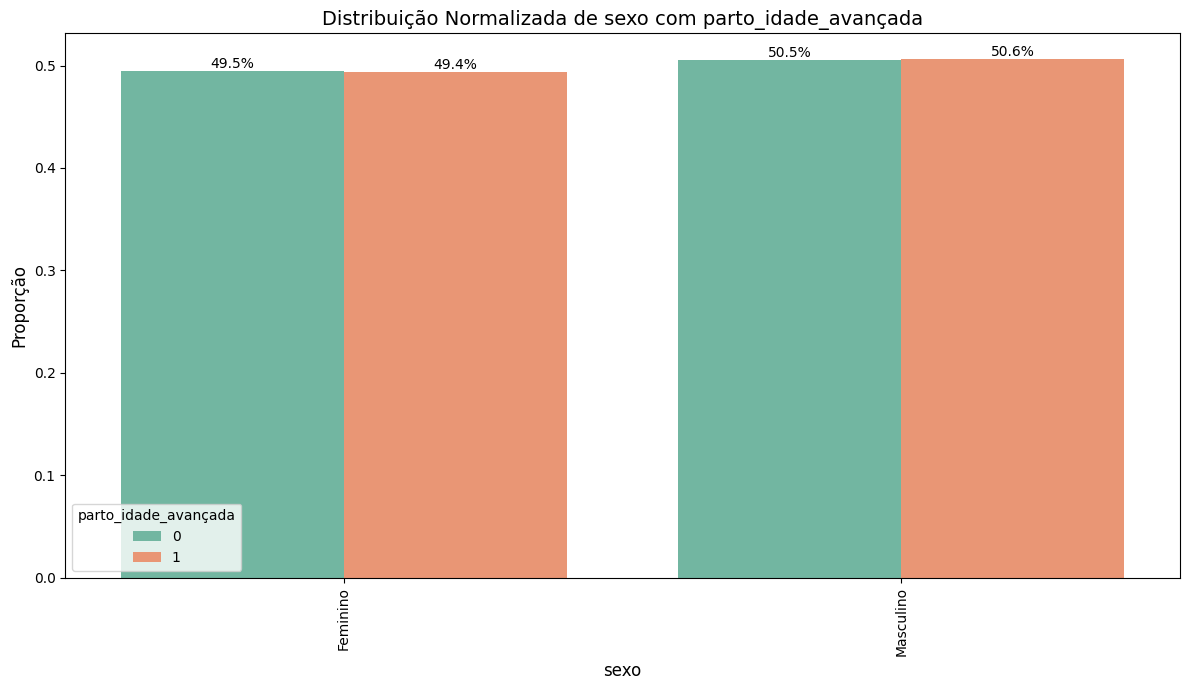

dia_nascimento


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


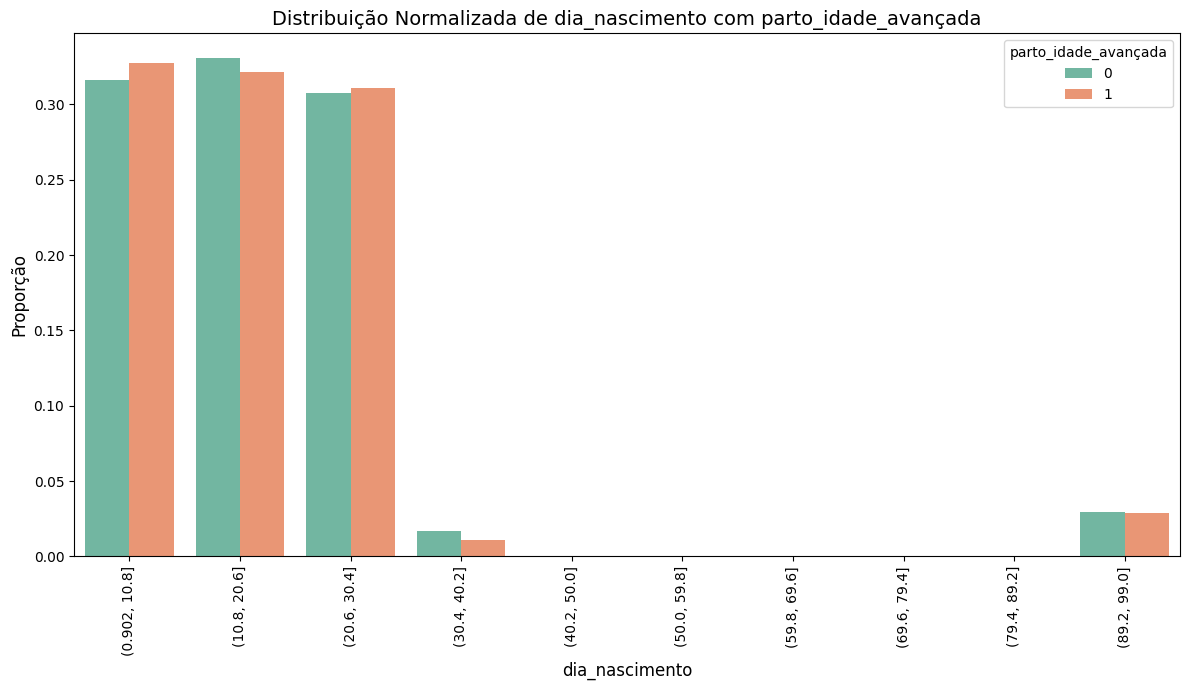

mes_nascimento


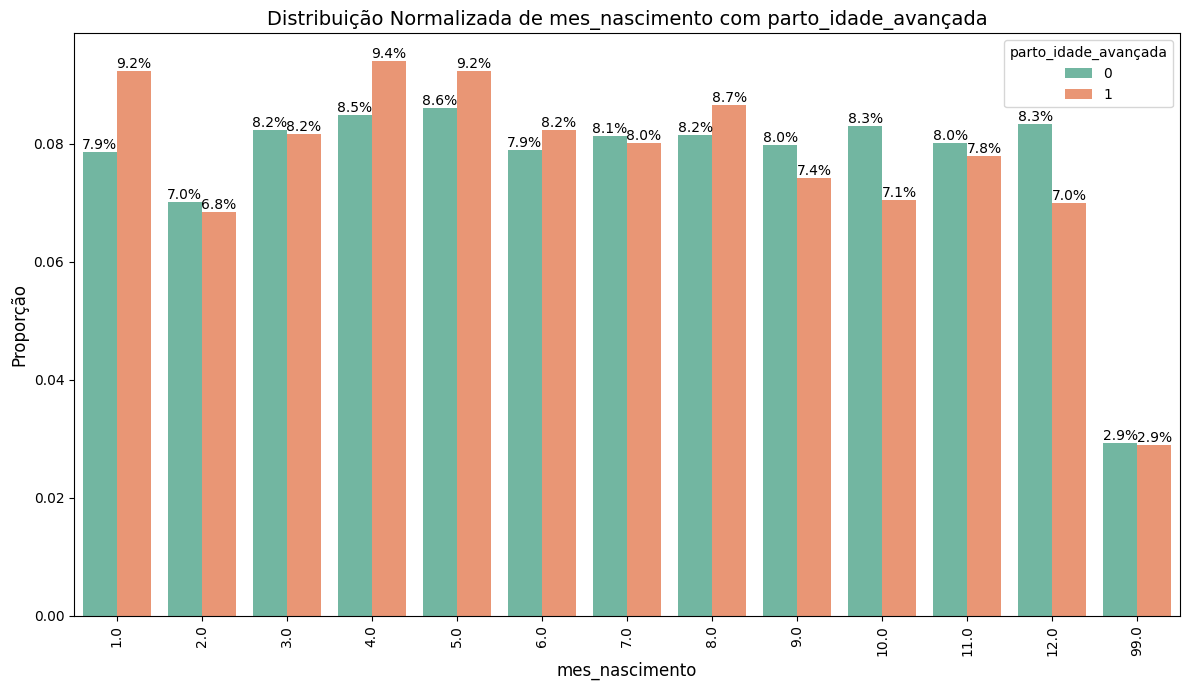

ano_nascimento


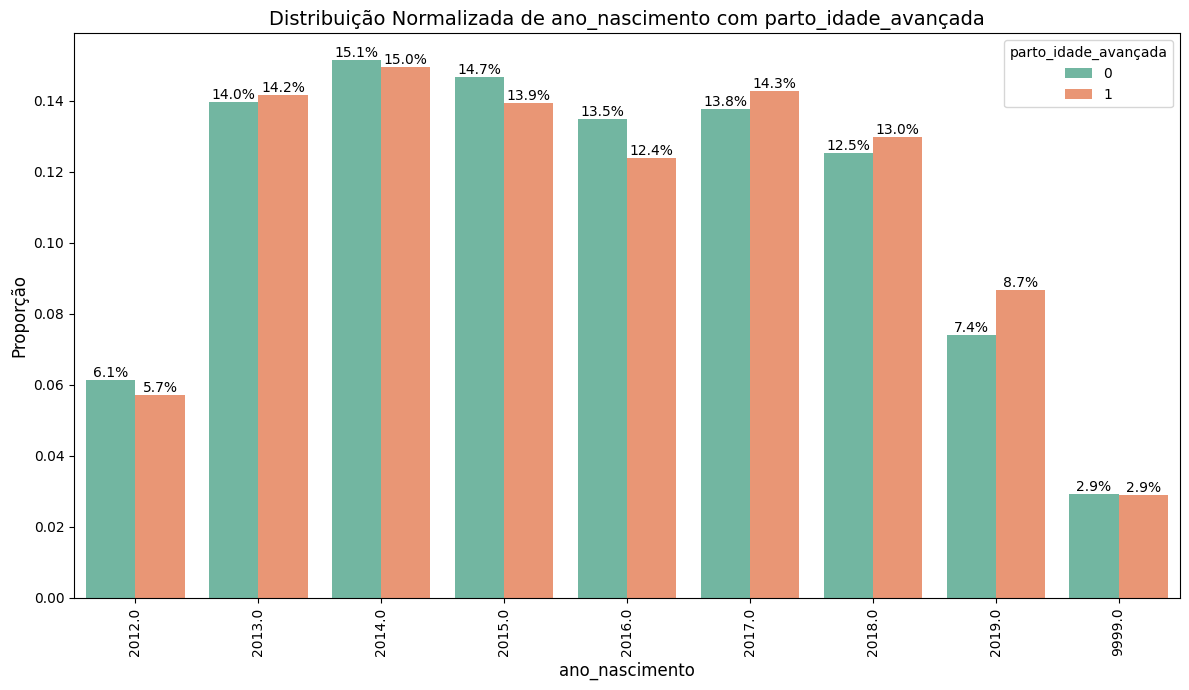

idade


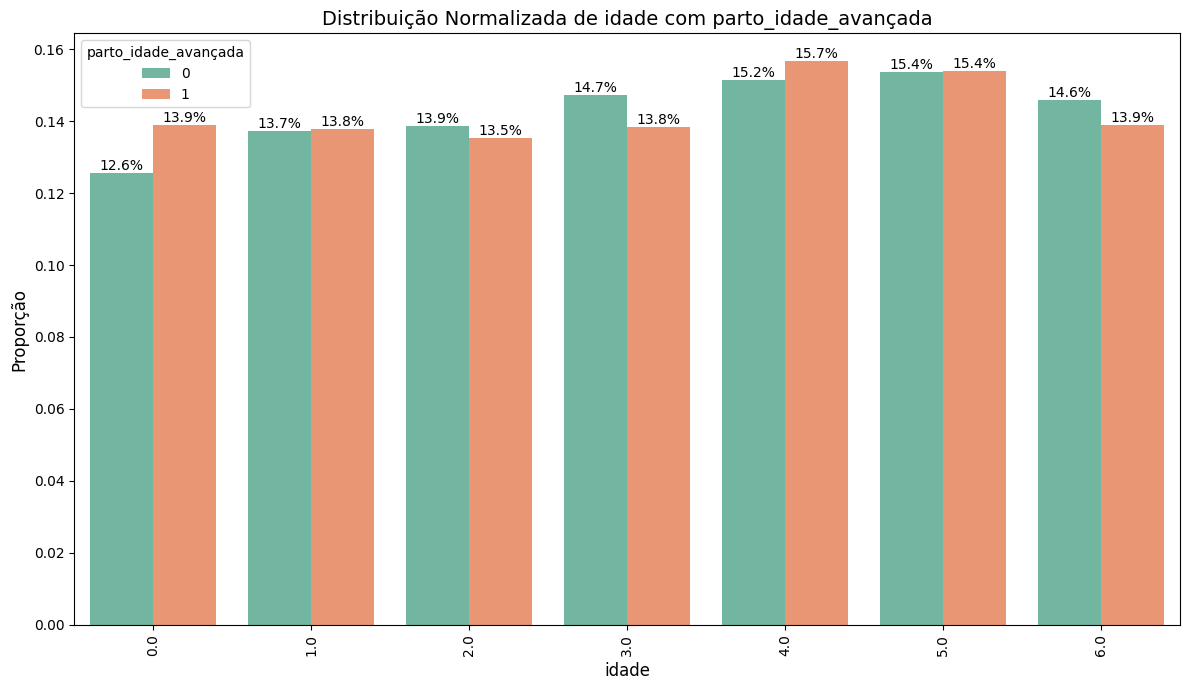

peso
A coluna peso não possui dados válidos (apenas NaN). Gráfico não será gerado.
altura
A coluna altura não possui dados válidos (apenas NaN). Gráfico não será gerado.
peso_morador_selec
A coluna peso_morador_selec não possui dados válidos (apenas NaN). Gráfico não será gerado.
C001


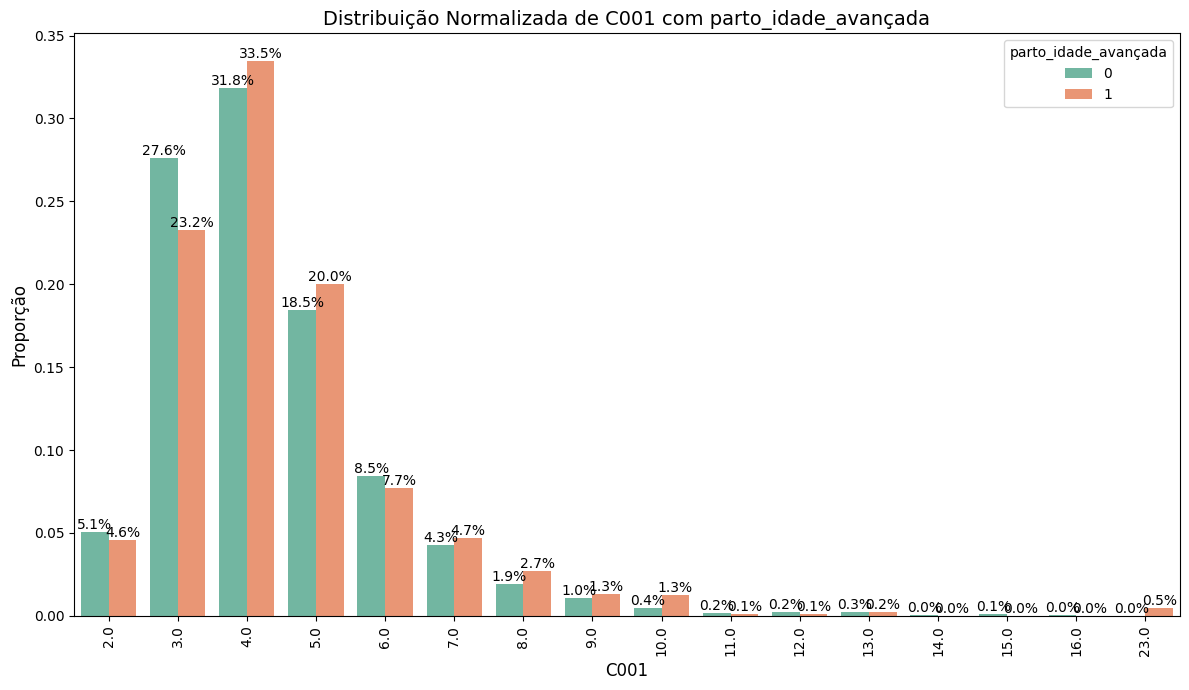

C006


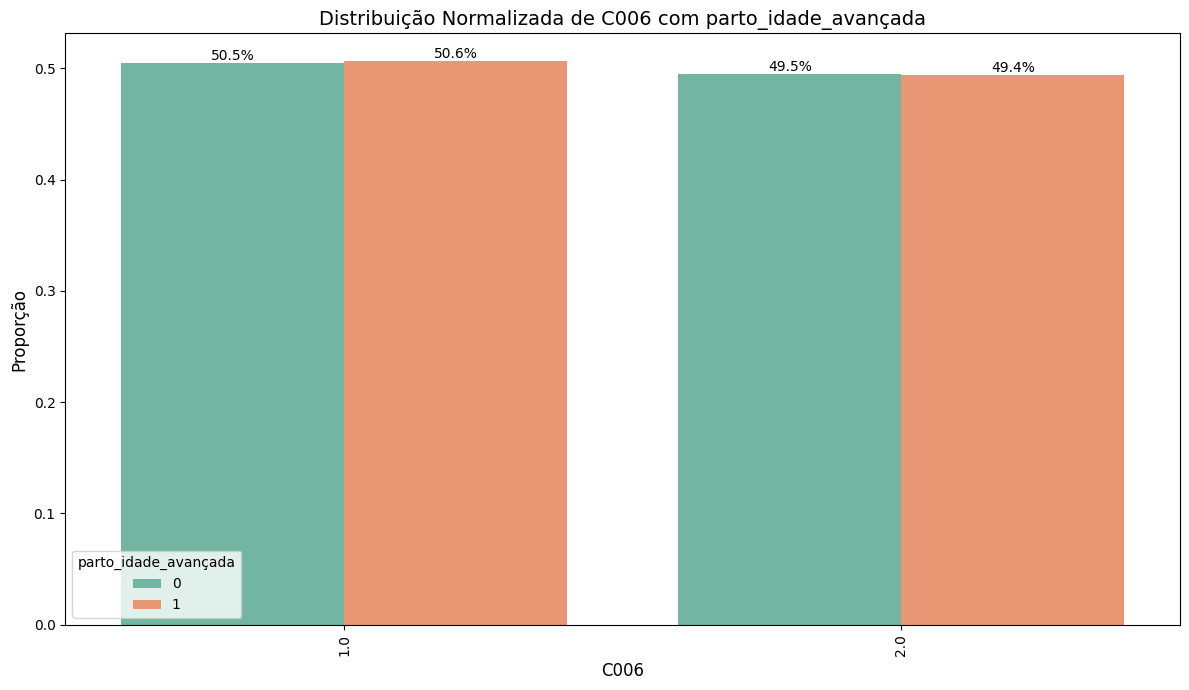

C00701


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


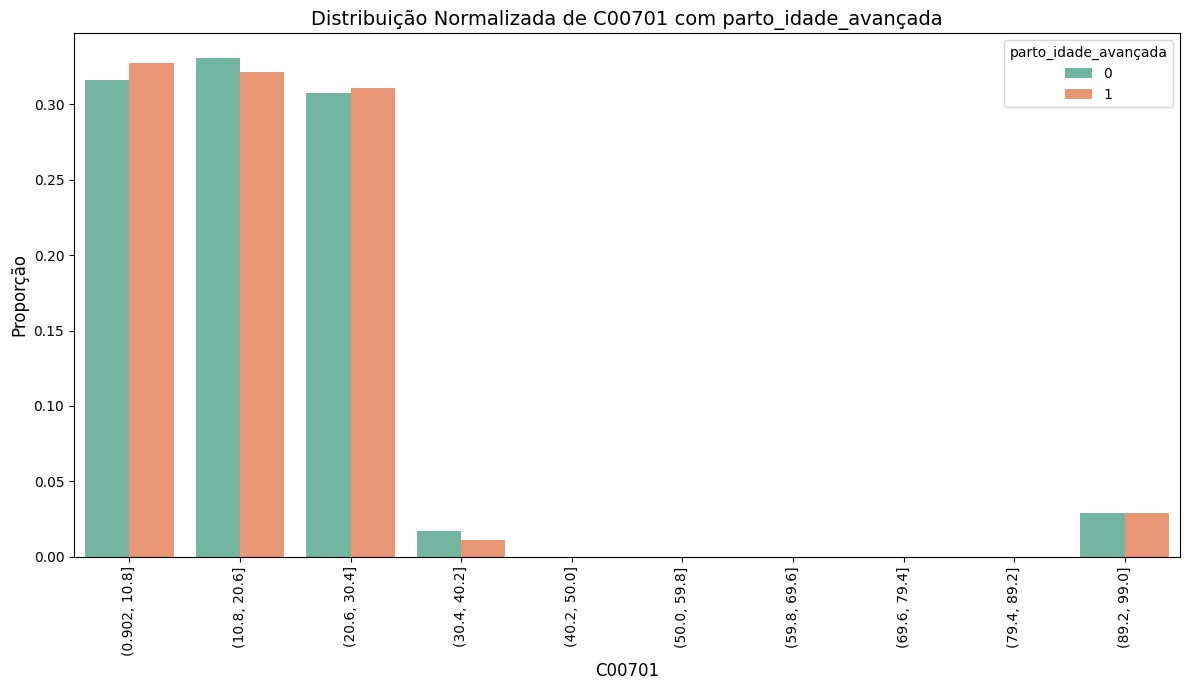

C00702


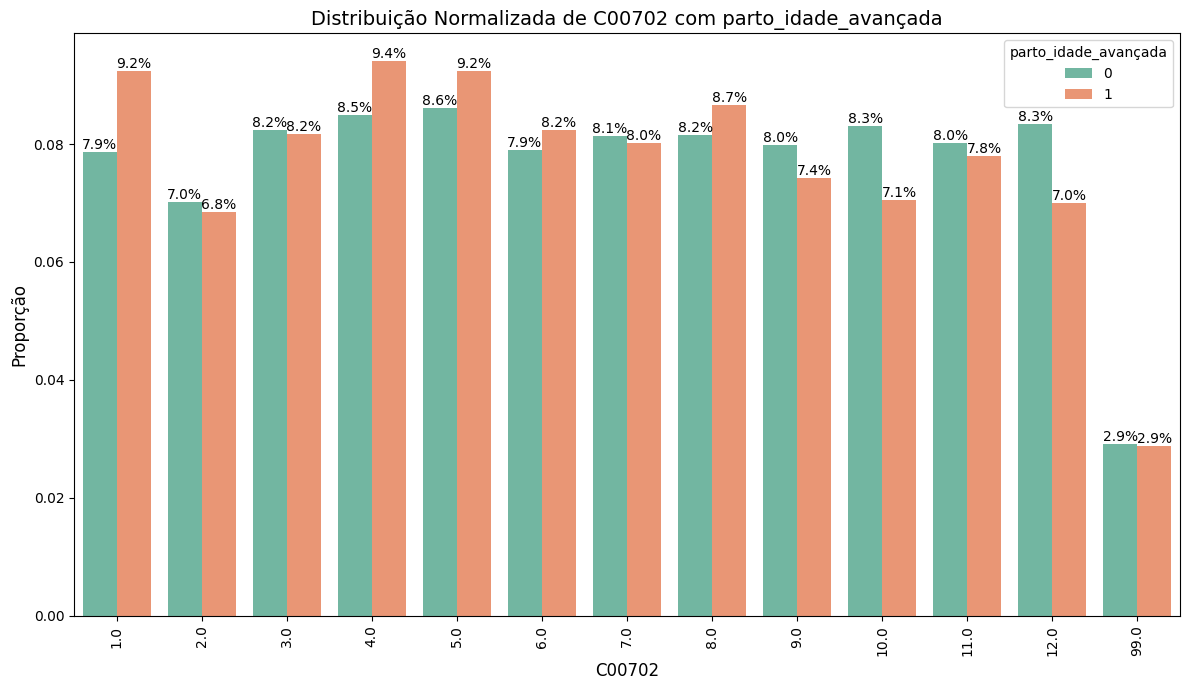

C00703


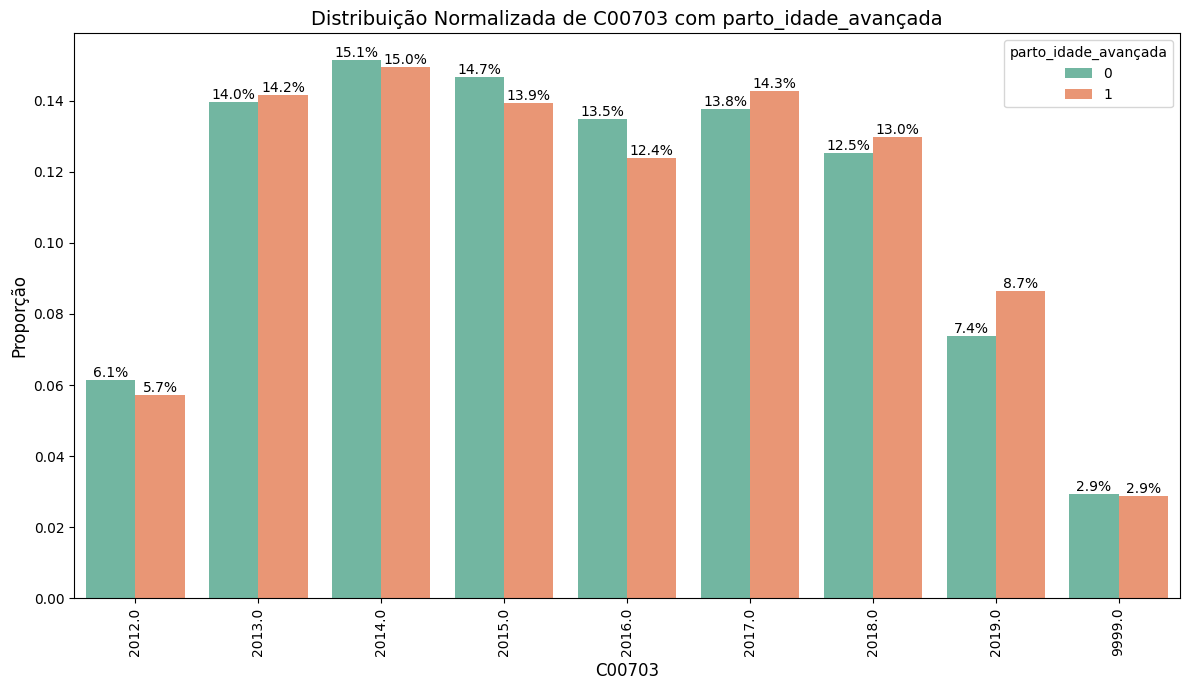

C008


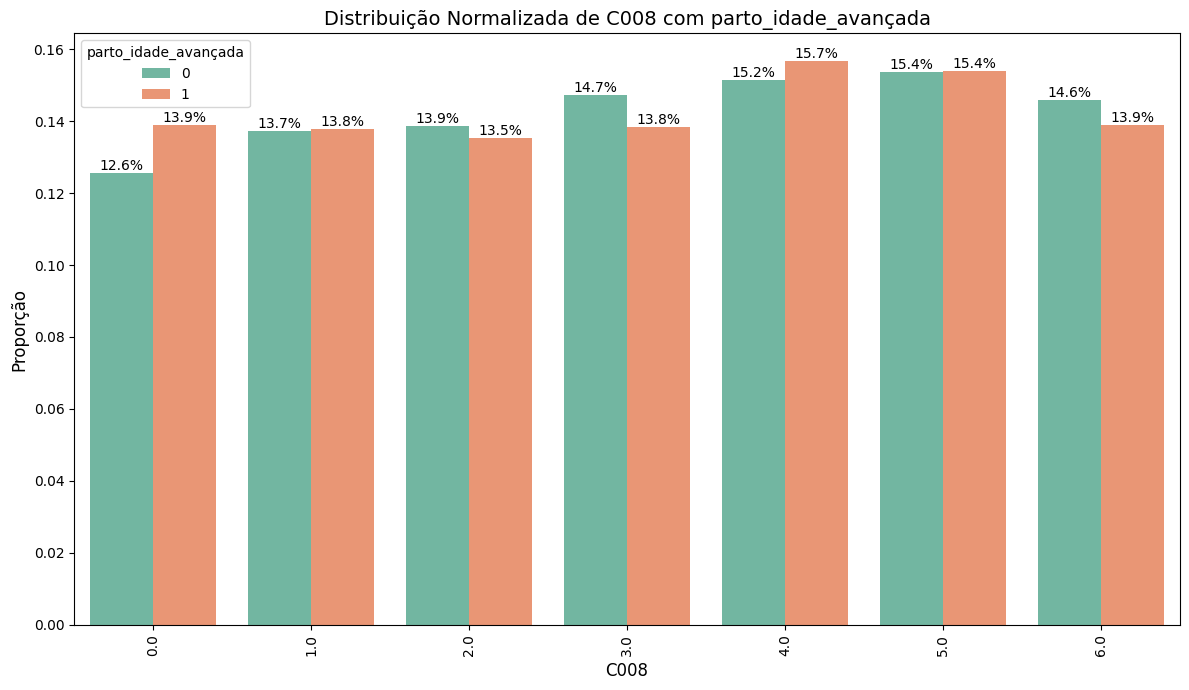

D00201


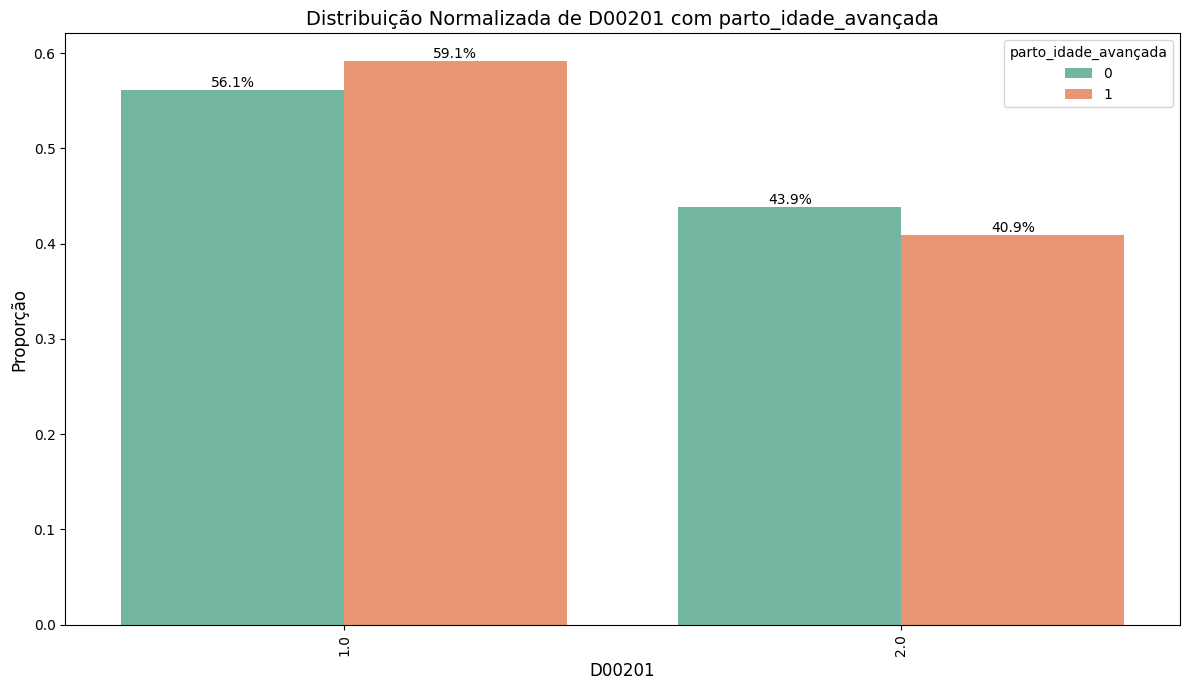

D00901


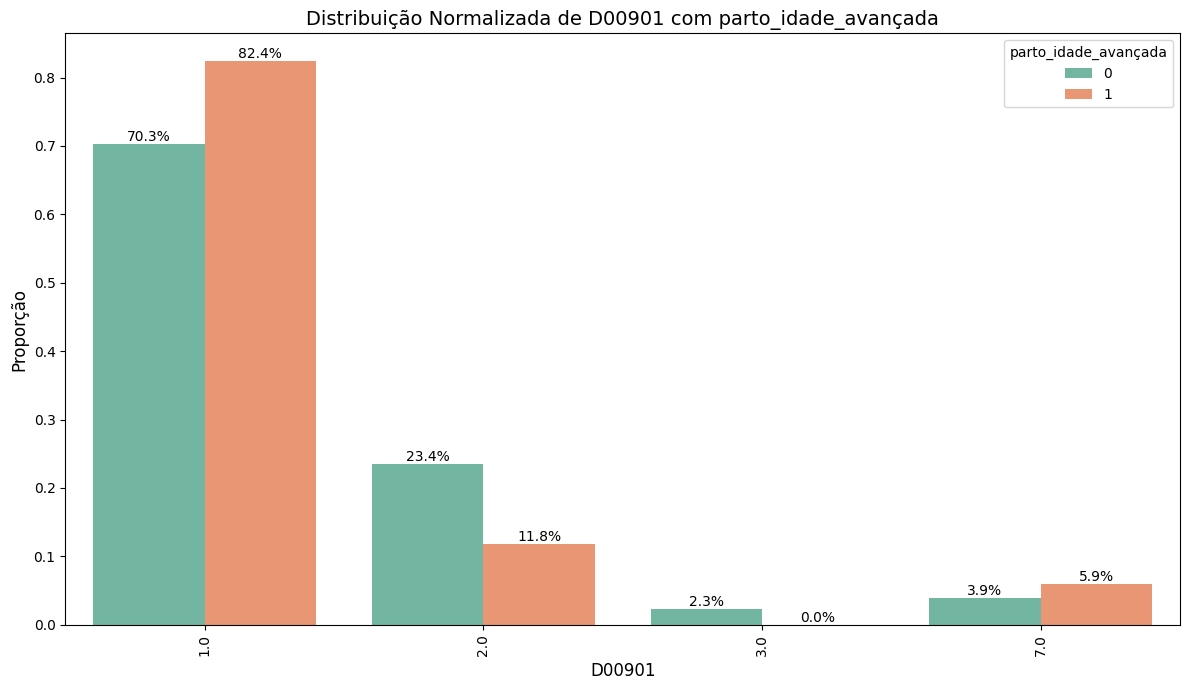

G046


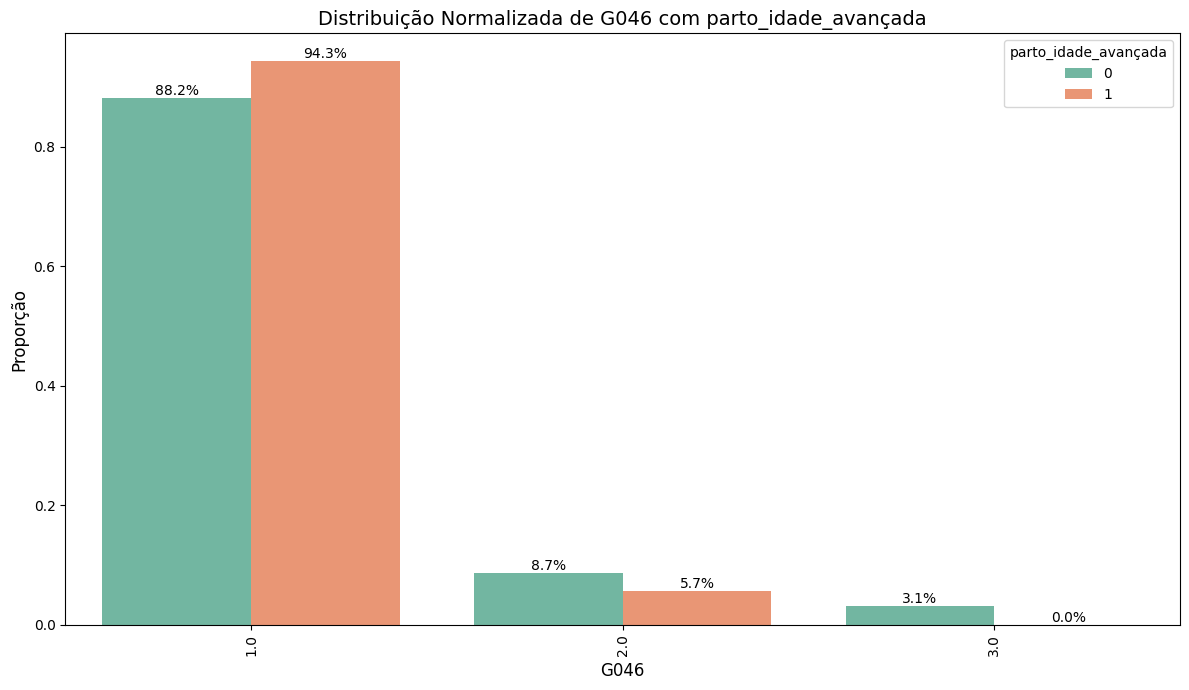

G049


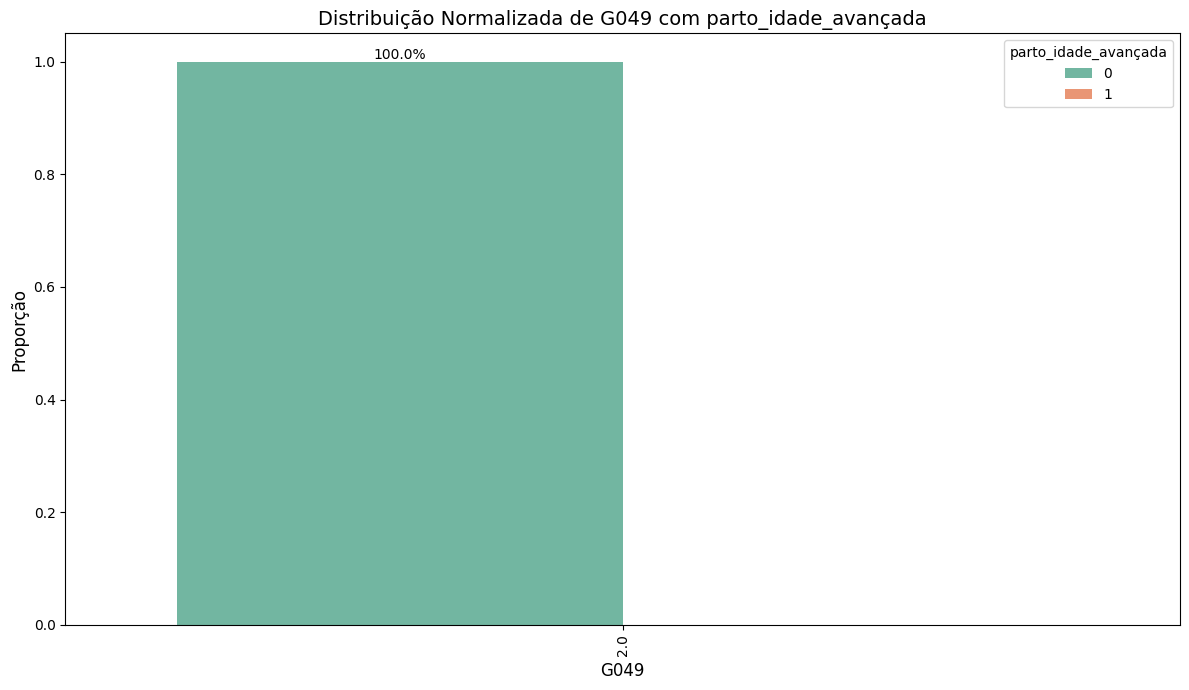

G051


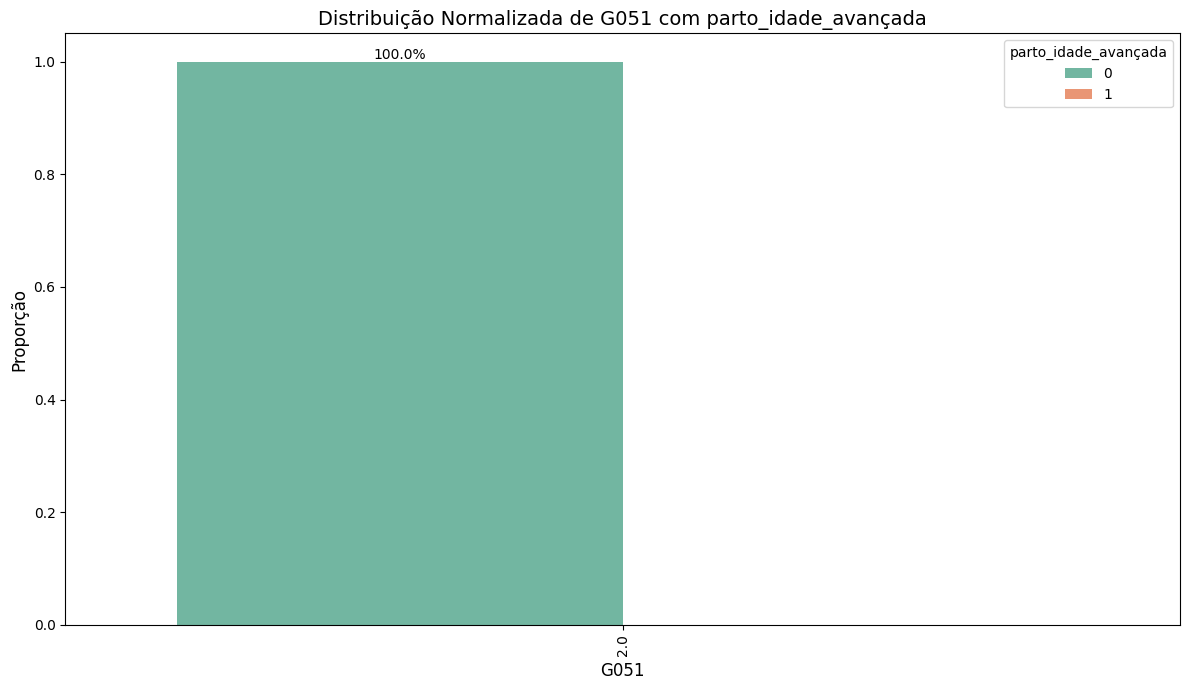

G053


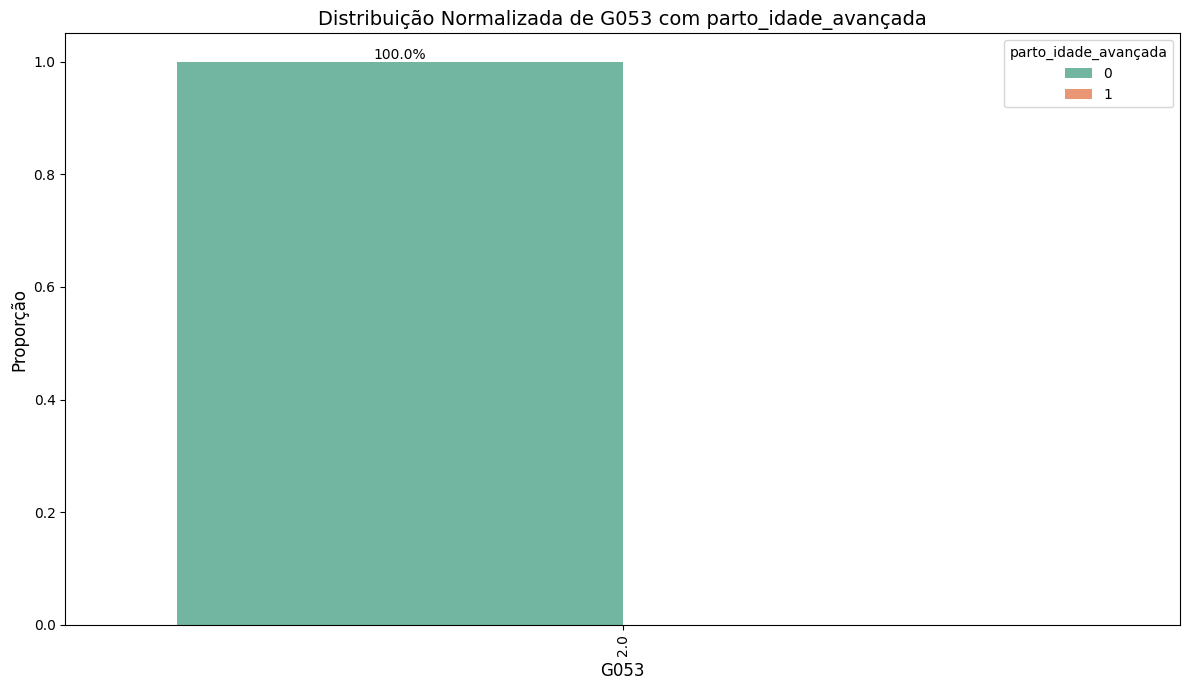

G059


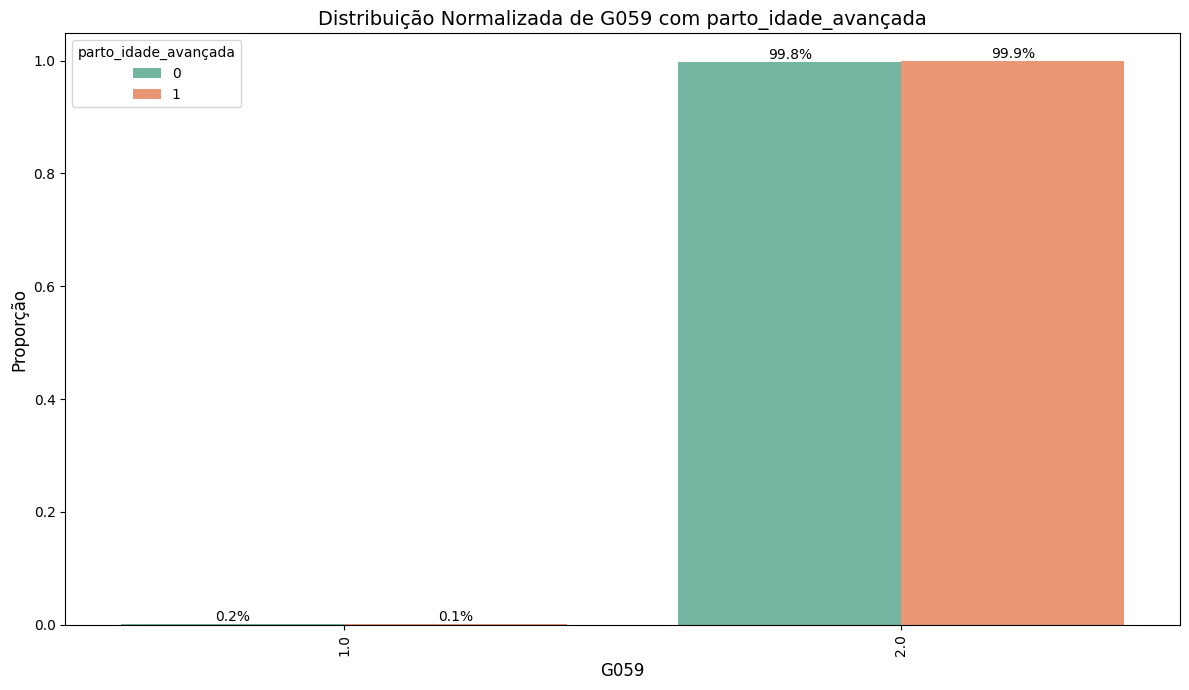

G060


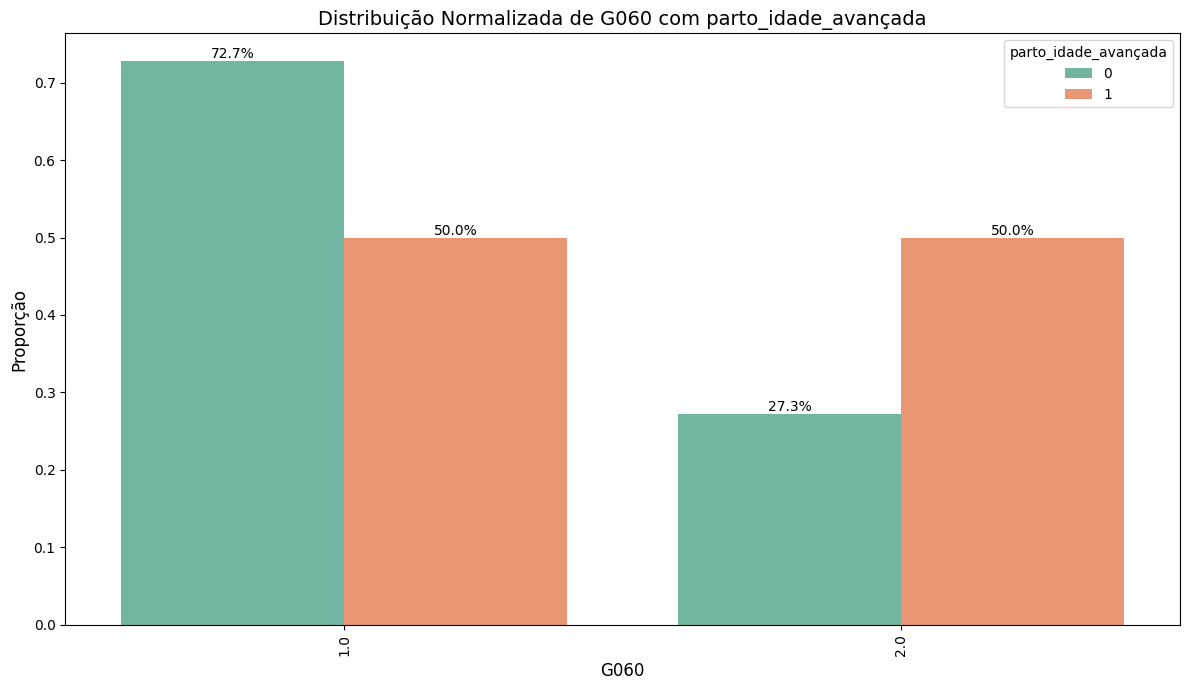

G062


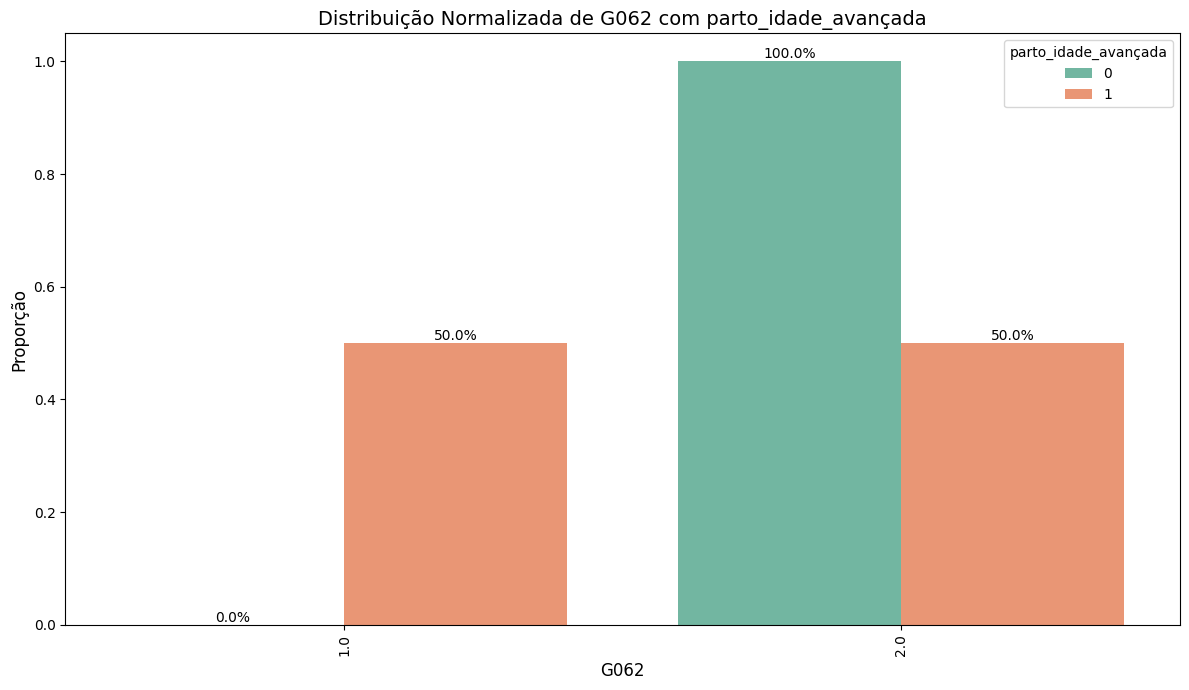

G064


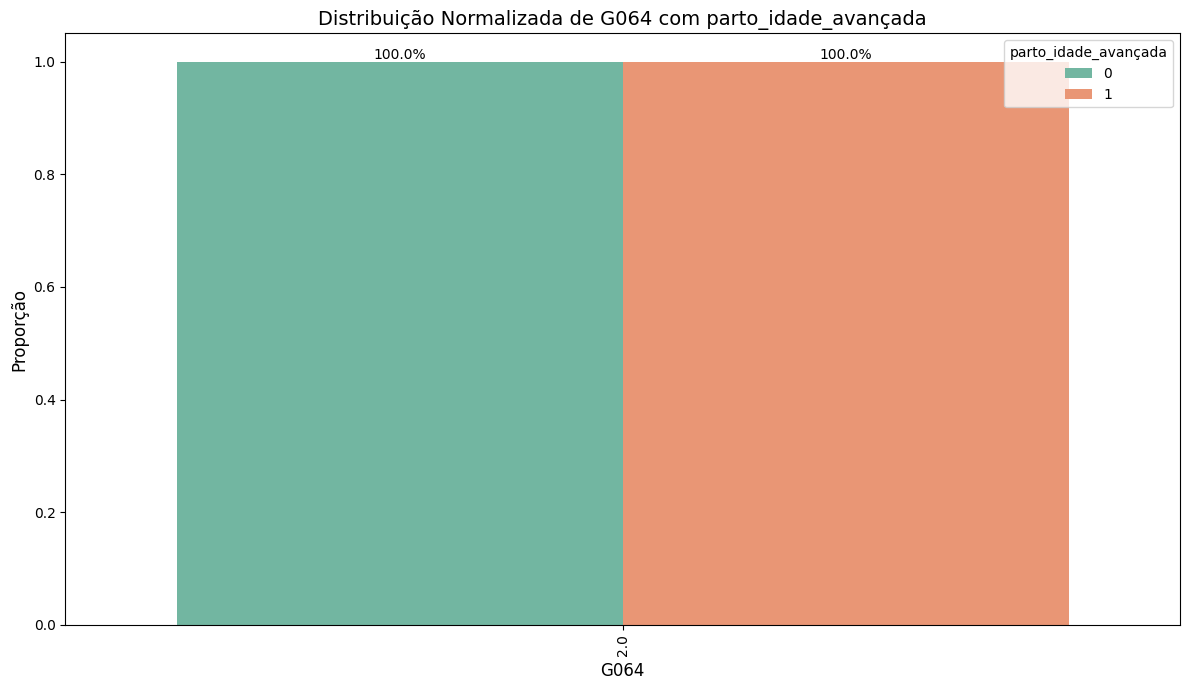

G066


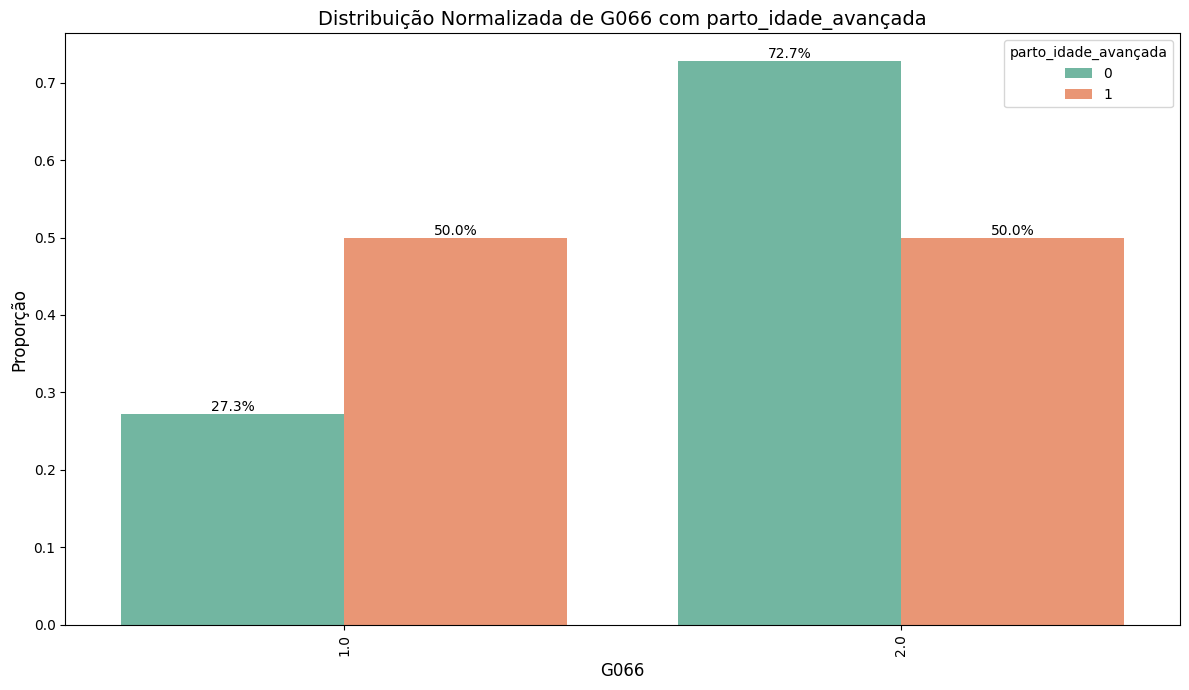

G070


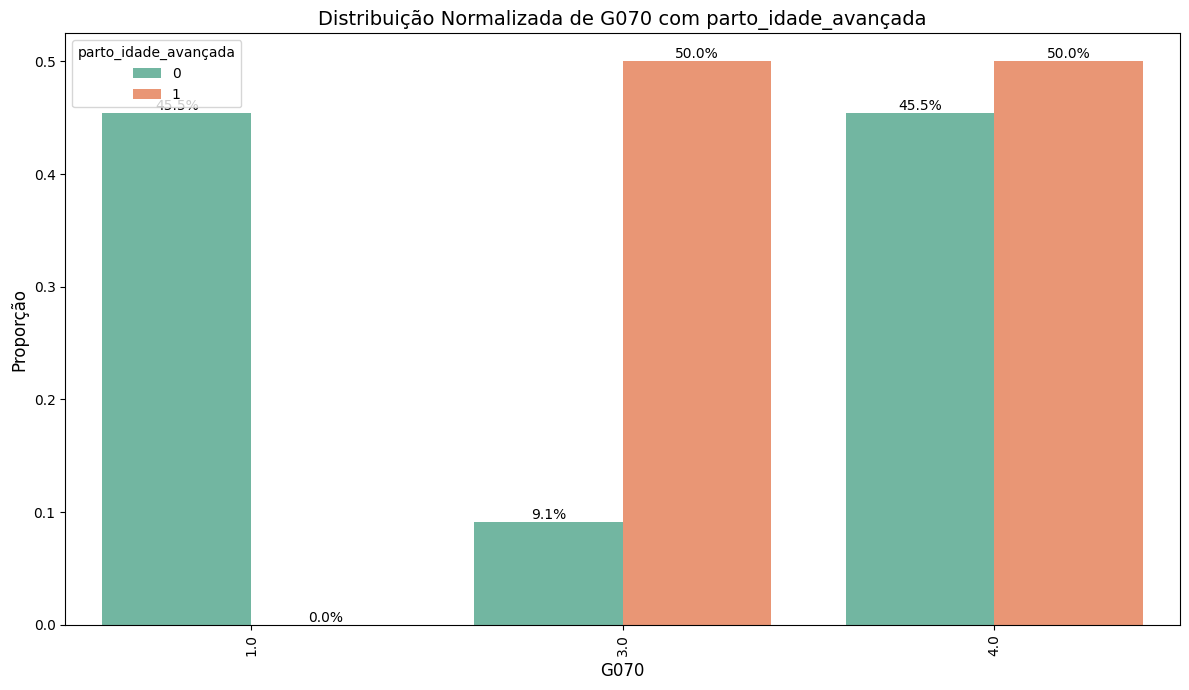

G072


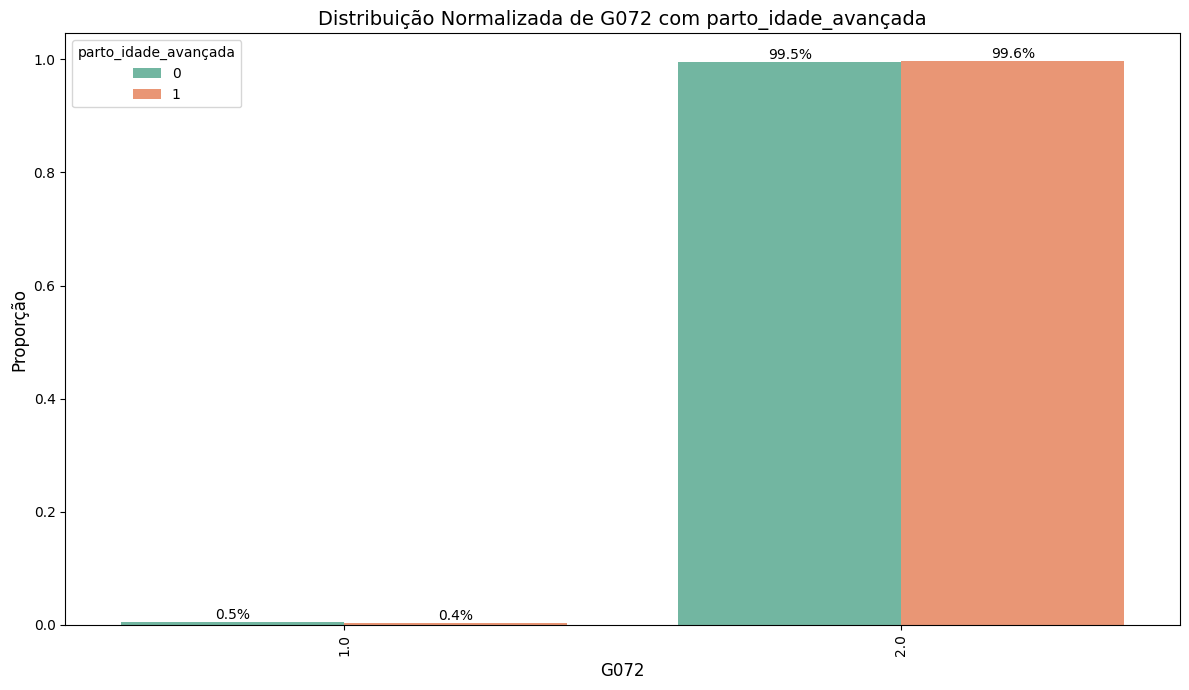

G073


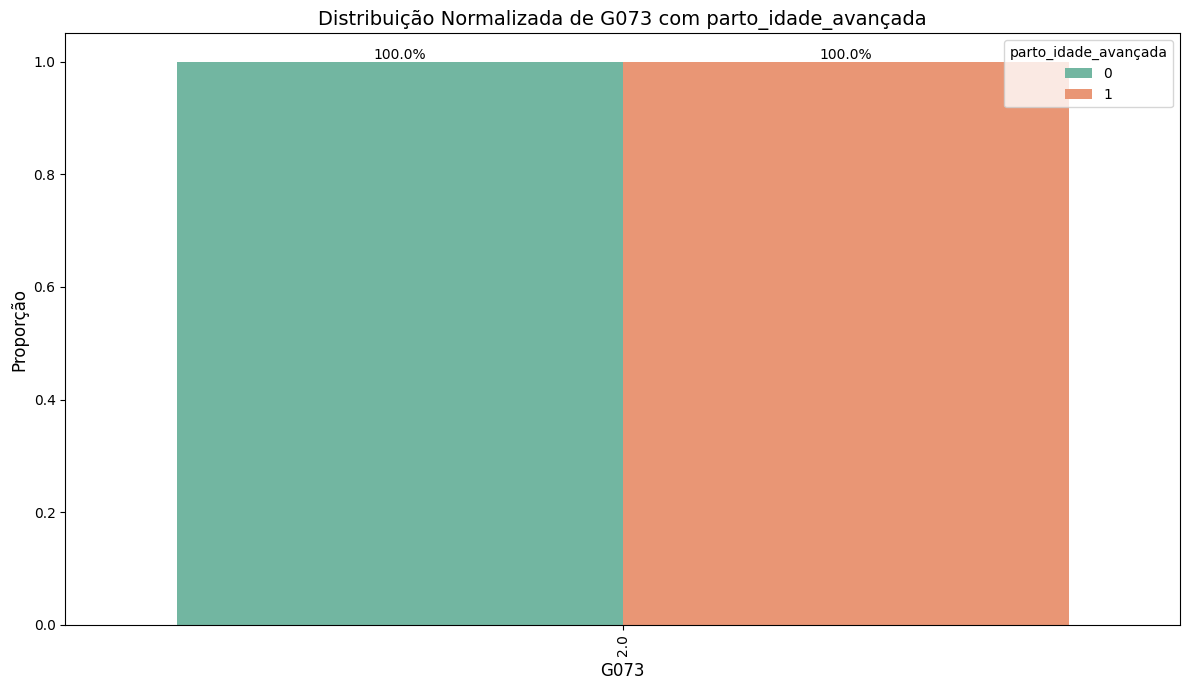

G079


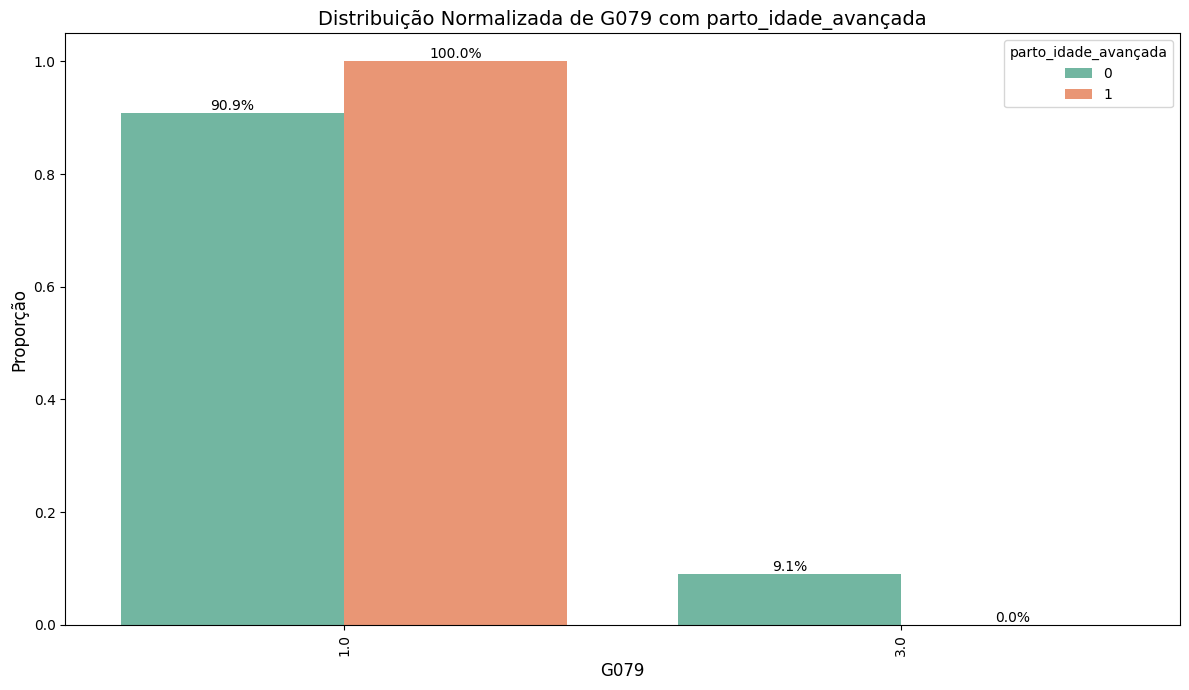

G083


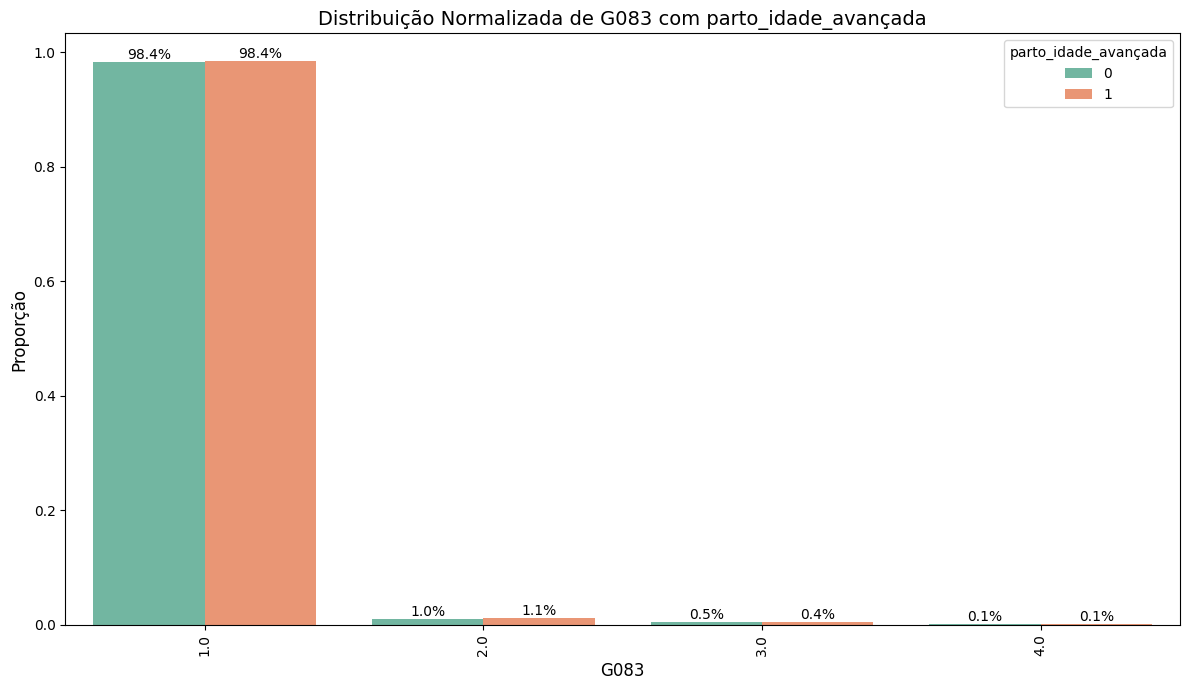

G084


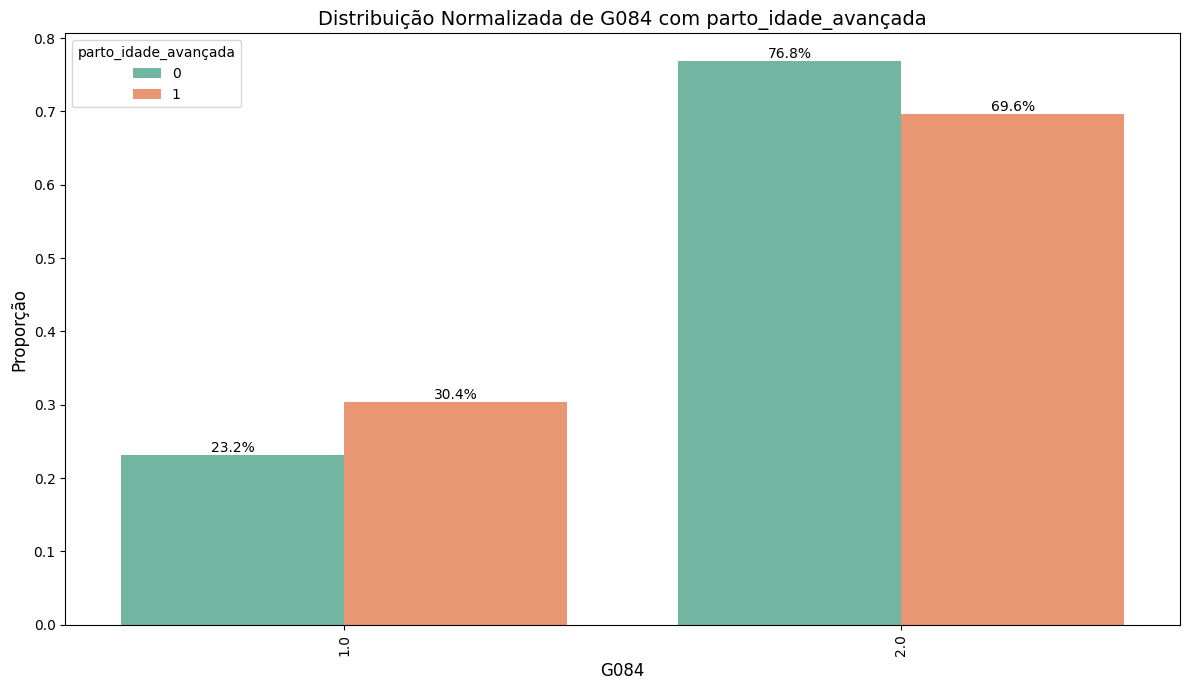

L021


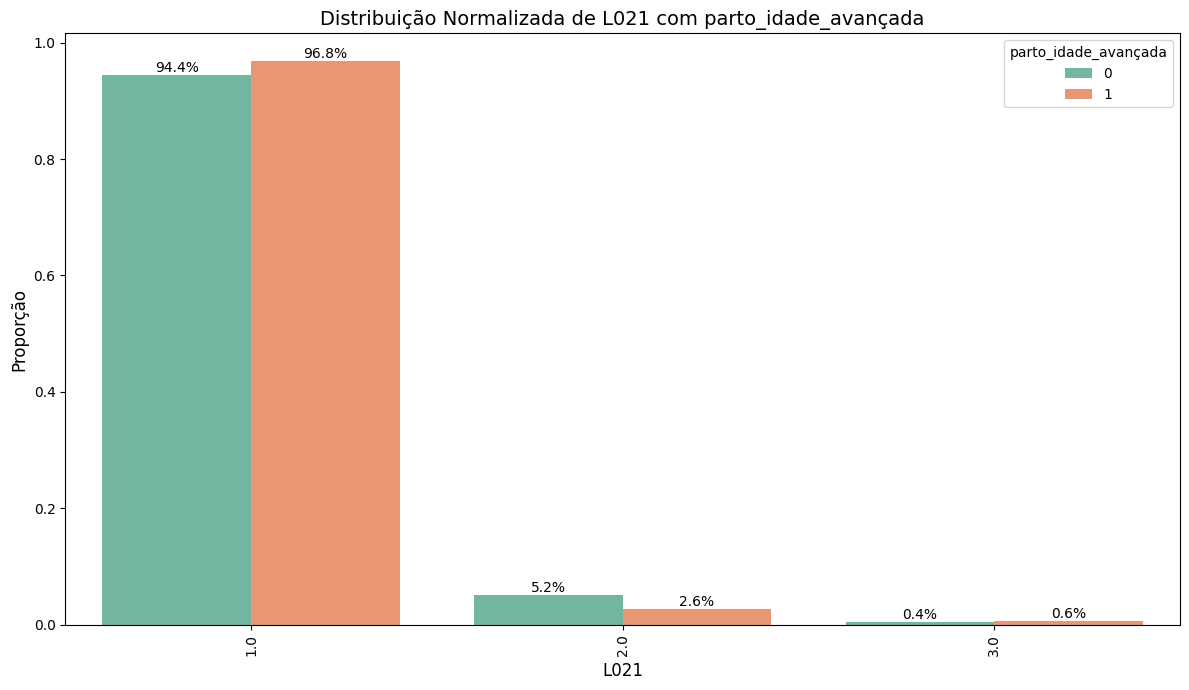

L033


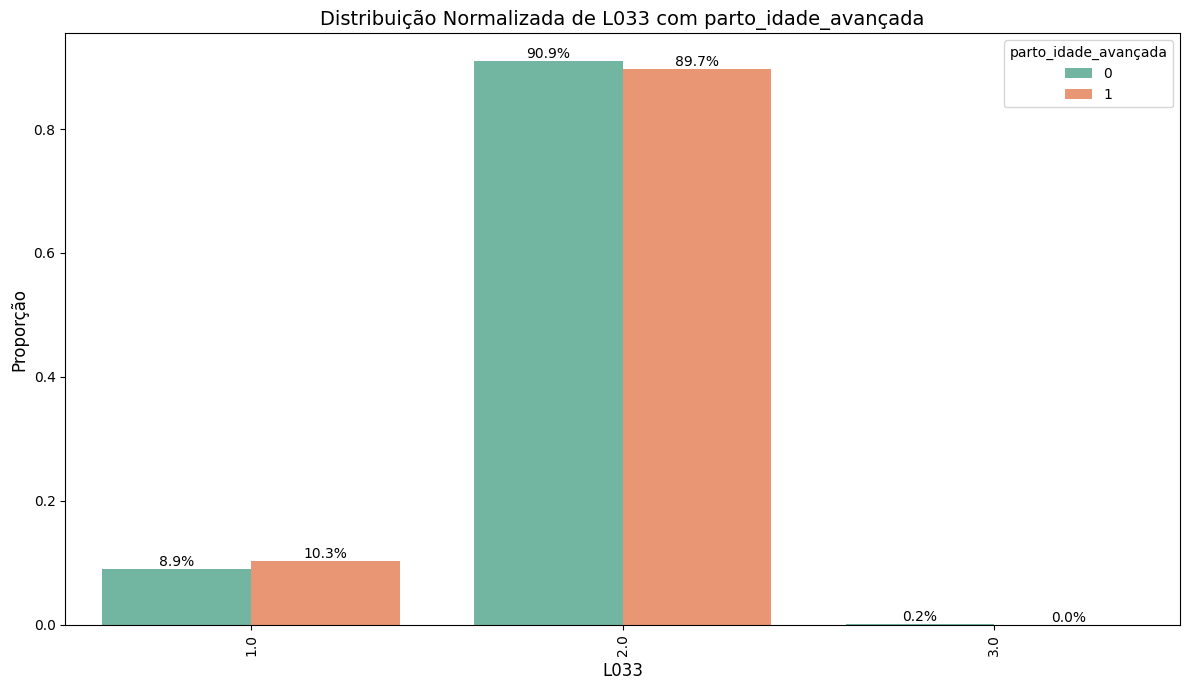

L037


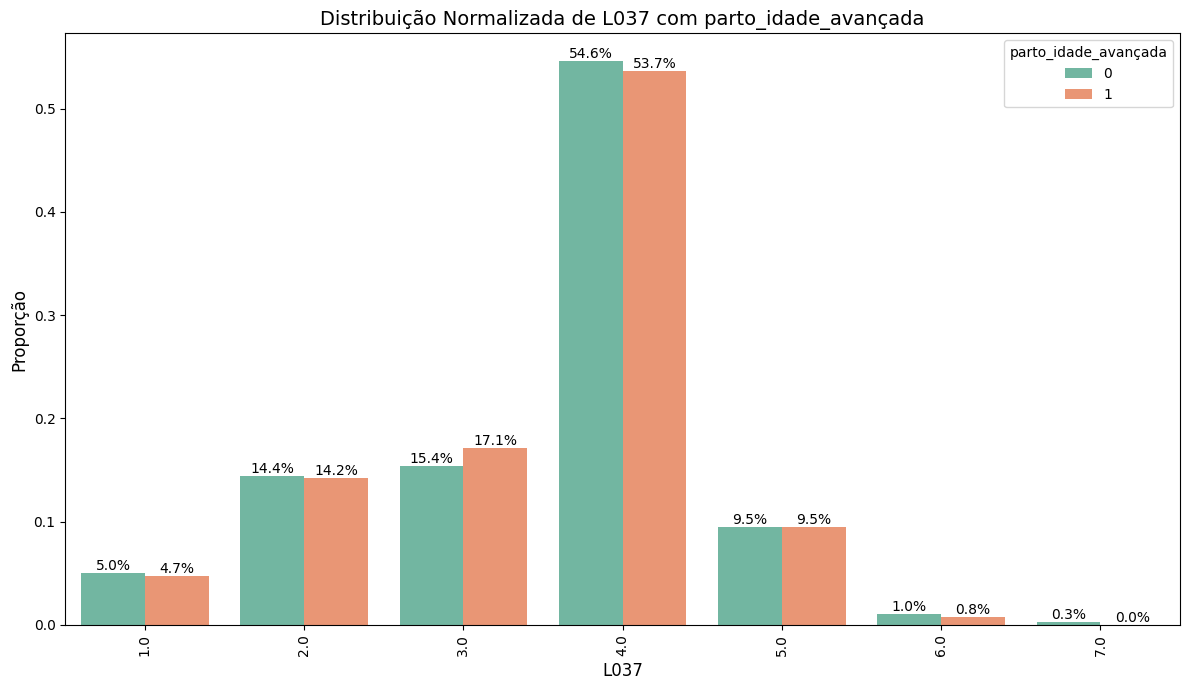

L038


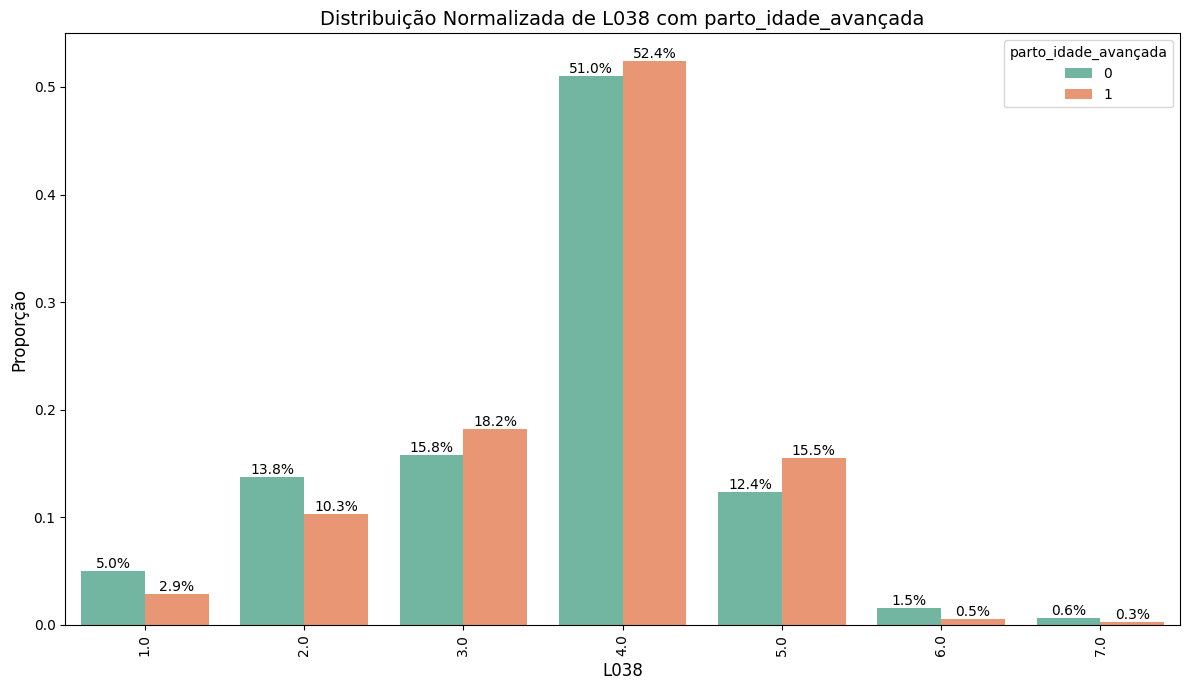

L039


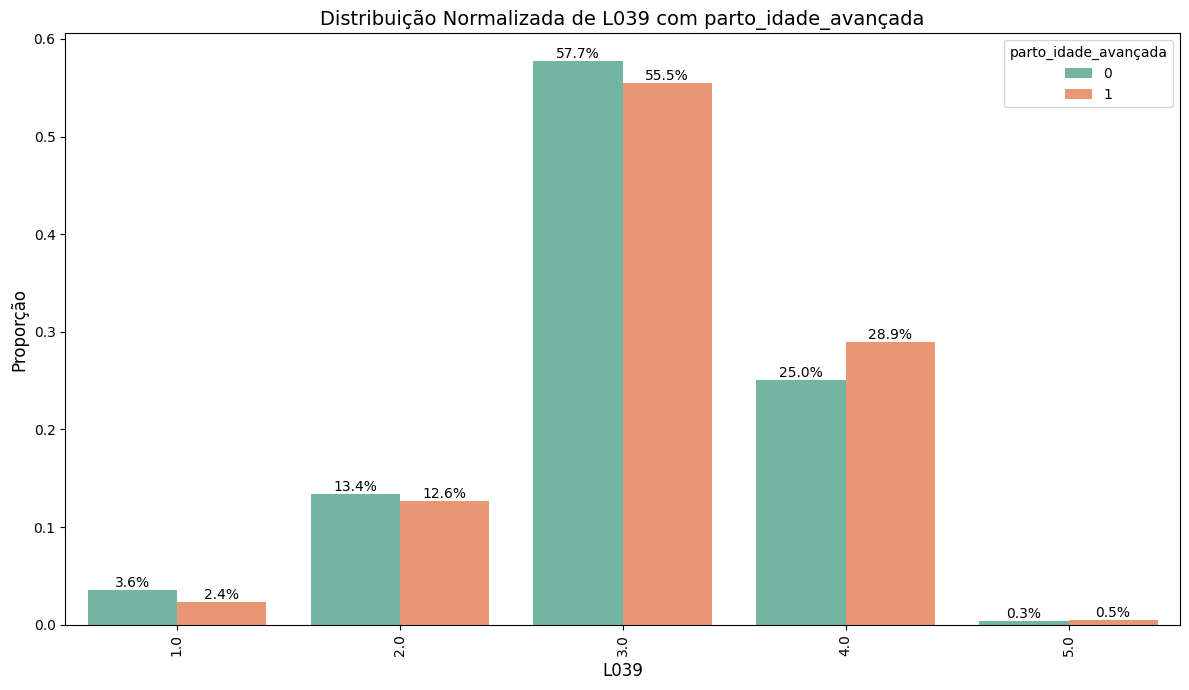

L040


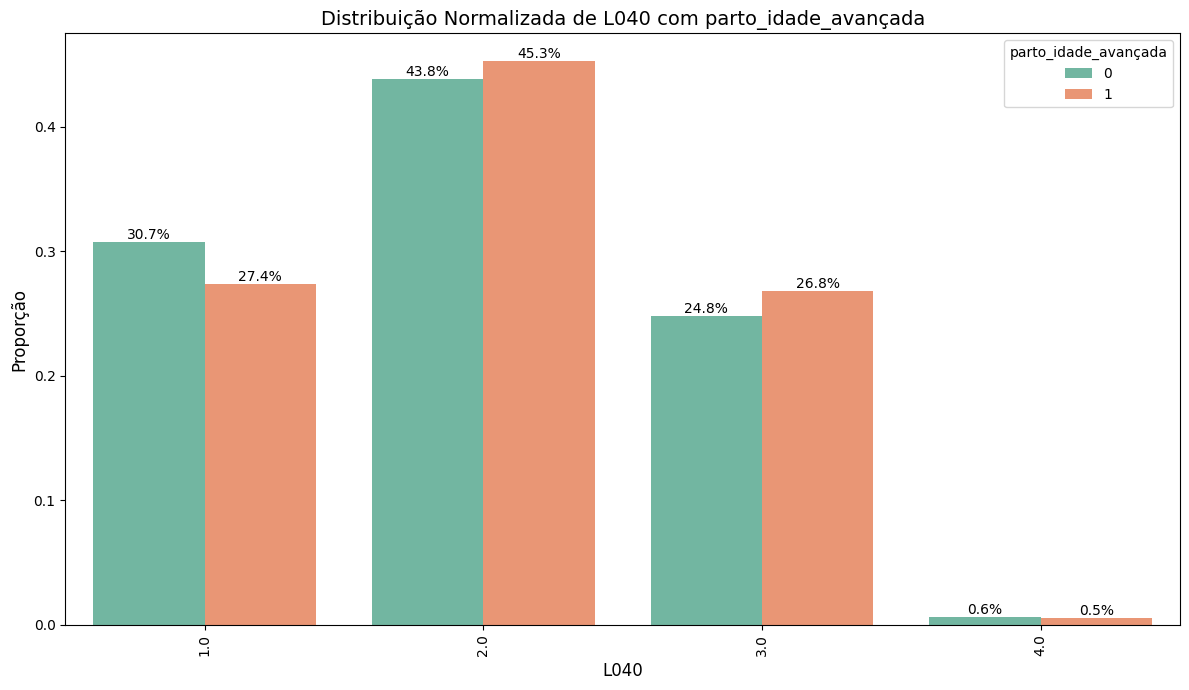

L01701


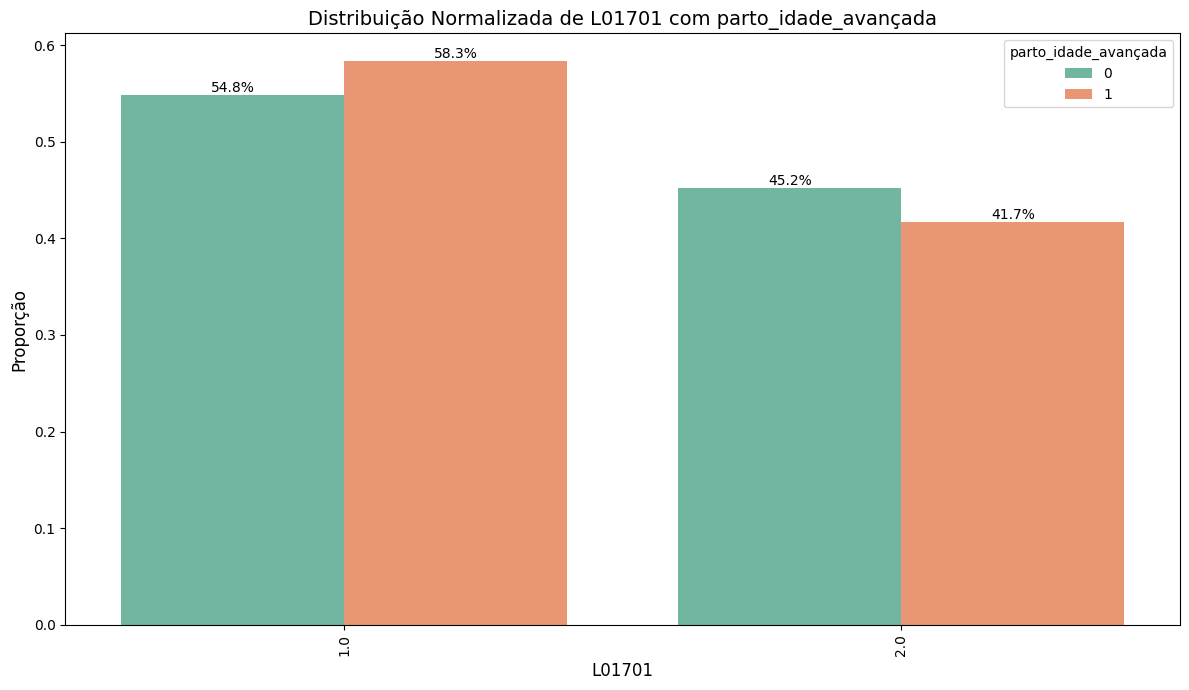

L018


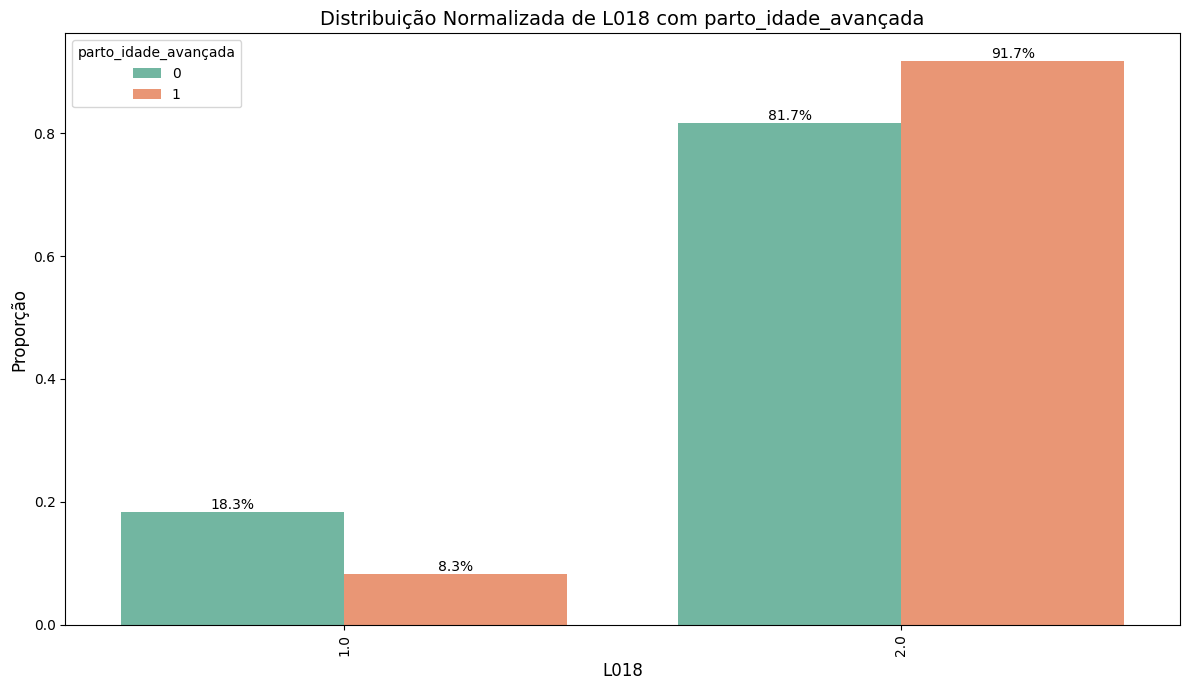

L019


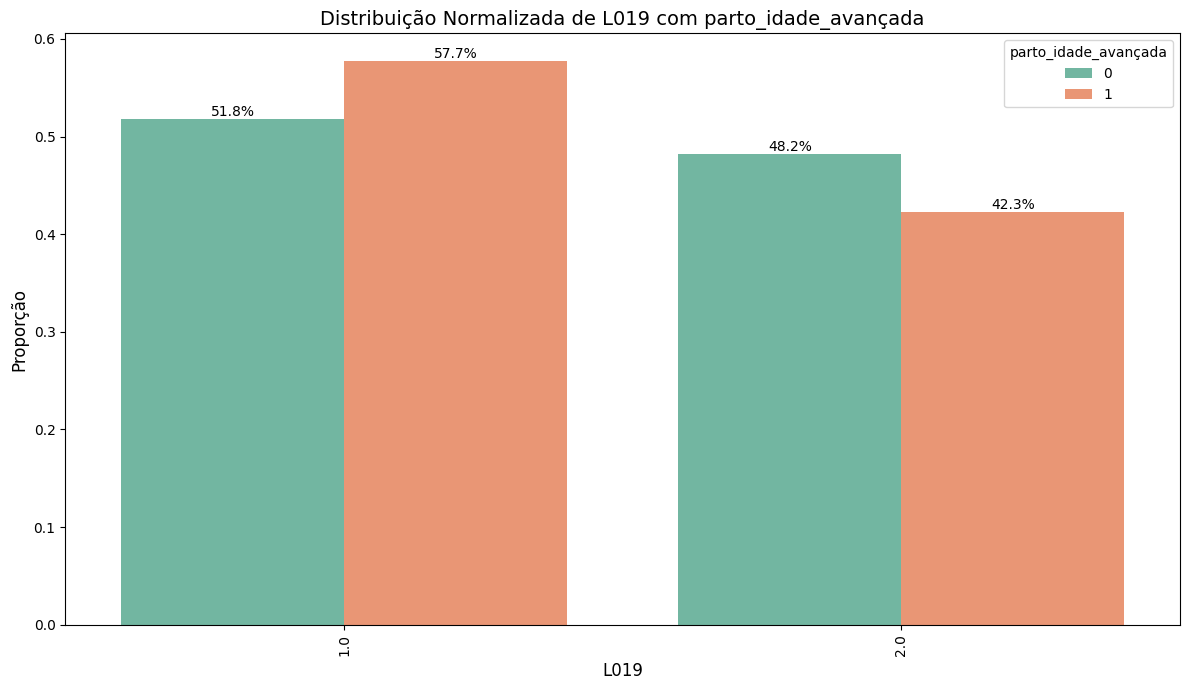

P00103
A coluna P00103 não possui dados válidos (apenas NaN). Gráfico não será gerado.
P00104
A coluna P00104 não possui dados válidos (apenas NaN). Gráfico não será gerado.
P00403
A coluna P00403 não possui dados válidos (apenas NaN). Gráfico não será gerado.
P00404
A coluna P00404 não possui dados válidos (apenas NaN). Gráfico não será gerado.
idade_ultimo_parto


C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18104\2738130964.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


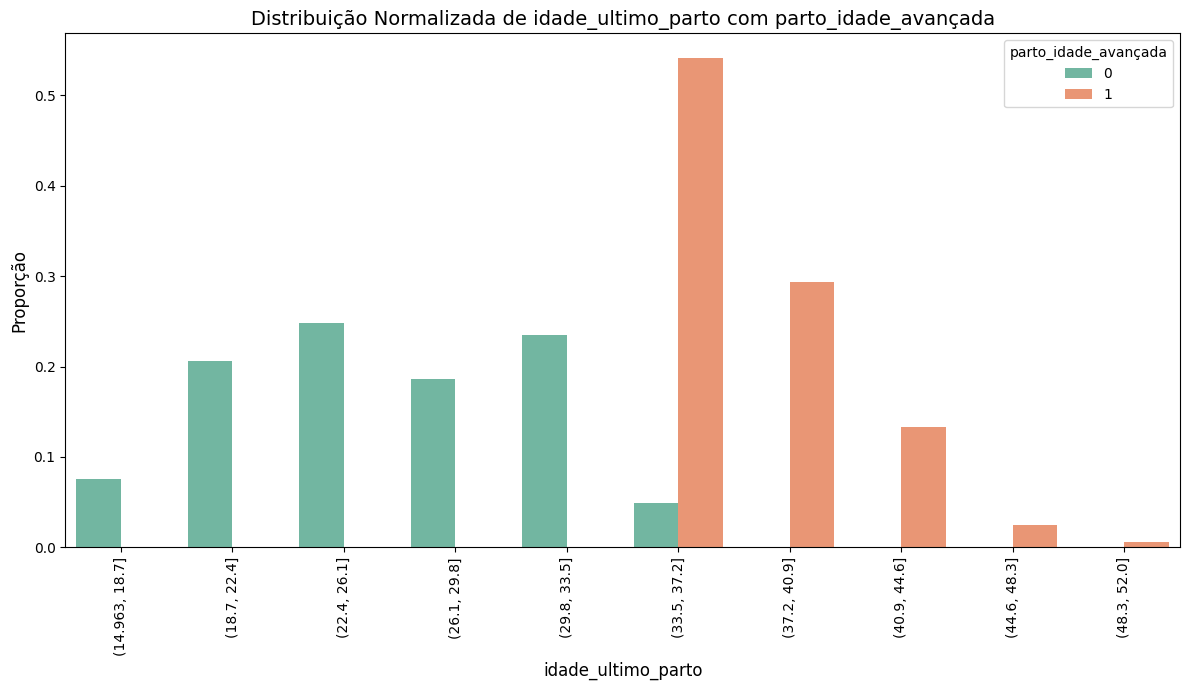

In [38]:
cols = df_grupo_criancas.columns.to_list()
cols.remove('chave_domicio')
cols.remove('chave_pessoa')
cols.remove('parto_idade_avançada')

for col in cols:
    print(col)
    plot_with_hue_normalized(df_grupo_criancas, col, 'parto_idade_avançada')

In [39]:
print(1==1)

True


In [40]:
print('alo')

alo
